# Mechanisms of Action's prediction

## Data analysis

In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
import os, sys

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from scipy.special import comb
from itertools import combinations
import json
from tqdm import tqdm
import pdb
import plotly.express as px

In [ ]:
q = np.expand_dims(np.arange(10), axis=-1)
k = np.expand_dims(np.arange(10), axis=-1).T

In [ ]:
q.shape, k.shape

((10, 1), (1, 10))

In [ ]:
s = q - k
s

array([[ 0, -1, -2, -3, -4, -5, -6, -7, -8, -9],
       [ 1,  0, -1, -2, -3, -4, -5, -6, -7, -8],
       [ 2,  1,  0, -1, -2, -3, -4, -5, -6, -7],
       [ 3,  2,  1,  0, -1, -2, -3, -4, -5, -6],
       [ 4,  3,  2,  1,  0, -1, -2, -3, -4, -5],
       [ 5,  4,  3,  2,  1,  0, -1, -2, -3, -4],
       [ 6,  5,  4,  3,  2,  1,  0, -1, -2, -3],
       [ 7,  6,  5,  4,  3,  2,  1,  0, -1, -2],
       [ 8,  7,  6,  5,  4,  3,  2,  1,  0, -1],
       [ 9,  8,  7,  6,  5,  4,  3,  2,  1,  0]])

In [ ]:
raw_data_path = '../resource/lish-moa'

In [ ]:
input_df = pd.read_csv(os.path.join(raw_data_path, 'train_features.csv'))
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 876 entries, sig_id to c-99
dtypes: float64(872), int64(1), object(3)
memory usage: 159.2+ MB


In [ ]:
input_df.columns

Index(['sig_id', 'cp_type', 'cp_time', 'cp_dose', 'g-0', 'g-1', 'g-2', 'g-3',
       'g-4', 'g-5',
       ...
       'c-90', 'c-91', 'c-92', 'c-93', 'c-94', 'c-95', 'c-96', 'c-97', 'c-98',
       'c-99'],
      dtype='object', length=876)

In [ ]:
len(input_df.sig_id), len(input_df.sig_id.unique())

(23814, 23814)

In [ ]:
input_df.cp_type.unique(), input_df.cp_time.unique(), input_df.cp_dose.unique() 

(array(['trt_cp', 'ctl_vehicle'], dtype=object),
 array([24, 72, 48], dtype=int64),
 array(['D1', 'D2'], dtype=object))

In [ ]:
input_df.cp_time.value_counts()

48    8250
72    7792
24    7772
Name: cp_time, dtype: int64

### Convert categorical values into categorical indexes

In [ ]:
res = input_df.cp_type.astype('category')
res

0             trt_cp
1             trt_cp
2             trt_cp
3             trt_cp
4             trt_cp
            ...     
23809         trt_cp
23810         trt_cp
23811    ctl_vehicle
23812         trt_cp
23813         trt_cp
Name: cp_type, Length: 23814, dtype: category
Categories (2, object): ['ctl_vehicle', 'trt_cp']

In [ ]:
len(res.cat.categories)

2

In [ ]:
res = res.cat.rename_categories(range(len(res.cat.categories)))

In [ ]:
res

0        1
1        1
2        1
3        1
4        1
        ..
23809    1
23810    1
23811    0
23812    1
23813    1
Name: cp_type, Length: 23814, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
res2 = res.map(lambda x: int(x))
res2

0        1
1        1
2        1
3        1
4        1
        ..
23809    1
23810    1
23811    0
23812    1
23813    1
Name: cp_type, Length: 23814, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
type(res2.iloc[0])

numpy.int64

In [ ]:
input_df.cp_type

0             trt_cp
1             trt_cp
2             trt_cp
3             trt_cp
4             trt_cp
            ...     
23809         trt_cp
23810         trt_cp
23811    ctl_vehicle
23812         trt_cp
23813         trt_cp
Name: cp_type, Length: 23814, dtype: object

In [ ]:
input_df.cp_type = input_df.cp_type.astype('category')
input_df.cp_type

0             trt_cp
1             trt_cp
2             trt_cp
3             trt_cp
4             trt_cp
            ...     
23809         trt_cp
23810         trt_cp
23811    ctl_vehicle
23812         trt_cp
23813         trt_cp
Name: cp_type, Length: 23814, dtype: category
Categories (2, object): ['ctl_vehicle', 'trt_cp']

In [ ]:
input_df.cp_type = input_df.cp_type.cat.rename_categories(range(len(input_df.cp_type.cat.categories)))
input_df.cp_type

0        1
1        1
2        1
3        1
4        1
        ..
23809    1
23810    1
23811    0
23812    1
23813    1
Name: cp_type, Length: 23814, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
cp_v_index_series = input_df.cp_type[input_df.cp_type == 0]
cp_v_index_series 

25       0
38       0
40       0
47       0
63       0
        ..
23729    0
23747    0
23768    0
23793    0
23811    0
Name: cp_type, Length: 1866, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
input_df.cp_time = input_df.cp_time.astype('category')
input_df.cp_time = input_df.cp_time.cat.rename_categories(range(len(input_df.cp_time.cat.categories)))
input_df.cp_dose = input_df.cp_dose.astype('category')
input_df.cp_dose = input_df.cp_dose.cat.rename_categories(range(len(input_df.cp_dose.cat.categories)))

In [ ]:
len(input_df.cp_time.cat.categories), len(input_df.cp_dose.cat.categories)

(3, 2)

In [ ]:
input_df[['cp_type', 'cp_time', 'cp_dose']].head(3)

cp_type cp_time cp_dose
0       1       0       0
1       1       2       0
2       1       1       0

In [ ]:
res = input_df.isna().any()

In [ ]:
res.any()

False

### Gene expression and cell viability

In [ ]:
input_vals = input_df.values
input_vals.shape

(23814, 876)

In [ ]:
input_vals[0]

array(['id_000644bb2', 1, 0, 0, 1.062, 0.5577, -0.2479, -0.6208, -0.1944,
       -1.012, -1.022, -0.0326, 0.5548, -0.0921, 1.183, 0.153, 0.5574,
       -0.4015, 0.1789, -0.6528, -0.7969, 0.6342, 0.1778, -0.3694,
       -0.5688, -1.136, -1.188, 0.694, 0.4393, 0.2664, 0.1907, 0.1628,
       -0.2853, 0.5819, 0.2934, -0.5584, -0.0916, -0.301, -0.1537, 0.2198,
       0.2965, -0.5055, -0.5119, -0.2162, -0.0347, -0.2566, -1.198,
       0.3116, -1.033, 0.2208, -0.1143, -0.0251, 0.035, 0.4233, -0.1221,
       -0.4927, 0.6119, 0.4715, -0.0351, -0.1605, -0.675, 0.2263, 0.579,
       0.9588, 0.6061, -0.13, 0.6611, -0.3136, -0.202, 0.0251, 0.167,
       -0.4195, 0.6551, -0.7395, -0.7047, -0.5369, 0.0314, -0.5239,
       -0.3406, -0.6332, -1.033, -0.3763, -0.855, 0.7348, -0.2226,
       -0.1959, -0.0005, -2.144, 1.732, 0.019, -0.1188, 0.405, -1.584,
       -0.3011, 0.2048, -1.123, -1.559, -1.798, 0.7017, -1.039, 0.0958,
       0.4527, 0.5455, -0.0828, -0.5364, 0.5522, -0.7768, -0.8044,
       -0.118

In [ ]:
input_vals_p = input_vals[:, 4:]
input_vals_p.shape

(23814, 872)

In [ ]:
input_vals_p = input_vals_p.astype('float32')

In [ ]:
input_vals_p.shape, input_vals_p.dtype

((23814, 872), dtype('float32'))

In [ ]:
input_vals_p[0, ...]

array([ 1.062e+00,  5.577e-01, -2.479e-01, -6.208e-01, -1.944e-01,
       -1.012e+00, -1.022e+00, -3.260e-02,  5.548e-01, -9.210e-02,
        1.183e+00,  1.530e-01,  5.574e-01, -4.015e-01,  1.789e-01,
       -6.528e-01, -7.969e-01,  6.342e-01,  1.778e-01, -3.694e-01,
       -5.688e-01, -1.136e+00, -1.188e+00,  6.940e-01,  4.393e-01,
        2.664e-01,  1.907e-01,  1.628e-01, -2.853e-01,  5.819e-01,
        2.934e-01, -5.584e-01, -9.160e-02, -3.010e-01, -1.537e-01,
        2.198e-01,  2.965e-01, -5.055e-01, -5.119e-01, -2.162e-01,
       -3.470e-02, -2.566e-01, -1.198e+00,  3.116e-01, -1.033e+00,
        2.208e-01, -1.143e-01, -2.510e-02,  3.500e-02,  4.233e-01,
       -1.221e-01, -4.927e-01,  6.119e-01,  4.715e-01, -3.510e-02,
       -1.605e-01, -6.750e-01,  2.263e-01,  5.790e-01,  9.588e-01,
        6.061e-01, -1.300e-01,  6.611e-01, -3.136e-01, -2.020e-01,
        2.510e-02,  1.670e-01, -4.195e-01,  6.551e-01, -7.395e-01,
       -7.047e-01, -5.369e-01,  3.140e-02, -5.239e-01, -3.406e

In [ ]:
ge_val = input_vals_p[:, 0:772]
ct_val = input_vals_p[:, 772:]
ge_val.shape, ct_val.shape

((23814, 772), (23814, 100))

In [ ]:
ge_val_mean = ge_val.mean(axis=-1)
ge_val_std = ge_val.std(axis=-1)
ge_val_mean.shape

(23814,)

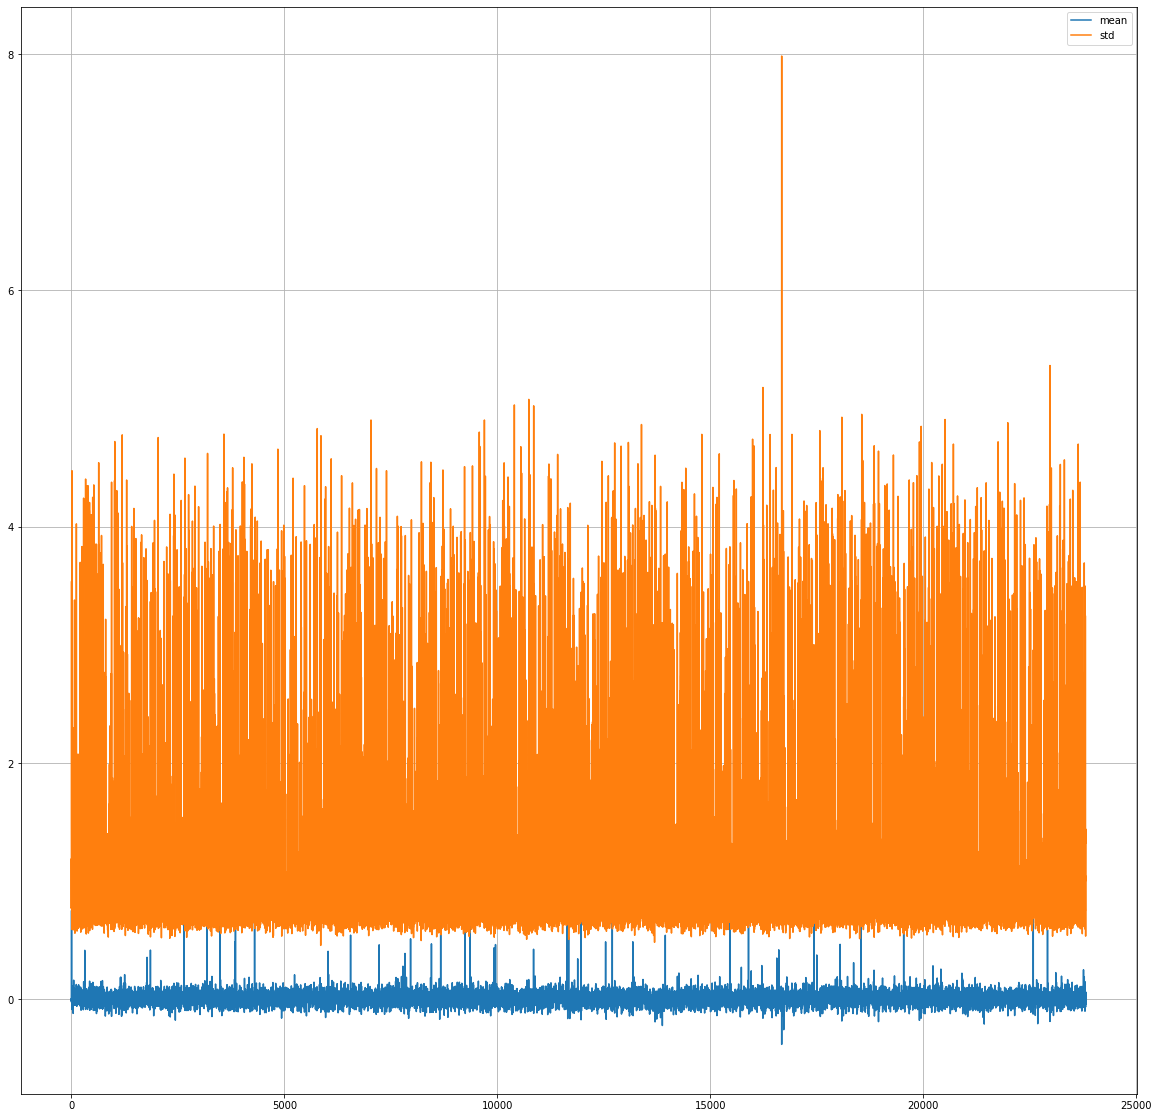

In [ ]:
figure(figsize=(20, 20))
plot(ge_val_mean, label='mean')
plot(ge_val_std, label='std')
legend()
grid()

In [ ]:
ct_val_mean = ct_val.mean(axis=-1)
ct_val_std = ct_val.std(axis=-1)

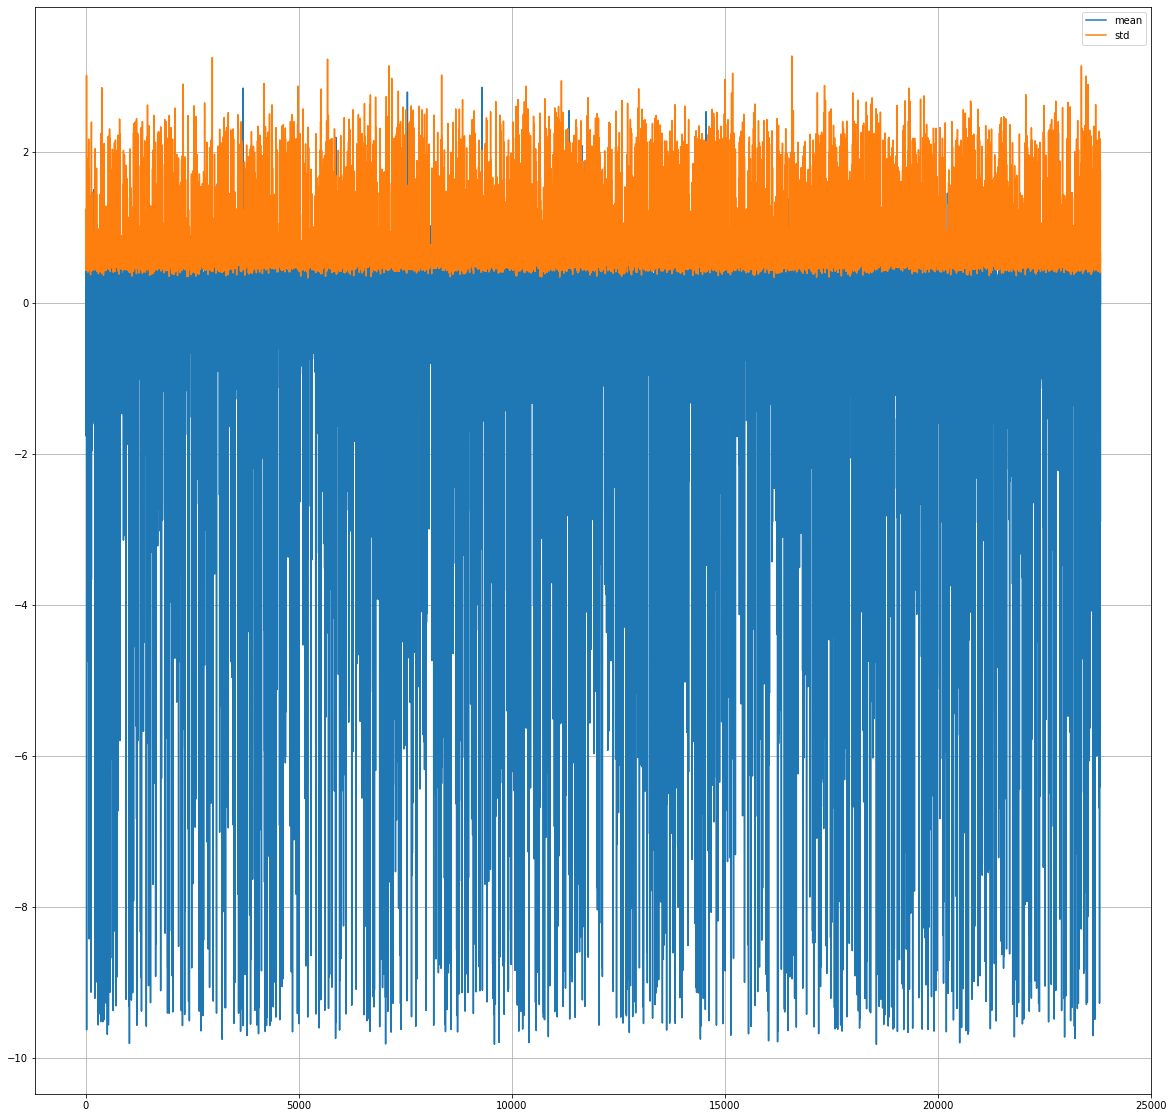

In [ ]:
figure(figsize=(20, 20))
plot(ct_val_mean, label='mean')
plot(ct_val_std, label='std')
legend()
grid()

### Target feature

In [ ]:
target_scored_df = pd.read_csv(os.path.join(raw_data_path, 'train_targets_scored.csv'))
target_scored_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 207 entries, sig_id to wnt_inhibitor
dtypes: int64(206), object(1)
memory usage: 37.6+ MB


In [ ]:
target_scored_df.columns

Index(['sig_id', '5-alpha_reductase_inhibitor', '11-beta-hsd1_inhibitor',
       'acat_inhibitor', 'acetylcholine_receptor_agonist',
       'acetylcholine_receptor_antagonist', 'acetylcholinesterase_inhibitor',
       'adenosine_receptor_agonist', 'adenosine_receptor_antagonist',
       'adenylyl_cyclase_activator',
       ...
       'tropomyosin_receptor_kinase_inhibitor', 'trpv_agonist',
       'trpv_antagonist', 'tubulin_inhibitor', 'tyrosine_kinase_inhibitor',
       'ubiquitin_specific_protease_inhibitor', 'vegfr_inhibitor', 'vitamin_b',
       'vitamin_d_receptor_agonist', 'wnt_inhibitor'],
      dtype='object', length=207)

In [ ]:
target_scored_df.sum(axis=1)

0        1
1        0
2        3
3        0
4        1
        ..
23809    1
23810    1
23811    0
23812    1
23813    0
Length: 23814, dtype: int64

In [ ]:
res = target_scored_df[input_df.cp_type == 0]
res

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
25     id_0054388ec                            0                       0   
38     id_0079af0fb                            0                       0   
40     id_007bfbb91                            0                       0   
47     id_008a986b7                            0                       0   
63     id_009d8340f                            0                       0   
...             ...                          ...                     ...   
23729  id_ff1f9e5fc                            0                       0   
23747  id_ff469c482                            0                       0   
23768  id_ff89331ca                            0                       0   
23793  id_ffd26f361                            0                       0   
23811  id_fffc1c3f4                            0                       0   

       acat_inhibitor  acetylcholine_receptor_agonist  \
25                  0                               0   
38                  0                               0   
40                  0                               0   
47                  0                               0   
63                  0                               0   
...               ...                             ...   
23729               0                               0   
23747               0                               0   
23768               0                               0   
23793               0                               0   
23811               0                               0   

       acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
25                                     0                               0   
38                                     0                               0   
40                                     0                               0   
47                                     0                               0   
63                                     0                               0   
...                                  ...                             ...   
23729                                  0                               0   
23747                                  0                               0   
23768                                  0                               0   
23793                                  0                               0   
23811                                  0                               0   

       adenosine_receptor_agonist  adenosine_receptor_antagonist  \
25                              0                              0   
38                              0                              0   
40                              0                              0   
47                              0                              0   
63                              0                              0   
...                           ...                            ...   
23729                           0                              0   
23747                           0                              0   
23768                           0                              0   
23793                           0                              0   
23811                           0                              0   

       adenylyl_cyclase_activator  ...  tropomyosin_receptor_kinase_inhibitor  \
25                              0  ...                                      0   
38                              0  ...                                      0   
40                              0  ...                                      0   
47                              0  ...                                      0   
63                              0  ...                                      0   
...                           ...  ...                                    ...   
23729                           0  ...                                      0   
23747                           0  ..

In [ ]:
res.sum(axis=1)

25       0
38       0
40       0
47       0
63       0
        ..
23729    0
23747    0
23768    0
23793    0
23811    0
Length: 1866, dtype: int64

In [ ]:
target_scored_df

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0      id_000644bb2                            0                       0   
1      id_000779bfc                            0                       0   
2      id_000a6266a                            0                       0   
3      id_0015fd391                            0                       0   
4      id_001626bd3                            0                       0   
...             ...                          ...                     ...   
23809  id_fffb1ceed                            0                       0   
23810  id_fffb70c0c                            0                       0   
23811  id_fffc1c3f4                            0                       0   
23812  id_fffcb9e7c                            0                       0   
23813  id_ffffdd77b                            0                       0   

       acat_inhibitor  acetylcholine_receptor_agonist  \
0                   0                               0   
1                   0                               0   
2                   0                               0   
3                   0                               0   
4                   0                               0   
...               ...                             ...   
23809               0                               0   
23810               0                               0   
23811               0                               0   
23812               0                               0   
23813               0                               0   

       acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               0   
...                                  ...                             ...   
23809                                  0                               0   
23810                                  0                               0   
23811                                  0                               0   
23812                                  0                               0   
23813                                  0                               0   

       adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   
...                           ...                            ...   
23809                           0                              0   
23810                           0                              0   
23811                           0                              0   
23812                           0                              0   
23813                           0                              0   

       adenylyl_cyclase_activator  ...  tropomyosin_receptor_kinase_inhibitor  \
0                               0  ...                                      0   
1                               0  ...                                      0   
2                               0  ...                                      0   
3                               0  ...                                      0   
4                               0  ...                                      0   
...                           ...  ...                                    ...   
23809                           0  ...                                      0   
23810                           0  ..

In [ ]:
target_nonscored_df = pd.read_csv(os.path.join(raw_data_path, 'train_targets_nonscored.csv'))
target_nonscored_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 403 entries, sig_id to xiap_inhibitor
dtypes: int64(402), object(1)
memory usage: 73.2+ MB


In [ ]:
target_nonscored_df.columns

Index(['sig_id', 'abc_transporter_expression_enhancer', 'abl_inhibitor',
       'ace_inhibitor', 'acetylcholine_release_enhancer',
       'adenosine_deaminase_inhibitor', 'adenosine_kinase_inhibitor',
       'adenylyl_cyclase_inhibitor', 'age_inhibitor',
       'alcohol_dehydrogenase_inhibitor',
       ...
       've-cadherin_antagonist', 'vesicular_monoamine_transporter_inhibitor',
       'vitamin_k_antagonist', 'voltage-gated_calcium_channel_ligand',
       'voltage-gated_potassium_channel_activator',
       'voltage-gated_sodium_channel_blocker',
       'wdr5_mll_interaction_inhibitor', 'wnt_agonist',
       'xanthine_oxidase_inhibitor', 'xiap_inhibitor'],
      dtype='object', length=403)

In [ ]:
target_df = pd.concat([target_scored_df, target_nonscored_df.iloc[:, 1:]], axis=1)
len(target_df.columns)

609

In [ ]:
target_df

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0      id_000644bb2                            0                       0   
1      id_000779bfc                            0                       0   
2      id_000a6266a                            0                       0   
3      id_0015fd391                            0                       0   
4      id_001626bd3                            0                       0   
...             ...                          ...                     ...   
23809  id_fffb1ceed                            0                       0   
23810  id_fffb70c0c                            0                       0   
23811  id_fffc1c3f4                            0                       0   
23812  id_fffcb9e7c                            0                       0   
23813  id_ffffdd77b                            0                       0   

       acat_inhibitor  acetylcholine_receptor_agonist  \
0                   0                               0   
1                   0                               0   
2                   0                               0   
3                   0                               0   
4                   0                               0   
...               ...                             ...   
23809               0                               0   
23810               0                               0   
23811               0                               0   
23812               0                               0   
23813               0                               0   

       acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               0   
...                                  ...                             ...   
23809                                  0                               0   
23810                                  0                               0   
23811                                  0                               0   
23812                                  0                               0   
23813                                  0                               0   

       adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   
...                           ...                            ...   
23809                           0                              0   
23810                           0                              0   
23811                           0                              0   
23812                           0                              0   
23813                           0                              0   

       adenylyl_cyclase_activator  ...  ve-cadherin_antagonist  \
0                               0  ...                       0   
1                               0  ...                       0   
2                               0  ...                       0   
3                               0  ...                       0   
4                               0  ...                       0   
...                           ...  ...                     ...   
23809                           0  ...                       0   
23810                           0  ...                       0   
23811                           0  ...                       0   
23812                    

In [ ]:
target_df.columns

Index(['sig_id', '5-alpha_reductase_inhibitor', '11-beta-hsd1_inhibitor',
       'acat_inhibitor', 'acetylcholine_receptor_agonist',
       'acetylcholine_receptor_antagonist', 'acetylcholinesterase_inhibitor',
       'adenosine_receptor_agonist', 'adenosine_receptor_antagonist',
       'adenylyl_cyclase_activator',
       ...
       've-cadherin_antagonist', 'vesicular_monoamine_transporter_inhibitor',
       'vitamin_k_antagonist', 'voltage-gated_calcium_channel_ligand',
       'voltage-gated_potassium_channel_activator',
       'voltage-gated_sodium_channel_blocker',
       'wdr5_mll_interaction_inhibitor', 'wnt_agonist',
       'xanthine_oxidase_inhibitor', 'xiap_inhibitor'],
      dtype='object', length=609)

In [ ]:
res = target_nonscored_df.sum()
res

sig_id                                  id_000644bb2id_000779bfcid_000a6266aid_0015fd3...
abc_transporter_expression_enhancer                                                     6
abl_inhibitor                                                                          24
ace_inhibitor                                                                          91
acetylcholine_release_enhancer                                                          6
                                                              ...                        
voltage-gated_sodium_channel_blocker                                                   18
wdr5_mll_interaction_inhibitor                                                          6
wnt_agonist                                                                             0
xanthine_oxidase_inhibitor                                                             24
xiap_inhibitor                                                                         24
Length: 40

In [ ]:
target_scored_df.iloc[:, 1:2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Data columns (total 1 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   5-alpha_reductase_inhibitor  23814 non-null  int64
dtypes: int64(1)
memory usage: 186.2 KB


In [ ]:
type(target_scored_df.iloc[:, 1:2])

pandas.core.frame.DataFrame

In [ ]:
target_scored_df.iloc[:, 1:2].iloc[:, 0].value_counts()

0    23797
1       17
Name: 5-alpha_reductase_inhibitor, dtype: int64

In [ ]:
for i in range(1, len(target_scored_df.columns)):
    print(i, target_scored_df.iloc[:, i:(i+1)].iloc[:, 0].value_counts())

1 0    23797
1       17
Name: 5-alpha_reductase_inhibitor, dtype: int64
2 0    23796
1       18
Name: 11-beta-hsd1_inhibitor, dtype: int64
3 0    23790
1       24
Name: acat_inhibitor, dtype: int64
4 0    23624
1      190
Name: acetylcholine_receptor_agonist, dtype: int64
5 0    23513
1      301
Name: acetylcholine_receptor_antagonist, dtype: int64
6 0    23741
1       73
Name: acetylcholinesterase_inhibitor, dtype: int64
7 0    23760
1       54
Name: adenosine_receptor_agonist, dtype: int64
8 0    23718
1       96
Name: adenosine_receptor_antagonist, dtype: int64
9 0    23802
1       12
Name: adenylyl_cyclase_activator, dtype: int64
10 0    23544
1      270
Name: adrenergic_receptor_agonist, dtype: int64
11 0    23454
1      360
Name: adrenergic_receptor_antagonist, dtype: int64
12 0    23748
1       66
Name: akt_inhibitor, dtype: int64
13 0    23807
1        7
Name: aldehyde_dehydrogenase_inhibitor, dtype: int64
14 0    23772
1       42
Name: alk_inhibitor, dtype: int64
15 0    23802

125 0    23753
1       61
Name: lipoxygenase_inhibitor, dtype: int64
126 0    23808
1        6
Name: lxr_agonist, dtype: int64
127 0    23783
1       31
Name: mdm_inhibitor, dtype: int64
128 0    23742
1       72
Name: mek_inhibitor, dtype: int64
129 0    23740
1       74
Name: membrane_integrity_inhibitor, dtype: int64
130 0    23789
1       25
Name: mineralocorticoid_receptor_antagonist, dtype: int64
131 0    23802
1       12
Name: monoacylglycerol_lipase_inhibitor, dtype: int64
132 0    23729
1       85
Name: monoamine_oxidase_inhibitor, dtype: int64
133 0    23796
1       18
Name: monopolar_spindle_1_kinase_inhibitor, dtype: int64
134 0    23684
1      130
Name: mtor_inhibitor, dtype: int64
135 0    23766
1       48
Name: mucolytic_agent, dtype: int64
136 0    23777
1       37
Name: neuropeptide_receptor_antagonist, dtype: int64
137 0    22982
1      832
Name: nfkb_inhibitor, dtype: int64
138 0    23808
1        6
Name: nicotinic_receptor_agonist, dtype: int64
139 0    23788
1     

In [ ]:
target_scored_df.columns[1:]

Index(['5-alpha_reductase_inhibitor', '11-beta-hsd1_inhibitor',
       'acat_inhibitor', 'acetylcholine_receptor_agonist',
       'acetylcholine_receptor_antagonist', 'acetylcholinesterase_inhibitor',
       'adenosine_receptor_agonist', 'adenosine_receptor_antagonist',
       'adenylyl_cyclase_activator', 'adrenergic_receptor_agonist',
       ...
       'tropomyosin_receptor_kinase_inhibitor', 'trpv_agonist',
       'trpv_antagonist', 'tubulin_inhibitor', 'tyrosine_kinase_inhibitor',
       'ubiquitin_specific_protease_inhibitor', 'vegfr_inhibitor', 'vitamin_b',
       'vitamin_d_receptor_agonist', 'wnt_inhibitor'],
      dtype='object', length=206)

In [ ]:
len(target_scored_df.columns[1:])

206

## Data generator

### Input feature

In [ ]:
import tensorflow as tf

In [ ]:
def make_input_features(inputs):
    # Treatment.
    cp_type = inputs['cp_type']
    cp_time = inputs['cp_time']
    cp_dose = inputs['cp_dose']
    
    cp_type_onehot = tf.one_hot(cp_type, 2)
    cp_time_onehot = tf.one_hot(cp_time, 3)
    cp_dose_onehot = tf.one_hot(cp_dose, 2)
    
    treatment_onehot = tf.concat([cp_type_onehot, cp_time_onehot, cp_dose_onehot], axis=-1)
    
    # Gene expression.
    gene_exps = [inputs['g-' + str(v)] for v in range(772)]
    gene_exps = tf.stack(gene_exps, axis=0)
    
    # Cell viability.
    cell_vs =[inputs['c-' + str(v)] for v in range(100)]
    cell_vs = tf.stack(cell_vs, axis=0)
    
    return (treatment_onehot, gene_exps, cell_vs)

In [ ]:
input_dataset = tf.data.Dataset.from_tensor_slices(input_df.to_dict('list'))
input_dataset = input_dataset.map(make_input_features)
input_features_iter = input_dataset.as_numpy_iterator()
res = input_features_iter.next()

In [ ]:
len(res)

3

In [ ]:
res[0].shape, res[1].shape, res[2].shape

((7,), (772,), (100,))

In [ ]:
res[0]

array([0., 1., 1., 0., 0., 1., 0.], dtype=float32)

In [ ]:
res[1][:10]

array([ 1.062 ,  0.5577, -0.2479, -0.6208, -0.1944, -1.012 , -1.022 ,
       -0.0326,  0.5548, -0.0921], dtype=float32)

In [ ]:
res[2][:10]

array([-0.06  ,  0.1083,  0.6864,  0.4043,  0.4213, -0.6797,  0.2888,
        0.4323, -0.3381,  0.3407], dtype=float32)

### Target feature

In [ ]:
target_scored_df.columns, len(target_scored_df.columns)

(Index(['sig_id', '5-alpha_reductase_inhibitor', '11-beta-hsd1_inhibitor',
        'acat_inhibitor', 'acetylcholine_receptor_agonist',
        'acetylcholine_receptor_antagonist', 'acetylcholinesterase_inhibitor',
        'adenosine_receptor_agonist', 'adenosine_receptor_antagonist',
        'adenylyl_cyclase_activator',
        ...
        'tropomyosin_receptor_kinase_inhibitor', 'trpv_agonist',
        'trpv_antagonist', 'tubulin_inhibitor', 'tyrosine_kinase_inhibitor',
        'ubiquitin_specific_protease_inhibitor', 'vegfr_inhibitor', 'vitamin_b',
        'vitamin_d_receptor_agonist', 'wnt_inhibitor'],
       dtype='object', length=207),
 207)

In [ ]:
target_scored_df.head()

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0  id_000644bb2                            0                       0   
1  id_000779bfc                            0                       0   
2  id_000a6266a                            0                       0   
3  id_0015fd391                            0                       0   
4  id_001626bd3                            0                       0   

   acat_inhibitor  acetylcholine_receptor_agonist  \
0               0                               0   
1               0                               0   
2               0                               0   
3               0                               0   
4               0                               0   

   acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   

   adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   adenylyl_cyclase_activator  ...  tropomyosin_receptor_kinase_inhibitor  \
0                           0  ...                                      0   
1                           0  ...                                      0   
2                           0  ...                                      0   
3                           0  ...                                      0   
4                           0  ...                                      0   

   trpv_agonist  trpv_antagonist  tubulin_inhibitor  \
0             0                0                  0   
1             0                0                  0   
2             0                0                  0   
3             0                0                  0   
4             0                0                  0   

   tyrosine_kinase_inhibitor  ubiquitin_specific_protease_inhibitor  \
0                          0                                      0   
1                          0                                      0   
2                          0                                      0   
3                          0                                      0   
4                          0                                      0   

   vegfr_inhibitor  vitamin_b  vitamin_d_receptor_agonist  wnt_inhibitor  
0                0          0                           0              0  
1                0          0                           0              0  
2                0          0                           0              0  
3                0          0                           0              0  
4                0          0                           0              0  

[5 rows x 207 columns]

In [ ]:
del target_scored_df['sig_id']

In [ ]:
target_scored_df.head()

5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  acat_inhibitor  \
0                            0                       0               0   
1                            0                       0               0   
2                            0                       0               0   
3                            0                       0               0   
4                            0                       0               0   

   acetylcholine_receptor_agonist  acetylcholine_receptor_antagonist  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   acetylcholinesterase_inhibitor  adenosine_receptor_agonist  \
0                               0                           0   
1                               0                           0   
2                               0                           0   
3                               0                           0   
4                               0                           0   

   adenosine_receptor_antagonist  adenylyl_cyclase_activator  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           0   

   adrenergic_receptor_agonist  ...  tropomyosin_receptor_kinase_inhibitor  \
0                            0  ...                                      0   
1                            0  ...                                      0   
2                            0  ...                                      0   
3                            0  ...                                      0   
4                            0  ...                                      0   

   trpv_agonist  trpv_antagonist  tubulin_inhibitor  \
0             0                0                  0   
1             0                0                  0   
2             0                0                  0   
3             0                0                  0   
4             0                0                  0   

   tyrosine_kinase_inhibitor  ubiquitin_specific_protease_inhibitor  \
0                          0                                      0   
1                          0                                      0   
2                          0                                      0   
3                          0                                      0   
4                          0                                      0   

   vegfr_inhibitor  vitamin_b  vitamin_d_receptor_agonist  wnt_inhibitor  
0                0          0                           0              0  
1                0          0                           0              0  
2                0          0                           0              0  
3                0          0                           0              0  
4                0          0                           0              0  

[5 rows x 206 columns]

In [ ]:
res = target_scored_df.iloc[:, 0]
res

0        0
1        0
2        0
3        0
4        0
        ..
23809    0
23810    0
23811    0
23812    0
23813    0
Name: 5-alpha_reductase_inhibitor, Length: 23814, dtype: int64

In [ ]:
res2 = res.value_counts()
res2

0    23797
1       17
Name: 5-alpha_reductase_inhibitor, dtype: int64

In [ ]:
res2.sum()

23814

In [ ]:
res2 = res2 / res2.sum()
res2

0    0.999286
1    0.000714
Name: 5-alpha_reductase_inhibitor, dtype: float64

In [ ]:
res2.values

array([9.99286134e-01, 7.13865793e-04])

In [ ]:
target_scored_df = pd.read_csv(os.path.join(raw_data_path, 'train_targets_scored.csv'))
target_scored_df.info()
del target_scored_df['sig_id']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 207 entries, sig_id to wnt_inhibitor
dtypes: int64(206), object(1)
memory usage: 37.6+ MB


In [ ]:
weights = []
for c in target_scored_df.columns:
    s = target_scored_df[c]
    s = s.value_counts()
    s = s / s.sum()
    weights.append(s.values)

In [ ]:
len(weights), weights[0]

(206, array([9.99286134e-01, 7.13865793e-04]))

In [ ]:
weight = np.array(weights)
weight.shape

(206, 2)

In [ ]:
weight[:2]

array([[9.99286134e-01, 7.13865793e-04],
       [9.99244142e-01, 7.55857899e-04]])

In [ ]:
weight

array([[9.99286134e-01, 7.13865793e-04],
       [9.99244142e-01, 7.55857899e-04],
       [9.98992189e-01, 1.00781053e-03],
       [9.92021500e-01, 7.97850004e-03],
       [9.87360376e-01, 1.26396238e-02],
       [9.96934576e-01, 3.06542370e-03],
       [9.97732426e-01, 2.26757370e-03],
       [9.95968758e-01, 4.03124213e-03],
       [9.99496095e-01, 5.03905266e-04],
       [9.88662132e-01, 1.13378685e-02],
       [9.84882842e-01, 1.51171580e-02],
       [9.97228521e-01, 2.77147896e-03],
       [9.99706055e-01, 2.93944738e-04],
       [9.98236332e-01, 1.76366843e-03],
       [9.99496095e-01, 5.03905266e-04],
       [9.99496095e-01, 5.03905266e-04],
       [9.97984379e-01, 2.01562106e-03],
       [9.96262703e-01, 3.73729739e-03],
       [9.96640632e-01, 3.35936844e-03],
       [9.98488284e-01, 1.51171580e-03],
       [9.98446292e-01, 1.55370790e-03],
       [9.96934576e-01, 3.06542370e-03],
       [9.99748047e-01, 2.51952633e-04],
       [9.98194339e-01, 1.80566054e-03],
       [9.994960

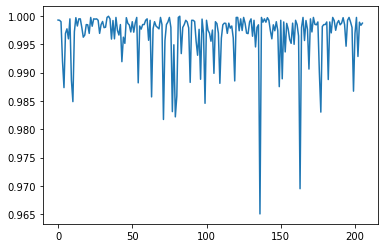

In [ ]:
plot(weight[:, 0])

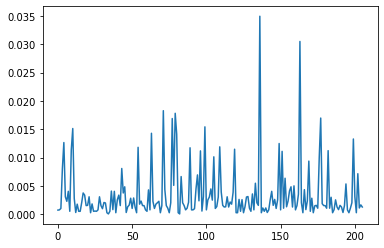

In [ ]:
plot(weight[:, 1])

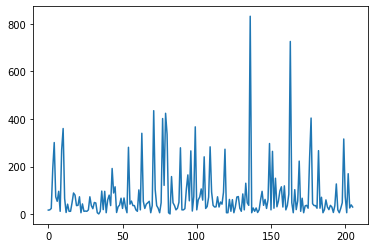

In [ ]:
plot(target_scored_df.sum(axis=0).values)

In [ ]:
res = target_scored_df.sum(axis=1).values
res.shape

(23814,)

In [ ]:
res

array([1, 0, 3, ..., 0, 1, 0], dtype=int64)

In [ ]:
res2 = res[res == 0]
res2.shape

(9367,)

In [ ]:
23814 - 9367

14447

In [ ]:
input_df.shape

(23814, 876)

In [ ]:
target_df = pd.concat([target_scored_df, target_nonscored_df.iloc[:, 1:]], axis=1)
len(target_df), len(target_df.columns)

(23814, 608)

In [ ]:
res = target_df.sum(axis=1).values
res2 = res[res == 0]
res2.shape

(5530,)

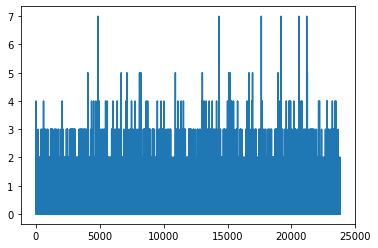

In [ ]:
plot(target_scored_df.sum(axis=1).values)

In [ ]:
target_scored_df.columns = range(len(target_scored_df.columns))

In [ ]:
target_scored_df.head()

0    1    2    3    4    5    6    7    8    9    ...  196  197  198  199  \
0    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   200  201  202  203  204  205  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 206 columns]

In [ ]:
def make_target_features(inputs):
    # MoA annotations' values.
    MoA_values = [inputs[v] for v in range(206)]
    MoA_values = tf.stack(MoA_values, axis=0)
        
    return (MoA_values)

In [ ]:
target_dataset = tf.data.Dataset.from_tensor_slices(target_scored_df.to_dict('list'))
target_dataset = target_dataset.map(make_target_features)
target_features_iter = target_dataset.as_numpy_iterator()
res = target_features_iter.next()

In [ ]:
type(res), res.shape

(numpy.ndarray, (206,))

In [ ]:
res

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

### Class imbalance

In [ ]:
target_scored_df_sum = target_scored_df.sum()
target_scored_df_sum

0       17
1       18
2       24
3      190
4      301
      ... 
201      6
202    170
203     26
204     39
205     30
Length: 206, dtype: int64

In [ ]:
res = target_scored_df_sum.values
res.shape

(206,)

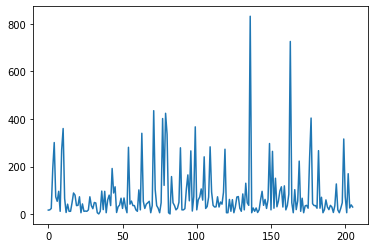

In [ ]:
plot(res)

In [ ]:
res = res.tolist()
res

[17,
 18,
 24,
 190,
 301,
 73,
 54,
 96,
 12,
 270,
 360,
 66,
 7,
 42,
 12,
 12,
 48,
 89,
 80,
 36,
 37,
 73,
 6,
 43,
 12,
 13,
 12,
 18,
 73,
 36,
 23,
 49,
 47,
 6,
 1,
 12,
 97,
 19,
 96,
 6,
 60,
 80,
 36,
 192,
 89,
 115,
 7,
 31,
 38,
 67,
 24,
 68,
 29,
 6,
 281,
 42,
 55,
 36,
 36,
 18,
 12,
 102,
 18,
 340,
 54,
 24,
 42,
 48,
 54,
 6,
 36,
 435,
 104,
 36,
 25,
 6,
 48,
 402,
 121,
 424,
 336,
 6,
 1,
 158,
 48,
 36,
 18,
 25,
 50,
 279,
 18,
 18,
 23,
 106,
 165,
 56,
 266,
 13,
 74,
 367,
 18,
 60,
 72,
 106,
 59,
 241,
 24,
 32,
 72,
 283,
 93,
 37,
 30,
 31,
 73,
 30,
 51,
 42,
 92,
 273,
 6,
 6,
 62,
 12,
 61,
 6,
 31,
 72,
 74,
 25,
 12,
 85,
 18,
 130,
 48,
 37,
 832,
 6,
 26,
 12,
 26,
 7,
 18,
 61,
 96,
 37,
 62,
 24,
 61,
 297,
 18,
 264,
 25,
 151,
 31,
 55,
 98,
 115,
 30,
 119,
 18,
 36,
 84,
 726,
 48,
 6,
 103,
 19,
 56,
 223,
 12,
 67,
 6,
 35,
 37,
 25,
 236,
 404,
 44,
 36,
 36,
 25,
 267,
 25,
 71,
 6,
 19,
 60,
 30,
 19,
 37,
 30,
 7,
 36,
 127,
 18,
 

In [ ]:
res[:-2]

[17,
 18,
 24,
 190,
 301,
 73,
 54,
 96,
 12,
 270,
 360,
 66,
 7,
 42,
 12,
 12,
 48,
 89,
 80,
 36,
 37,
 73,
 6,
 43,
 12,
 13,
 12,
 18,
 73,
 36,
 23,
 49,
 47,
 6,
 1,
 12,
 97,
 19,
 96,
 6,
 60,
 80,
 36,
 192,
 89,
 115,
 7,
 31,
 38,
 67,
 24,
 68,
 29,
 6,
 281,
 42,
 55,
 36,
 36,
 18,
 12,
 102,
 18,
 340,
 54,
 24,
 42,
 48,
 54,
 6,
 36,
 435,
 104,
 36,
 25,
 6,
 48,
 402,
 121,
 424,
 336,
 6,
 1,
 158,
 48,
 36,
 18,
 25,
 50,
 279,
 18,
 18,
 23,
 106,
 165,
 56,
 266,
 13,
 74,
 367,
 18,
 60,
 72,
 106,
 59,
 241,
 24,
 32,
 72,
 283,
 93,
 37,
 30,
 31,
 73,
 30,
 51,
 42,
 92,
 273,
 6,
 6,
 62,
 12,
 61,
 6,
 31,
 72,
 74,
 25,
 12,
 85,
 18,
 130,
 48,
 37,
 832,
 6,
 26,
 12,
 26,
 7,
 18,
 61,
 96,
 37,
 62,
 24,
 61,
 297,
 18,
 264,
 25,
 151,
 31,
 55,
 98,
 115,
 30,
 119,
 18,
 36,
 84,
 726,
 48,
 6,
 103,
 19,
 56,
 223,
 12,
 67,
 6,
 35,
 37,
 25,
 236,
 404,
 44,
 36,
 36,
 25,
 267,
 25,
 71,
 6,
 19,
 60,
 30,
 19,
 37,
 30,
 7,
 36,
 127,
 18,
 

1.0

In [ ]:
target_scored_df_sum.min(), target_scored_df_sum.max(), target_scored_df_sum.mean()

(1, 832, 81.76699029126213)

In [ ]:
target_scored_df_sum.median()

38.5

In [ ]:
MoA_1_df = target_scored_df.iloc[:, 0]
type(MoA_1_df)

pandas.core.series.Series

In [ ]:
res = MoA_1_df[MoA_1_df == 1]
res

1018     1
2112     1
2951     1
2997     1
6986     1
7051     1
9745     1
10572    1
10661    1
11016    1
11330    1
12654    1
12718    1
18012    1
20100    1
21941    1
23146    1
Name: 0, dtype: int64

In [ ]:
MoA_1_pos = list(res.index)
MoA_1_pos

[1018,
 2112,
 2951,
 2997,
 6986,
 7051,
 9745,
 10572,
 10661,
 11016,
 11330,
 12654,
 12718,
 18012,
 20100,
 21941,
 23146]

In [ ]:
comb(len(MoA_1_pos), 2, exact=True)

136

In [ ]:
res = combinations(MoA_1_pos, 2)

In [ ]:
pairs = [v for v in res]
len(pairs)

136

In [ ]:
pairs

[(1018, 2112),
 (1018, 2951),
 (1018, 2997),
 (1018, 6986),
 (1018, 7051),
 (1018, 9745),
 (1018, 10572),
 (1018, 10661),
 (1018, 11016),
 (1018, 11330),
 (1018, 12654),
 (1018, 12718),
 (1018, 18012),
 (1018, 20100),
 (1018, 21941),
 (1018, 23146),
 (2112, 2951),
 (2112, 2997),
 (2112, 6986),
 (2112, 7051),
 (2112, 9745),
 (2112, 10572),
 (2112, 10661),
 (2112, 11016),
 (2112, 11330),
 (2112, 12654),
 (2112, 12718),
 (2112, 18012),
 (2112, 20100),
 (2112, 21941),
 (2112, 23146),
 (2951, 2997),
 (2951, 6986),
 (2951, 7051),
 (2951, 9745),
 (2951, 10572),
 (2951, 10661),
 (2951, 11016),
 (2951, 11330),
 (2951, 12654),
 (2951, 12718),
 (2951, 18012),
 (2951, 20100),
 (2951, 21941),
 (2951, 23146),
 (2997, 6986),
 (2997, 7051),
 (2997, 9745),
 (2997, 10572),
 (2997, 10661),
 (2997, 11016),
 (2997, 11330),
 (2997, 12654),
 (2997, 12718),
 (2997, 18012),
 (2997, 20100),
 (2997, 21941),
 (2997, 23146),
 (6986, 7051),
 (6986, 9745),
 (6986, 10572),
 (6986, 10661),
 (6986, 11016),
 (6986, 1133

In [ ]:
comb(800, 2, exact=True)

319600

In [ ]:
MoA_1_neg = list(MoA_1_df[MoA_1_df == 0].index)
MoA_1_neg[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
half_batch_size = 10

In [ ]:
pos_sample_indexes = np.random.choice(MoA_1_pos, size=half_batch_size, replace=True)
pos_sample_indexes

array([10661, 12654,  7051,  6986, 20100, 11016, 10661, 11016,  2112,
       23146])

In [ ]:
pos_sample_indexes = np.random.choice(MoA_1_pos, size=(39, 2), replace=True)
pos_sample_indexes

array([[12718, 18012],
       [10661, 11016],
       [12718,  1018],
       [11016,  7051],
       [ 9745,  2112],
       [12718, 11016],
       [11330,  2951],
       [11330, 21941],
       [ 9745, 23146],
       [12654, 10661],
       [ 2951,  7051],
       [12718,  2112],
       [ 2951, 10572],
       [ 1018,  7051],
       [12718, 10572],
       [12718, 11016],
       [18012, 12654],
       [20100,  2112],
       [ 2951, 20100],
       [ 2997, 18012],
       [ 9745, 20100],
       [23146,  1018],
       [ 6986, 10661],
       [10661, 12718],
       [ 7051, 23146],
       [ 2997,  7051],
       [23146, 11330],
       [18012,  6986],
       [ 2951,  2112],
       [10572, 18012],
       [21941,  9745],
       [10572,  2951],
       [ 6986, 11330],
       [ 1018,  2997],
       [ 6986, 18012],
       [ 2997, 21941],
       [20100, 10572],
       [ 6986,  1018],
       [ 7051, 11016]])

In [ ]:
pos_sample_indexes.shape

(39, 2)

In [ ]:
tr_sig_ids = input_df.sig_id.values

In [ ]:
tr_sig_ids[:10]

array(['id_000644bb2', 'id_000779bfc', 'id_000a6266a', 'id_0015fd391',
       'id_001626bd3', 'id_001762a82', 'id_001bd861f', 'id_0020d0484',
       'id_00224bf20', 'id_0023f063e'], dtype=object)

In [ ]:
test_df = pd.read_csv(os.path.join(raw_data_path, 'test_features.csv'))

In [ ]:
test_sig_ids = test_df.sig_id.values
test_sig_ids[:10]

array(['id_0004d9e33', 'id_001897cda', 'id_002429b5b', 'id_00276f245',
       'id_0027f1083', 'id_0042c1364', 'id_006fc47b8', 'id_0071d65a2',
       'id_007a2159c', 'id_009201382'], dtype=object)

In [ ]:
tr_sig_id_set = set(tr_sig_ids)

In [ ]:
len(tr_sig_id_set)

23814

In [ ]:
test_sig_id_set = set(test_sig_ids)
len(test_sig_id_set)

3982

In [ ]:
overlapped_sig_id_set = tr_sig_id_set.intersection(test_sig_id_set)
len(overlapped_sig_id_set)

0

In [ ]:
total_sig_id_set = tr_sig_id_set.union(test_sig_id_set)
len(total_sig_id_set)

27796

In [ ]:
23814 + 3982

27796

### Balanced sampling

In [ ]:
target_scored_df

0    1    2    3    4    5    6    7    8    9    ...  196  197  198  \
0        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
23809    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
23810    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
23811    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
23812    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
23813    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

       199  200  201  202  203  204  205  
0        0    0    0    0    0    0    0  
1        0    0    0    0    0    0    0  
2        0    0    0    0    0    0    0  
3        0    0    0    0    0    0    0  
4        0    0    0    0    0    0    0  
...    ...  ...  ...  ...  ...  ...  ...  
23809    0    0    0    0    0    0    0  
23810    0    0    0    0    0    0    0  
23811    0    0    0    0    0    0    0  
23812    0    0    0    0    0    0    0  
23813    0    0    0    0    0    0    0  

[23814 rows x 206 columns]

In [ ]:
input_df

sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
1      id_000779bfc       1       2       0  0.0743  0.4087  0.2991  0.0604   
2      id_000a6266a       1       1       0  0.6280  0.5817  1.5540 -0.0764   
3      id_0015fd391       1       1       0 -0.5138 -0.2491 -0.2656  0.5288   
4      id_001626bd3       1       2       1 -0.3254 -0.4009  0.9700  0.6919   
...             ...     ...     ...     ...     ...     ...     ...     ...   
23809  id_fffb1ceed       1       0       1  0.1394 -0.0636 -0.1112 -0.5080   
23810  id_fffb70c0c       1       0       1 -1.3260  0.3478 -0.3743  0.9905   
23811  id_fffc1c3f4       0       1       1  0.3942  0.3756  0.3109 -0.7389   
23812  id_fffcb9e7c       1       0       0  0.6660  0.2324  0.4392  0.2044   
23813  id_ffffdd77b       1       2       0 -0.8598  1.0240 -0.1361  0.7952   

          g-4     g-5  ...    c-90    c-91    c-92    c-93    c-94    c-95  \
0     -0.1944 -1.0120  ...  0.2862  0.2584  0.8076  0.5523 -0.1912  0.6584   
1      1.0190  0.5207  ... -0.4265  0.7543  0.4708  0.0230  0.2957  0.4899   
2     -0.0323  1.2390  ... -0.7250 -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3      4.0620 -0.8095  ... -2.0990 -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4      1.4180 -0.8244  ...  0.0042  0.0048  0.6670  1.0690  0.5523 -0.3031   
...       ...     ...  ...     ...     ...     ...     ...     ...     ...   
23809 -0.4713  0.7201  ...  0.1969  0.0262 -0.8121  0.3434  0.5372 -0.3246   
23810 -0.7178  0.6621  ...  0.4286  0.4426  0.0423 -0.3195 -0.8086 -0.9798   
23811  0.5505 -0.0159  ...  0.5409  0.3755  0.7343  0.2807  0.4116  0.6422   
23812  0.8531 -0.0343  ... -0.1105  0.4258 -0.2012  0.1506  1.5230  0.7101   
23813 -0.3611 -3.6750  ... -3.3890 -1.7450 -6.6300 -4.0950 -7.3860 -1.4160   

         c-96    c-97    c-98    c-99  
0     -0.3981  0.2139  0.3801  0.4176  
1      0.1522  0.1241  0.6077  0.7371  
2     -0.6417 -0.2187 -1.4080  0.6931  
3     -1.6210 -0.8784 -0.3876 -0.8154  
4      0.1094  0.2885 -0.3786  0.7125  
...       ...     ...     ...     ...  
23809  0.0631  0.9171  0.5258  0.4680  
23810 -0.2084 -0.1224 -0.2715  0.3689  
23811  0.2256  0.7592  0.6656  0.3808  
23812  0.1732  0.7015 -0.6290  0.0740  
23813 -3.5770 -0.4775 -2.1500 -4.2520  

[23814 rows x 876 columns]

In [ ]:
MoA_p_sets = []
for col in target_scored_df.columns:
    s = target_scored_df.iloc[:, col]
    s = s[s == 1]
    MoA_p_sets.append(list(s.index))

In [ ]:
len(MoA_p_sets)

206

In [ ]:
n_MoAs = [len(v) for v in MoA_p_sets]

In [ ]:
np.min(n_MoAs), np.median(n_MoAs), np.max(n_MoAs)

(1, 38.5, 832)

In [ ]:
fig = px.line(n_MoAs)
fig.show()

In [ ]:
np.random.choice(MoA_p_sets[0], size=1, replace=True)

array([6986])

In [ ]:
res = input_df.loc[MoA_p_sets[0] + MoA_p_sets[0]]
res.shape, type(res)

((34, 876), pandas.core.frame.DataFrame)

In [ ]:
res

sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
1018   id_0a6c60021       1       2       0  0.1601 -0.0622  1.7480  0.0917   
2112   id_16b42d2b6       1       1       0  0.0468 -1.2250  0.6865 -0.4023   
2951   id_1ff9c4c0d       1       1       1 -0.9948 -0.2975 -0.0735  0.2501   
2997   id_20657612b       1       1       1 -0.8928  0.8796  0.1290  0.0192   
6986   id_4afbfff69       1       0       1 -0.4912 -0.1761  0.5085 -0.0838   
7051   id_4ba650178       1       2       0  0.9009 -0.2325  0.3302 -0.8886   
9745   id_68ec48667       1       2       1  0.3272 -0.7775 -0.6791 -0.2592   
10572  id_71e50d14b       1       1       0  0.1134  0.6022  0.6694  0.2165   
10661  id_72c8a8dbf       1       2       0  0.1645 -0.6508  1.2770 -0.3379   
11016  id_7692cb498       1       1       1  0.1544 -0.0404 -0.6385  0.2899   
11330  id_79dcf855f       1       0       0 -0.1258  0.1011  0.1828 -0.0418   
12654  id_886a00278       1       2       1  0.1881 -0.5662 -0.3315 -0.9578   
12718  id_88eee9a7e       1       0       1 -0.8866 -0.6005 -0.5680 -0.2013   
18012  id_c160ebfbf       1       0       1  0.2314  0.0129 -0.3058 -0.5990   
20100  id_d7bb3adc4       1       1       0 -0.7536 -0.5321 -0.1516 -0.0495   
21941  id_eb64d285a       1       0       0 -1.0340  0.4428  0.1056  0.1909   
23146  id_f89e49084       1       0       0 -0.2569 -0.7215  0.1729 -0.8394   
1018   id_0a6c60021       1       2       0  0.1601 -0.0622  1.7480  0.0917   
2112   id_16b42d2b6       1       1       0  0.0468 -1.2250  0.6865 -0.4023   
2951   id_1ff9c4c0d       1       1       1 -0.9948 -0.2975 -0.0735  0.2501   
2997   id_20657612b       1       1       1 -0.8928  0.8796  0.1290  0.0192   
6986   id_4afbfff69       1       0       1 -0.4912 -0.1761  0.5085 -0.0838   
7051   id_4ba650178       1       2       0  0.9009 -0.2325  0.3302 -0.8886   
9745   id_68ec48667       1       2       1  0.3272 -0.7775 -0.6791 -0.2592   
10572  id_71e50d14b       1       1       0  0.1134  0.6022  0.6694  0.2165   
10661  id_72c8a8dbf       1       2       0  0.1645 -0.6508  1.2770 -0.3379   
11016  id_7692cb498       1       1       1  0.1544 -0.0404 -0.6385  0.2899   
11330  id_79dcf855f       1       0       0 -0.1258  0.1011  0.1828 -0.0418   
12654  id_886a00278       1       2       1  0.1881 -0.5662 -0.3315 -0.9578   
12718  id_88eee9a7e       1       0       1 -0.8866 -0.6005 -0.5680 -0.2013   
18012  id_c160ebfbf       1       0       1  0.2314  0.0129 -0.3058 -0.5990   
20100  id_d7bb3adc4       1       1       0 -0.7536 -0.5321 -0.1516 -0.0495   
21941  id_eb64d285a       1       0       0 -1.0340  0.4428  0.1056  0.1909   
23146  id_f89e49084       1       0       0 -0.2569 -0.7215  0.1729 -0.8394   

          g-4     g-5  ...    c-90    c-91    c-92    c-93    c-94    c-95  \
1018  -0.3486  0.3058  ...  0.7631  1.0650  0.7268  1.2440  0.7274  0.8467   
2112  -0.3234 -0.3050  ...  0.2869  1.5410  0.2067 -0.2521  0.4545  0.2809   
2951  -0.5978  0.7328  ...  0.0553 -1.3370 -0.0491  0.3705  0.8743 -0.2872   
2997  -0.7637  0.3426  ...  1.1280  0.8230 -0.2129  0.0011  0.7980  0.1490   
6986  -0.4999 -0.6673  ...  0.7778 -0.2845  0.1291  1.1750  1.8160  0.3898   
7051   0.9990 -0.1921  ...  0.7112  0.6452  0.7886  0.7375  0.5900 -0.2824   
9745  -0.5188 -0.4823  ...  0.3303  0.6423  0.0727  0.2750  0.9862  1.0140   
10572 -0.2922 -0.5969  ...  0.1564  0.6448 -0.3733  0.2561  0.4255  1.3320   
10661  0.0750 -0.6062  ...  1.1640  1.0700  1.0160  0.9016  0.4999  0.7098   
11016 -0.4159  0.4516  ...  0.9079 -0.1250  0.1587  0.4036 -0.2953  1.3600   
11330 -0.0439 -0.4636  ...  0.1161  0.3669 -0.2176 -0.1596 -0.8384 -0.3396   
12654  0.5332  0.2236  ... -0.0510 -0.1496 -0.7104  0.2545 -1.0420 -0.1089   
12718 -0.2213  1.0030  ...  0.6217 -0.3549  0.3495  1.4730  1.2620 -0.2749   
18012 -0.0213 -0.1654  ... -0.9535  0.6522  0.3413  0.4478  0.3572 -0.2010   
20100  1.0390  0.0809  ...  0.8129  0.0631  0.9306  0.5180 -0.2191 -0.1559   

In [ ]:
idxes = []
for i in tqdm(range(832)):
    for col in target_scored_df.columns:
        if len(MoA_p_sets[col]) >= (i + 1):
            #print(len(MoA_p_sets[col]), i + 1)
            idx = MoA_p_sets[col][i]
        else:
            idx = np.random.choice(MoA_p_sets[col], size=1, replace=True)[0]
        idxes.append(idx)

bs_input_df = input_df.loc[idxes]
bs_target_scored_df = target_scored_df.loc[idxes]
bs_input_df.shape, bs_target_scored_df.shape

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 832/832 [00:08<00:00, 94.94it/s]


((171392, 876), (171392, 206))

In [ ]:
bs_input_df = bs_input_df.reset_index(drop=True)
bs_target_scored_df = bs_target_scored_df.reset_index(drop=True)

In [ ]:
bs_input_df

sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0       id_0a6c60021       1       2       0  0.1601 -0.0622  1.7480  0.0917   
1       id_063e8e7d6       1       0       0  0.2183 -0.7533 -0.4273  0.2259   
2       id_187caf5be       1       1       1 -0.3798  0.2616 -2.0290  1.5530   
3       id_003b43239       1       1       0 -0.1119  0.9003  0.3911  0.1339   
4       id_009afed7f       1       1       0 -0.4139 -0.3801  1.0420 -0.7012   
...              ...     ...     ...     ...     ...     ...     ...     ...   
171387  id_5c8f28f62       1       1       1 -0.3301 -0.7767 -0.2608  0.0123   
171388  id_97256856f       1       0       0 -0.6036 -0.4891  1.2070 -0.1342   
171389  id_76c9e4435       1       0       0 -1.0410  0.3805 -0.9337 -0.6620   
171390  id_fdccfb4e0       1       0       1 -1.5890 -0.5512 -0.1697 -0.3957   
171391  id_b8450cc00       1       2       1  0.0833 -1.0730 -0.0642 -0.4427   

           g-4     g-5  ...    c-90    c-91    c-92    c-93    c-94    c-95  \
0      -0.3486  0.3058  ...  0.7631  1.0650  0.7268  1.2440  0.7274  0.8467   
1       0.4209 -0.1119  ... -0.7371 -0.5148  0.3906 -0.3964 -0.0310  0.1219   
2       0.0994 -0.4577  ... -0.5732  0.3342  0.9931 -0.2486  1.0630 -0.5518   
3       0.7373 -0.1281  ...  0.8248  0.1059 -0.4731 -0.1311 -1.3170  0.0885   
4      -0.2944 -0.8192  ...  0.8060  1.2600  0.4449 -0.3835 -0.6464 -1.5060   
...        ...     ...  ...     ...     ...     ...     ...     ...     ...   
171387 -0.2699  0.5022  ...  0.0334  1.0800  0.7250  0.7386  0.5741 -0.0523   
171388  0.1003  0.0466  ... -0.6026 -0.4047 -0.7971  0.0411  0.1164 -1.8450   
171389  1.6050 -0.1273  ...  1.5250  1.3150  0.0854  0.7425  0.5317  0.5640   
171390 -1.0870 -1.0270  ...  0.7409  1.1680  0.5425  0.7835 -0.8589  0.7222   
171391 -0.1211 -2.2410  ... -0.9669  0.6683  0.3185 -0.2572 -0.0623  0.2812   

          c-96    c-97    c-98    c-99  
0       0.9737  0.6548  0.6209  0.2319  
1      -0.3202 -1.3500  0.3875  1.2000  
2       0.8200  0.3491 -0.2877  0.7380  
3       0.2403  0.8007  0.8025 -0.5888  
4      -0.5980  0.5119 -0.3457  0.0752  
...        ...     ...     ...     ...  
171387  0.5849  0.1674 -0.1437  0.6433  
171388 -0.0012  0.7228 -1.3020 -0.6252  
171389  0.3904  0.7011  0.5109  0.2227  
171390  1.1410 -0.4366  0.6935  0.7799  
171391 -0.0546 -0.4378  0.0333 -0.0412  

[171392 rows x 876 columns]

In [ ]:
bs_input_df.sig_id.value_counts()

id_dc2606109    833
id_53b38e3be    832
id_e3626b4d9    211
id_bd978e25d    206
id_9a2203dad    204
               ... 
id_e58c7ce09      1
id_885886742      1
id_8dd44e2e7      1
id_300836585      1
id_4e652da5f      1
Name: sig_id, Length: 14447, dtype: int64

In [ ]:
input_df.sig_id.value_counts()

id_7f41d5938    1
id_14957ed5e    1
id_fe4146cf5    1
id_fd48ad043    1
id_898bed9c7    1
               ..
id_2ca496c9b    1
id_2dd589f45    1
id_495e6180c    1
id_14da53514    1
id_324ffb443    1
Name: sig_id, Length: 23814, dtype: int64

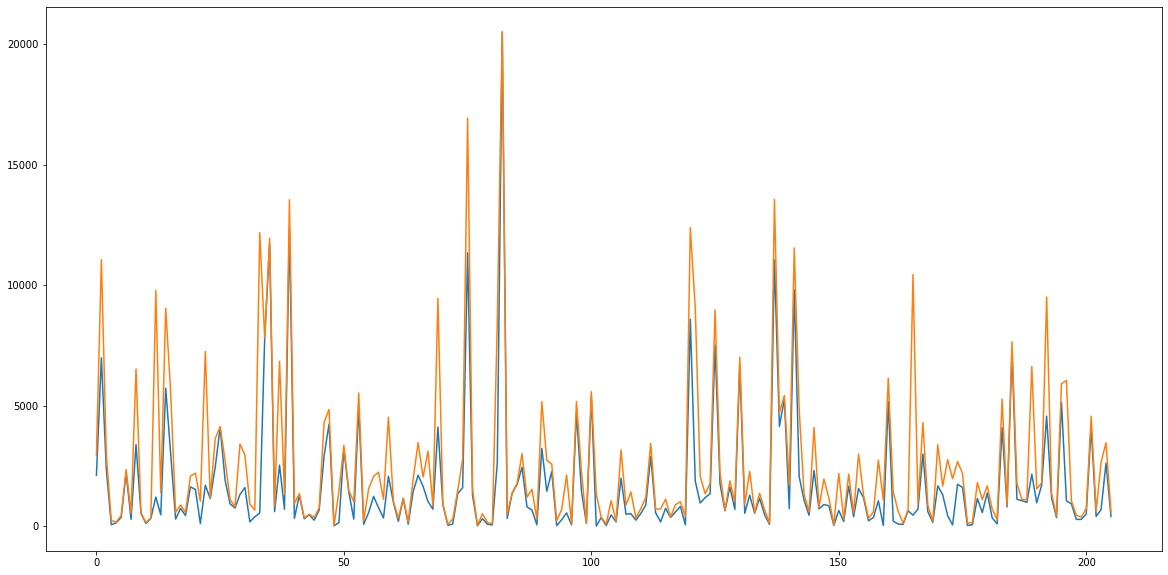

In [ ]:
figure(figsize=(20, 10))
#plot(idxes[:206])
plot(idxes[206:206 * 2])
plot(idxes[206 * 2:206 * 3])
#xlim(0, 3000)

In [ ]:
del bs_input_df
del target_scored_df

## Data generator for graph autoencoder based MoA predictor

In [ ]:
A = np.array([[0.0, 1.0, 1.0], [1.0, 0.0, 1.0], [1.0, 1.0, 0.0]])

In [ ]:
%%writefile MoA_pred_gnn_conf.json
{
	"mode": "train",
	"raw_data_path": "D:\\PycharmProjects\\MoA\\resource\\lish-moa",
	"model_loading": false,
	"multi_gpu": false,
	"num_gpus": 4,
	"cv_type": "train_val_split",
	"val_ratio": 0.1,
	"model_type": "gae",

	"hps": {
		"lr": 0.001,
		"beta_1": 0.999,
		"beta_2": 0.999,
		"decay": 0.0,
		"epochs": 12,
		"batch_size": 16,
		"reduce_lr_factor": 0.99,
		"loss_weights": [1.0]
	},

	"nn_arch": {
		"k_fold": 5,
		"d_treatment_type": 1,
		"num_treatment_type": 6,
        "d_gene_exp": 772,
        "d_cell_type": 100,
		"n_node": 3,
		"d_input_feature": 128,
		"gcn_d_outs": [128, 64, 32, 16],
        "d_moa": 608
	}
}

Overwriting MoA_pred_gnn_conf.json


In [ ]:
np.random.seed(1024)
tf.random.set_seed(1024)

# Load configuration.
with open("MoA_pred_gnn_conf.json", 'r') as f:
    conf = json.load(f)

In [ ]:
hps = conf['hps']
nn_arch = conf['nn_arch']

In [ ]:
input_df = pd.read_csv(os.path.join(raw_data_path, 'train_features.csv')) #.iloc[:1024]
input_df.cp_type = input_df.cp_type.astype('category')
input_df.cp_type = input_df.cp_type.cat.rename_categories(range(len(input_df.cp_type.cat.categories)))
input_df.cp_time = input_df.cp_time.astype('category')
input_df.cp_time = input_df.cp_time.cat.rename_categories(range(len(input_df.cp_time.cat.categories)))
input_df.cp_dose = input_df.cp_dose.astype('category')
input_df.cp_dose = input_df.cp_dose.cat.rename_categories(range(len(input_df.cp_dose.cat.categories)))

# Remove samples of ctl_vehicle.
valid_indexes = input_df.cp_type == 1
input_df = input_df[valid_indexes]

target_scored_df = pd.read_csv(os.path.join(raw_data_path, 'train_targets_scored.csv')) #.iloc[:1024]
target_scored_df = target_scored_df[valid_indexes]

target_nonscored_df = pd.read_csv(os.path.join(raw_data_path, 'train_targets_nonscored.csv')) #.iloc[:1024]
target_nonscored_df = target_nonscored_df[valid_indexes]

target_df = pd.concat([target_scored_df, target_nonscored_df.iloc[:, 1:]], axis=1)
del target_df['sig_id']
target_df.columns = range(len(target_df.columns))

In [ ]:
len(target_df.columns)

608

In [ ]:
target_df.columns

RangeIndex(start=0, stop=608, step=1)

In [ ]:
target_df_sum = target_df.sum()

<AxesSubplot:>

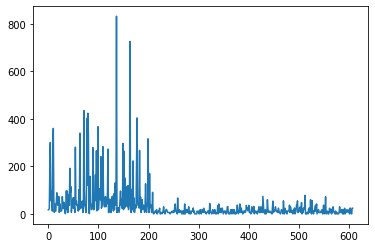

In [ ]:
target_df_sum.plot()

In [ ]:
target_df_sum.min(), target_df_sum.mean(), target_df_sum.median(), target_df_sum.max() 

(0, 35.94078947368421, 12.0, 832)

In [ ]:
target_df_sum.to_numpy()

array([ 17,  18,  24, 190, 301,  73,  54,  96,  12, 270, 360,  66,   7,
        42,  12,  12,  48,  89,  80,  36,  37,  73,   6,  43,  12,  13,
        12,  18,  73,  36,  23,  49,  47,   6,   1,  12,  97,  19,  96,
         6,  60,  80,  36, 192,  89, 115,   7,  31,  38,  67,  24,  68,
        29,   6, 281,  42,  55,  36,  36,  18,  12, 102,  18, 340,  54,
        24,  42,  48,  54,   6,  36, 435, 104,  36,  25,   6,  48, 402,
       121, 424, 336,   6,   1, 158,  48,  36,  18,  25,  50, 279,  18,
        18,  23, 106, 165,  56, 266,  13,  74, 367,  18,  60,  72, 106,
        59, 241,  24,  32,  72, 283,  93,  37,  30,  31,  73,  30,  51,
        42,  92, 273,   6,   6,  62,  12,  61,   6,  31,  72,  74,  25,
        12,  85,  18, 130,  48,  37, 832,   6,  26,  12,  26,   7,  18,
        61,  96,  37,  62,  24,  61, 297,  18, 264,  25, 151,  31,  55,
        98, 115,  30, 119,  18,  36,  84, 726,  48,   6, 103,  19,  56,
       223,  12,  67,   6,  35,  37,  25, 236, 404,  44,  36,  3

In [ ]:
comb(39, 2, exact=True)

741

In [ ]:
comb(int(target_df_sum.mean()), 2, exact=True) * len(target_df.columns)

361760

In [ ]:
s_pairs = []
n_ref = int(target_df_sum.mean())
n_samples = comb(n_ref, 2, exact=True)

for c in tqdm(target_df.columns):
    series = target_df[c]
    series = series[series == 1]
    idxes = list(series.index)
    if len(idxes) == 0:
        continue
    s_pair = np.random.choice(idxes, size=(n_samples, 2), replace=True)    
    s_pairs.append(s_pair)

s_pairs = np.concatenate(s_pairs, axis=0)
s_pairs.shape

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 608/608 [00:00<00:00, 925.41it/s]


(319515, 2)

In [ ]:
s_pairs[:10]

array([[ 2112, 12718],
       [ 7051,  2112],
       [23146, 18012],
       [ 1018,  2997],
       [ 1018, 12654],
       [11016, 11016],
       [ 2112,  2997],
       [ 7051, 23146],
       [ 7051,  7051],
       [23146, 18012]])

In [ ]:
target_df

0    1    2    3    4    5    6    7    8    9    ...  598  599  600  \
0        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
23808    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
23809    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
23810    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
23812    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
23813    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

       601  602  603  604  605  606  607  
0        0    0    0    0    0    0    0  
1        0    0    0    0    0    0    0  
2        0    0    0    0    0    0    0  
3        0    0    0    0    0    0    0  
4        0    0    0    0    0    0    0  
...    ...  ...  ...  ...  ...  ...  ...  
23808    0    0    0    0    0    0    0  
23809    0    0    0    0    0    0    0  
23810    0    0    0    0    0    0    0  
23812    0    0    0    0    0    0    0  
23813    0    0    0    0    0    0    0  

[21948 rows x 608 columns]

In [ ]:
target_df.loc[s_pairs[0, 0], 0]

1

In [ ]:
input_df

sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
1      id_000779bfc       1       2       0  0.0743  0.4087  0.2991  0.0604   
2      id_000a6266a       1       1       0  0.6280  0.5817  1.5540 -0.0764   
3      id_0015fd391       1       1       0 -0.5138 -0.2491 -0.2656  0.5288   
4      id_001626bd3       1       2       1 -0.3254 -0.4009  0.9700  0.6919   
...             ...     ...     ...     ...     ...     ...     ...     ...   
23808  id_fff8c2444       1       2       0  0.1608 -1.0500  0.2551 -0.2239   
23809  id_fffb1ceed       1       0       1  0.1394 -0.0636 -0.1112 -0.5080   
23810  id_fffb70c0c       1       0       1 -1.3260  0.3478 -0.3743  0.9905   
23812  id_fffcb9e7c       1       0       0  0.6660  0.2324  0.4392  0.2044   
23813  id_ffffdd77b       1       2       0 -0.8598  1.0240 -0.1361  0.7952   

          g-4     g-5  ...    c-90    c-91    c-92    c-93    c-94    c-95  \
0     -0.1944 -1.0120  ...  0.2862  0.2584  0.8076  0.5523 -0.1912  0.6584   
1      1.0190  0.5207  ... -0.4265  0.7543  0.4708  0.0230  0.2957  0.4899   
2     -0.0323  1.2390  ... -0.7250 -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3      4.0620 -0.8095  ... -2.0990 -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4      1.4180 -0.8244  ...  0.0042  0.0048  0.6670  1.0690  0.5523 -0.3031   
...       ...     ...  ...     ...     ...     ...     ...     ...     ...   
23808 -0.2431  0.4256  ...  0.0789  0.3538  0.0558  0.3377 -0.4753 -0.2504   
23809 -0.4713  0.7201  ...  0.1969  0.0262 -0.8121  0.3434  0.5372 -0.3246   
23810 -0.7178  0.6621  ...  0.4286  0.4426  0.0423 -0.3195 -0.8086 -0.9798   
23812  0.8531 -0.0343  ... -0.1105  0.4258 -0.2012  0.1506  1.5230  0.7101   
23813 -0.3611 -3.6750  ... -3.3890 -1.7450 -6.6300 -4.0950 -7.3860 -1.4160   

         c-96    c-97    c-98    c-99  
0     -0.3981  0.2139  0.3801  0.4176  
1      0.1522  0.1241  0.6077  0.7371  
2     -0.6417 -0.2187 -1.4080  0.6931  
3     -1.6210 -0.8784 -0.3876 -0.8154  
4      0.1094  0.2885 -0.3786  0.7125  
...       ...     ...     ...     ...  
23808 -0.7415  0.8413 -0.4259  0.2434  
23809  0.0631  0.9171  0.5258  0.4680  
23810 -0.2084 -0.1224 -0.2715  0.3689  
23812  0.1732  0.7015 -0.6290  0.0740  
23813 -3.5770 -0.4775 -2.1500 -4.2520  

[21948 rows x 876 columns]

In [ ]:
s = input_df.loc[0]
type(s), s

(pandas.core.series.Series,
 sig_id     id_000644bb2
 cp_type               1
 cp_time               0
 cp_dose               0
 g-0               1.062
                ...     
 c-95             0.6584
 c-96            -0.3981
 c-97             0.2139
 c-98             0.3801
 c-99             0.4176
 Name: 0, Length: 876, dtype: object)

In [ ]:
s.index

Index(['sig_id', 'cp_type', 'cp_time', 'cp_dose', 'g-0', 'g-1', 'g-2', 'g-3',
       'g-4', 'g-5',
       ...
       'c-90', 'c-91', 'c-92', 'c-93', 'c-94', 'c-95', 'c-96', 'c-97', 'c-98',
       'c-99'],
      dtype='object', length=876)

In [ ]:
s.iloc[0:2].values[0], s.iloc[0:2].values[1]

('id_000644bb2', 1)

In [ ]:
res = s.iloc[4:(4 + 772)].values
res.shape

(772,)

In [ ]:
res = s.iloc[(4 + 772):].values
res.shape

(100,)

In [ ]:
def _make_input_features(pair):
    pair = pair.numpy()
    idx_1 = pair[0]
    idx_2 = pair[1]
    input_1 = input_df.loc[idx_1]
    input_2 = input_df.loc[idx_2]

    # Treatment.
    cp_time_1 = input_1['cp_time']
    cp_dose_1 = input_1['cp_dose']

    treatment_type_1 = cp_time_1 * 2 + cp_dose_1

    # Gene expression.
    gene_exps_1 = input_1.iloc[4:(4 + nn_arch['d_gene_exp'])].values

    # Cell viability.
    cell_vs_1 = input_1.iloc[(4 + nn_arch['d_gene_exp']):].values

    # Adjacency matrix.
    A_1 = A

    # Treatment.
    cp_time_2 = input_2['cp_time']
    cp_dose_2 = input_2['cp_dose']

    treatment_type_2 = cp_time_2 * 2 + cp_dose_2

    # Gene expression.
    gene_exps_2 = input_2.iloc[4:(4 + nn_arch['d_gene_exp'])].values

    # Cell viability.
    cell_vs_2 = input_2.iloc[(4 + nn_arch['d_gene_exp']):].values

    # Adjacency matrix.
    A_2 = A

    return np.expand_dims(treatment_type_1, axis=-1) \
            , gene_exps_1 \
            , cell_vs_1 \
            , A_1 \
            , np.expand_dims(treatment_type_2, axis=-1) \
            , gene_exps_2 \
            , cell_vs_2 \
            , A_2

def make_input_features(inputs):
    t_1, g_1, c_1, A_1, t_2, g_2, c_2, A_2 = tf.py_function(_make_input_features, [inputs], Tout=[tf.float32] * 8)
    return t_1, g_1, c_1, A_1, t_2, g_2, c_2, A_2  

In [ ]:
i_dataset = tf.data.Dataset.from_tensor_slices(s_pairs)
i_dataset = i_dataset.map(make_input_features)
i_iter = i_dataset.as_numpy_iterator()

In [ ]:
res = i_iter.next()

In [ ]:
len(res)

8

In [ ]:
res[0].shape, res[1].shape, res[2].shape, res[3].shape, res[4].shape, res[5].shape, res[6].shape, res[7].shape  

((1,), (772,), (100,), (3, 3), (1,), (772,), (100,), (3, 3))

In [ ]:
res

(array([2.], dtype=float32),
 array([ 4.680e-02, -1.225e+00,  6.865e-01, -4.023e-01, -3.234e-01,
        -3.050e-01,  6.571e-01, -1.580e-02,  9.123e-01, -4.334e-01,
        -5.516e-01,  1.444e-01,  9.611e-01,  1.715e+00, -5.768e-01,
         1.024e-01, -2.145e-01,  5.610e-02,  0.000e+00, -1.010e+00,
         7.027e-01, -7.173e-01, -7.296e-01, -4.617e-01, -7.541e-01,
         1.973e-01, -7.687e-01,  6.000e-02,  6.303e-01,  9.737e-01,
         1.099e-01, -3.696e-01,  7.720e-02, -3.972e-01,  5.801e-01,
        -4.023e-01,  7.983e-01,  2.825e-01,  3.200e-02,  1.209e+00,
        -9.454e-01,  7.500e-02, -8.015e-01, -4.573e-01,  1.113e+00,
        -1.471e+00,  8.570e-02, -8.336e-01, -6.839e-01,  2.385e-01,
         9.856e-01, -2.464e-01,  3.936e-01,  1.475e+00, -1.542e-01,
        -6.035e-01,  2.530e-02,  4.976e-01,  9.620e-02, -6.459e-01,
        -6.130e-01, -7.700e-03, -1.565e-01,  3.788e-01, -9.400e-03,
        -5.287e-01, -5.364e-01, -1.562e+00, -5.174e-01,  2.895e-01,
        -1.950e-01,

## Model design analysis

### Neural nerwork based models

In [ ]:
import sys

In [ ]:
!RMDIR /S /Q keras_unsupervised

In [ ]:
!git clone https://github.com/tonandr/keras_unsupervised.git

In [ ]:
cd keras_unsupervised

In [ ]:
!python setup.py sdist bdist_wheel
!pip install -e ./

python: can't open file 'setup.py': [Errno 2] No such file or directory


^C


In [ ]:
cd ..

d:\PycharmProjects\MoA


In [ ]:
sys.path.append('d:\\PycharmProjects\\MoA\\analysis\\keras_unsupervised')

In [ ]:
import os
import time
import json

import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import StratifiedKFold

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Conv1D, Dense, Concatenate, Dropout
from tensorflow.keras.layers import LSTM, Bidirectional, BatchNormalization, LayerNormalization
from tensorflow.keras.layers import Embedding, Layer
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import TensorBoard, ReduceLROnPlateau, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.constraints import UnitNorm
from tensorflow.keras.initializers import RandomUniform, TruncatedNormal

from ku.composite_layer import (Transformer
    , SIMILARITY_TYPE_DIFF_ABS
    , SIMILARITY_TYPE_PLAIN
    , SIMILARITY_TYPE_SCALED
    , SIMILARITY_TYPE_GENERAL
    , SIMILARITY_TYPE_ADDITIVE)
from ku.composite_layer import DenseBatchNormalization
from ku.backprop import (make_decoder_from_encoder
    , make_autoencoder_from_encoder
    , make_autoencoder_with_sym_sc)

# os.environ["CUDA_DEVICE_ORDER"] = 'PCI_BUS_ID'
# os.environ["CUDA_VISIBLE_DEVICES"] = '-1'

# Constants.
DEBUG = True

MODE_TRAIN = 0
MODE_VAL = 1

CV_TYPE_TRAIN_VAL_SPLIT = 'train_val_split'
CV_TYPE_K_FOLD = 'k_fold'

DATASET_TYPE_PLAIN = 'plain'
DATASET_TYPE_BALANCED = 'balanced'

epsilon = 1e-7


def MoA_loss(W, m=0.5 , ls=0.2, scale=64.0):
    @tf.function
    def _MoA_loss(y_true, y_pred):
        y_true = tf.cast(y_true, dtype=tf.float32)
        pos_mask = y_true
        neg_mask = 1.0 - y_true

        # Label smoothing.
        #y_true = pos_mask * y_true * (1.0 - ls / 2.0) + neg_mask * (y_true + ls / 2.0)

        '''
        pos_log_loss = pos_mask * W[:, :, 0] * tf.sqrt(tf.square(y_true - y_pred))
        pos_log_loss_mean = tf.reduce_mean(pos_log_loss, axis=0) #?
        pos_loss = 1.0 * tf.reduce_mean(pos_log_loss_mean, axis=0)

        neg_log_loss = neg_mask * W[:, :, 1] * tf.sqrt(tf.square(y_true - y_pred))
        neg_log_loss_mean = tf.reduce_mean(neg_log_loss, axis=0) #?
        neg_loss = 1.0 * tf.reduce_mean(neg_log_loss_mean, axis=0)

        loss = pos_loss + neg_loss
        '''

        #loss = tf.reduce_mean(tf.sqrt(tf.square(y_true - y_pred)))
        #loss = tf.losses.binary_crossentropy(y_true, y_pred)
        #log_loss_mean = tf.reduce_mean(log_loss, axis=0) #?
        #loss = tf.reduce_mean(log_loss_mean, axis=0)

        '''
        log_loss = -1.0 * (
                    y_true * tf.math.log(y_pred + epsilon) + (1.0 - y_true) * tf.math.log(1.0 - y_pred + epsilon))
        log_loss_mean = tf.reduce_mean(log_loss, axis=0)  # ?
        loss = tf.reduce_mean(log_loss_mean, axis=0)
        '''

        A = y_pred
        e_AM_A = tf.math.exp(scale * tf.math.cos(tf.math.acos(A) + m))
        #d = A.shape[-1] #?
        S = tf.tile(tf.reduce_sum(tf.math.exp(A), axis=1, keepdims=True), (1, 206))
        S_p = S - tf.math.exp(A) + e_AM_A
        P = e_AM_A / (S_p + epsilon)
        #P = tf.clip_by_value(P, clip_value_min=epsilon, clip_value_max=(1.0 - epsilon))

        #log_loss_1 = -1.0 * W[:, :, 0] * y_true * tf.math.log(P)
        log_loss_1 = -1.0 * y_true * tf.math.log(P)
        log_loss_2 = tf.reduce_sum(log_loss_1, axis=1)
        loss = tf.reduce_mean(log_loss_2, axis=0)
        #tf.print(A, e_AM_A, S, S_p, P, log_loss_1, log_loss_2, loss)
        return loss
    return _MoA_loss


def MoA_metric(y_true, y_pred):
    s_n = 1.4
    E = tf.reduce_mean(tf.math.exp(y_pred), axis=1, keepdims=True)
    E_2 = tf.reduce_mean(tf.square(tf.math.exp(y_pred)), axis=1, keepdims=True)
    S = tf.sqrt(E_2 - tf.square(E))

    e_A = tf.clip_by_value(tf.math.abs(tf.exp(y_pred) - E) / (S + epsilon)
                           , clip_value_min=s_n
                           , clip_value_max=10000000.0) - s_n
    p_hat = e_A / (tf.reduce_sum(e_A, axis=1, keepdims=True) + epsilon)

    y_pred = tf.maximum(tf.minimum(p_hat, 1.0 - 1e-15), 1e-15)
    y_true = tf.cast(y_true, dtype=tf.float32)

    log_loss = -1.0 * (y_true * tf.math.log(y_pred + epsilon) + (1.0 - y_true) * tf.math.log(1.0 - y_pred + epsilon))
    log_loss_mean = tf.reduce_mean(log_loss, axis=0) #?
    loss = tf.reduce_mean(log_loss_mean, axis=0)
    return loss

MoA_metric.__name__ = 'MoA_metric'

resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

strategy = tf.distribute.experimental.TPUStrategy(resolver)

In [ ]:
import time
np.random.seed(int(time.time()))
tf.random.set_seed(int(time.time()))

In [ ]:
class _MoAPredictor(Layer):
    def __init__(self, conf, **kwargs):
        super(_MoAPredictor, self).__init__(**kwargs)

        # Initialize.
        self.conf = conf
        self.hps = self.conf['hps']
        self.nn_arch = self.conf['nn_arch']

        # Design layers.
        # First layers.
        self.embed_treatment_type_0 = Embedding(self.nn_arch['num_treatment_type']
                                           , self.nn_arch['d_input_feature'])
        self.dense_treatment_type_0 = Dense(self.nn_arch['d_input_feature']
                                       , activation='relu')

        self.layer_normalization_0_1 = LayerNormalization()
        self.layer_normalization_0_2 = LayerNormalization()
        self.layer_normalization_0_3 = LayerNormalization()

        # Autoencoder for gene expression.
        input_gene_exp_1 = Input(shape=(self.nn_arch['d_gene_exp'],))

        dense_1_1 = Dense(self.nn_arch['dense_1_1_d'], activation='swish')
        batch_normalization_1_1 = BatchNormalization()
        dense_batch_normalization_1_1 = DenseBatchNormalization(dense_1_1, batch_normalization_1_1)

        dense_1_2 = Dense(self.nn_arch['dense_1_2_d'], activation='swish')
        batch_normalization_1_2 = BatchNormalization()
        dense_batch_normalization_1_2 = DenseBatchNormalization(dense_1_2, batch_normalization_1_2)

        dense_1_3 = Dense(self.nn_arch['dense_1_3_d'], activation='swish')
        batch_normalization_1_3 = BatchNormalization()
        dense_batch_normalization_1_3 = DenseBatchNormalization(dense_1_3, batch_normalization_1_3)

        dense_1_4 = Dense(self.nn_arch['dense_1_4_d'], activation='swish')
        batch_normalization_1_4 = BatchNormalization()
        dense_batch_normalization_1_4 = DenseBatchNormalization(dense_1_4, batch_normalization_1_4)

        self.encoder_gene_exp_1 = keras.Sequential([input_gene_exp_1
                                                    , dense_batch_normalization_1_1
                                                    , dense_batch_normalization_1_2
                                                    , dense_batch_normalization_1_3
                                                    , dense_batch_normalization_1_4])
        self.decoder_gene_exp_1 = make_decoder_from_encoder(self.encoder_gene_exp_1)

        # Transformer for gene expression.
        self.transformer_gene_exps = []

        for i in range(self.nn_arch['num_transformer']):
            self.transformer_gene_exps.append(Transformer(1
                                                , 1
                                                , dropout_rate=self.nn_arch['dropout_rate']
                                                , similarity_type=self.nn_arch['similarity_type']
                                                , layer_norm_f=False))

        # Autoencoder for cell type.
        input_gene_exp_2 = Input(shape=(self.nn_arch['d_cell_type'],))

        dense_2_1 = Dense(self.nn_arch['dense_2_1_d'], activation='swish')
        batch_normalization_2_1 = BatchNormalization()
        dense_batch_normalization_2_1 = DenseBatchNormalization(dense_2_1, batch_normalization_2_1)

        dense_2_2 = Dense(self.nn_arch['dense_2_2_d'], activation='swish')
        batch_normalization_2_2 = BatchNormalization()
        dense_batch_normalization_2_2 = DenseBatchNormalization(dense_2_2, batch_normalization_2_2)

        dense_2_3 = Dense(self.nn_arch['dense_2_3_d'], activation='swish')
        batch_normalization_2_3 = BatchNormalization()
        dense_batch_normalization_2_3 = DenseBatchNormalization(dense_2_3, batch_normalization_2_3)

        self.encoder_cell_type_2 = keras.Sequential([input_gene_exp_2
                                                    , dense_batch_normalization_2_1
                                                    , dense_batch_normalization_2_2
                                                    , dense_batch_normalization_2_3])
        self.decoder_cell_type_2 = make_decoder_from_encoder(self.encoder_cell_type_2)
        self.dropout_2 = Dropout(self.nn_arch['dropout_rate'])

        # Skip-connection autoencoder layer.
        self.sc_aes = []
        self.dropout_3 = Dropout(self.nn_arch['dropout_rate'])

        for i in range(self.nn_arch['num_sc_ae']):
            input_sk_ae_3 = Input(shape=(self.nn_arch['d_hidden'],))

            dense_3_1 = Dense(self.nn_arch['dense_3_1_d'], activation='swish')
            batch_normalization_3_1 = BatchNormalization()
            dense_batch_normalization_3_1 = DenseBatchNormalization(dense_3_1, batch_normalization_3_1)

            dense_3_2 = Dense(self.nn_arch['dense_3_2_d'], activation='swish')
            batch_normalization_3_2 = BatchNormalization()
            dense_batch_normalization_3_2 = DenseBatchNormalization(dense_3_2, batch_normalization_3_2)

            dense_3_3 = Dense(self.nn_arch['dense_3_3_d'], activation='swish')
            batch_normalization_3_3 = BatchNormalization()
            dense_batch_normalization_3_3 = DenseBatchNormalization(dense_3_3, batch_normalization_3_3)

            dense_3_4 = Dense(self.nn_arch['dense_3_4_d'], activation='swish')
            batch_normalization_3_4 = BatchNormalization()
            dense_batch_normalization_3_4 = DenseBatchNormalization(dense_3_4, batch_normalization_3_4)

            sc_encoder_3 = keras.Sequential([input_sk_ae_3
                                                        , dense_batch_normalization_3_1
                                                        , dense_batch_normalization_3_2
                                                        , dense_batch_normalization_3_3
                                                        , dense_batch_normalization_3_4])
            sc_autoencoder_3 = make_autoencoder_from_encoder(sc_encoder_3)
            self.sc_aes.append(make_autoencoder_with_sym_sc(sc_autoencoder_3))

        # Final layers.
        self.dense_4_1 = Dense(self.nn_arch['dense_4_1_d'], activation='swish')
        self.dense_4_2 = Dense(self.nn_arch['dense_4_2_d'], activation='swish')
        self.dense_4_3 = Dense(self.nn_arch['dense_4_3_d'], activation='swish')
        self.dense_4_4 = Dense(self.nn_arch['num_moa_annotation']
                               , activation='linear'
                               , kernel_initializer=TruncatedNormal()
                               , kernel_constraint=UnitNorm()
                               , use_bias=False) #?

    def call(self, inputs):
        t = inputs[0]
        g = inputs[1]
        c = inputs[2]

        # First layers.
        t = self.embed_treatment_type_0(t)
        t = tf.reshape(t, (-1, self.nn_arch['d_input_feature']))
        t = self.dense_treatment_type_0(t)

        t = self.layer_normalization_0_1(t)
        g = self.layer_normalization_0_2(g)
        c = self.layer_normalization_0_3(c)

        # Gene expression.
        g_e = self.encoder_gene_exp_1(g)
        x_g = self.decoder_gene_exp_1(g_e)
        x_g = tf.expand_dims(x_g, axis=-1)
        for i in range(self.nn_arch['num_transformer']):
            x_g = self.transformer_gene_exps[i]([x_g, x_g]) #?
        x_g = tf.squeeze(x_g, axis=-1)

        # Cell type.
        c_e = self.encoder_cell_type_2(c)
        x_c = self.decoder_cell_type_2(c_e)
        x_c = self.dropout_2(x_c)

        # Skip-connection autoencoder and final layers.
        x = tf.concat([t, g_e, c_e], axis=-1)
        for i in range(self.nn_arch['num_sc_ae']):
            x = self.sc_aes[i](x)
            x = self.dropout_3(x)

        # Final layers.
        x = self.dense_4_1(x)
        x = self.dense_4_2(x)
        x = self.dense_4_3(x)

        # Normalize x.
        x = x / tf.sqrt(tf.reduce_sum(tf.square(x), axis=1, keepdims=True))
        x1 = self.dense_4_4(x)
        outputs = [x_g, x_c, x1]
        # tf.sqrt(tf.reduce_sum(tf.square(self.dense_4_4.weights[1][:, 0])))
        return outputs

    def get_config(self):
        """Get configuration."""
        config = {'conf': self.conf}
        base_config = super(_MoAPredictor, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [ ]:
class MoAPredictor(object):
    """MoA predictor."""

    # Constants.
    MODEL_PATH = 'MoA_predictor'
    OUTPUT_FILE_NAME = 'submission.csv'
    EVALUATION_FILE_NAME = 'eval.csv'

    def __init__(self, conf):
        """
        Parameters
        ----------
        conf: Dictionary
            Configuration dictionary.
        """
        # Initialize.
        self.conf = conf
        self.raw_data_path = self.conf['raw_data_path']
        self.hps = self.conf['hps']
        self.nn_arch = self.conf['nn_arch']
        self.model_loading = self.conf['model_loading']

        # Create weight for classification imbalance.
        W = self._create_W()

        # with tpu_strategy.scope():
        if self.conf['cv_type'] == CV_TYPE_TRAIN_VAL_SPLIT:
            if self.model_loading:
                
                self.model = load_model(self.MODEL_PATH + '.h5'
                                            , custom_objects={'Transformer': Transformer
                                            , 'MoA_loss': MoA_loss
                                            , 'MoA_metric': MoA_metric
                                            , '_MoAPredictor': _MoAPredictor}
                                        , compile=False)
                
                #self.model = load_model(self.MODEL_PATH, compile=False)
                opt = optimizers.Adam(lr=self.hps['lr']
                                      , beta_1=self.hps['beta_1']
                                      , beta_2=self.hps['beta_2']
                                      , decay=self.hps['decay'])
                self.model.compile(optimizer=opt
                                   , loss=['mse', 'mse', MoA_loss(W
                                                                  , self.nn_arch['additive_margin']
                                                                  , self.hps['ls']
                                                                  , self.nn_arch['scale'])]
                              , loss_weights=self.hps['loss_weights']
                              , metrics=[['mse'], ['mse'], [MoA_metric]]
                              , run_eagerly=False)
            else:
                # Design the MoA prediction model.
                # Input.
                input_t = Input(shape=(self.nn_arch['d_treatment_type'],))
                input_g = Input(shape=(self.nn_arch['d_gene_exp'],))
                input_c = Input(shape=(self.nn_arch['d_cell_type'],))

                outputs = _MoAPredictor(self.conf, name='moap')([input_t, input_g, input_c])

                opt = optimizers.Adam(lr=self.hps['lr']
                                      , beta_1=self.hps['beta_1']
                                      , beta_2=self.hps['beta_2']
                                      , decay=self.hps['decay'])

                self.model = Model(inputs=[input_t, input_g, input_c], outputs=outputs)
                self.model.compile(optimizer=opt
                                   , loss=['mse', 'mse', MoA_loss(W
                                                                  , self.nn_arch['additive_margin']
                                                                  , self.hps['ls']
                                                                  , self.nn_arch['scale'])]
                              , loss_weights=self.hps['loss_weights']
                              , metrics=[['mse'], ['mse'], [MoA_metric]]
                              , run_eagerly=True)
                self.model.summary()
        elif self.conf['cv_type'] == CV_TYPE_K_FOLD:
            self.k_fold_models = []

            if self.model_loading:
                opt = optimizers.Adam(lr=self.hps['lr']
                                      , beta_1=self.hps['beta_1']
                                      , beta_2=self.hps['beta_2']
                                      , decay=self.hps['decay'])

                # load models for K-fold.
                for i in range(self.nn_arch['k_fold']):
                    self.k_fold_models.append(load_model(self.MODEL_PATH + '_' + str(i) + '.h5'
                                            , custom_objects={'Transformer': Transformer
                                            , 'MoA_loss': MoA_loss
                                            , 'MoA_metric': MoA_metric
                                            , '_MoAPredictor': _MoAPredictor}))
                    self.k_fold_models[i].compile(optimizer=opt
                                       , loss=['mse', 'mse', MoA_loss(W
                                                                      , self.nn_arch['additive_margin']
                                                                      , self.hps['ls']
                                                                      , self.nn_arch['scale'])]
                                       , loss_weights=self.hps['loss_weights']
                                       , metrics=[['mse'], ['mse'], [MoA_metric]]
                                       , run_eagerly=True)
            else:
                # Create models for K-fold.
                for i in range(self.nn_arch['k_fold']):
                    # Design the MoA prediction model.
                    # Input.
                    input_t = Input(shape=(self.nn_arch['d_treatment_type'],))
                    input_g = Input(shape=(self.nn_arch['d_gene_exp'],))
                    input_c = Input(shape=(self.nn_arch['d_cell_type'],))

                    outputs = _MoAPredictor(self.conf, name='moap')([input_t, input_g, input_c])

                    opt = optimizers.Adam(lr=self.hps['lr']
                                          , beta_1=self.hps['beta_1']
                                          , beta_2=self.hps['beta_2']
                                          , decay=self.hps['decay'])

                    model = Model(inputs=[input_t, input_g, input_c], outputs=outputs)
                    model.compile(optimizer=opt
                                  , loss=['mse', 'mse', MoA_loss(W
                                                                 , self.nn_arch['additive_margin']
                                                                 , self.hps['ls']
                                                                 , self.nn_arch['scale'])]
                                  , loss_weights=self.hps['loss_weights']
                                  , metrics=[['mse'], ['mse'], [MoA_metric]]
                                  , run_eagerly=True)
                    model.summary()

                    self.k_fold_models.append(model)
        else:
            raise ValueError('cv_type is not valid.')

        # Create dataset.
        self._create_dataset()

    def _create_dataset(self):
        input_df = pd.read_csv(os.path.join(self.raw_data_path, 'train_features.csv')) #.iloc[:1024]
        input_df.cp_type = input_df.cp_type.astype('category')
        input_df.cp_type = input_df.cp_type.cat.rename_categories(range(len(input_df.cp_type.cat.categories)))
        input_df.cp_time = input_df.cp_time.astype('category')
        input_df.cp_time = input_df.cp_time.cat.rename_categories(range(len(input_df.cp_time.cat.categories)))
        input_df.cp_dose = input_df.cp_dose.astype('category')
        input_df.cp_dose = input_df.cp_dose.cat.rename_categories(range(len(input_df.cp_dose.cat.categories)))

        # Remove samples of ctl_vehicle.
        valid_indexes = input_df.cp_type == 1
        input_df = input_df[valid_indexes]

        target_scored_df = pd.read_csv(os.path.join(self.raw_data_path, 'train_targets_scored.csv')) #.iloc[:1024]
        target_scored_df = target_scored_df[valid_indexes]
        del target_scored_df['sig_id']
        target_scored_df.columns = range(len(target_scored_df.columns))

        def make_input_features(inputs):
            # Treatment.
            cp_time = inputs['cp_time']
            cp_dose = inputs['cp_dose']

            treatment_type = cp_time * 2 + cp_dose

            # Gene expression.
            gene_exps = [inputs['g-' + str(v)] for v in range(self.nn_arch['d_gene_exp'])]
            gene_exps = tf.stack(gene_exps, axis=0)

            # Cell viability.
            cell_vs = [inputs['c-' + str(v)] for v in range(self.nn_arch['d_cell_type'])]
            cell_vs = tf.stack(cell_vs, axis=0)

            return (tf.expand_dims(treatment_type, axis=-1), gene_exps, cell_vs)

        def make_a_target_features(inputs):
            # Gene expression.
            gene_exps = [inputs['g-' + str(v)] for v in range(self.nn_arch['d_gene_exp'])]
            gene_exps = tf.stack(gene_exps, axis=0)

            # Cell viability.
            cell_vs = [inputs['c-' + str(v)] for v in range(self.nn_arch['d_cell_type'])]
            cell_vs = tf.stack(cell_vs, axis=0)

            return gene_exps, cell_vs

        def make_target_features(inputs):
            # MoA annotations' values.
            MoA_values = [inputs[v] for v in range(self.nn_arch['num_moa_annotation'])]
            MoA_values = tf.stack(MoA_values, axis=0)

            return MoA_values

        def divide_inputs(input1, input2):
            return input1[0], input1[1], input2

        if self.conf['cv_type'] == CV_TYPE_TRAIN_VAL_SPLIT:
            if self.conf['dataset_type'] == DATASET_TYPE_PLAIN:
                train_val_index = np.arange(len(input_df))
                np.random.shuffle(train_val_index)
                num_val = int(self.conf['val_ratio'] * len(input_df))
                num_tr = len(input_df) - num_val
                train_index = train_val_index[:num_tr]
                val_index = train_val_index[num_tr:]
                self.train_index = train_index
                self.val_index = val_index

                # Training dataset.
                input_dataset = tf.data.Dataset.from_tensor_slices(input_df.iloc[train_index].to_dict('list'))
                input_dataset = input_dataset.map(make_input_features)

                a_target_dataset = tf.data.Dataset.from_tensor_slices(input_df.iloc[train_index].to_dict('list'))
                a_target_dataset = a_target_dataset.map(make_a_target_features)

                target_dataset = tf.data.Dataset.from_tensor_slices(target_scored_df.iloc[train_index].to_dict('list'))
                target_dataset = target_dataset.map(make_target_features)

                f_target_dataset = tf.data.Dataset.zip((a_target_dataset, target_dataset)).map(divide_inputs)

                # Inputs and targets.
                tr_dataset = tf.data.Dataset.zip((input_dataset, f_target_dataset))
                tr_dataset = tr_dataset.shuffle(buffer_size=self.hps['batch_size'] * 5
                                                , reshuffle_each_iteration=True).repeat().batch(self.hps['batch_size'])
                self.step = len(input_df.iloc[train_index]) // self.hps['batch_size']

                # Validation dataset.
                input_dataset = tf.data.Dataset.from_tensor_slices(input_df.iloc[val_index].to_dict('list'))
                input_dataset = input_dataset.map(make_input_features)

                a_target_dataset = tf.data.Dataset.from_tensor_slices(input_df.iloc[val_index].to_dict('list'))
                a_target_dataset = a_target_dataset.map(make_a_target_features)

                target_dataset = tf.data.Dataset.from_tensor_slices(target_scored_df.iloc[val_index].to_dict('list'))
                target_dataset = target_dataset.map(make_target_features)

                f_target_dataset = tf.data.Dataset.zip((a_target_dataset, target_dataset)).map(divide_inputs)

                # Inputs and targets.
                val_dataset = tf.data.Dataset.zip((input_dataset, f_target_dataset))
                val_dataset = val_dataset.batch(self.hps['batch_size'])

                self.trval_dataset = (tr_dataset, val_dataset)
            elif self.conf['dataset_type'] == DATASET_TYPE_BALANCED:
                MoA_p_sets = []
                for col in target_scored_df.columns:
                    s = target_scored_df.iloc[:, col]
                    s = s[s == 1]
                    MoA_p_sets.append(list(s.index))

                idxes = []
                for i in tqdm(range(self.hps['rep'])):
                    for col in target_scored_df.columns:
                        if len(MoA_p_sets[col]) == 0:
                            continue

                        idx = np.random.choice(MoA_p_sets[col], size=1, replace=True)[0]
                        idxes.append(idx)

                bs_input_df = input_df.loc[idxes]
                bs_target_scored_df = target_scored_df.loc[idxes]
                bs_input_df.shape, bs_target_scored_df.shape

                input_df = bs_input_df.reset_index(drop=True)
                target_scored_df = bs_target_scored_df.reset_index(drop=True)
                
                train_val_index = np.arange(len(input_df))
                np.random.shuffle(train_val_index)
                num_val = int(self.conf['val_ratio'] * len(input_df))
                num_tr = len(input_df) - num_val
                train_index = train_val_index[:num_tr]
                val_index = train_val_index[num_tr:]
                self.train_index = train_index
                self.val_index = val_index

                # Training dataset.
                input_dataset = tf.data.Dataset.from_tensor_slices(input_df.iloc[train_index].to_dict('list'))
                input_dataset = input_dataset.map(make_input_features)

                a_target_dataset = tf.data.Dataset.from_tensor_slices(input_df.iloc[train_index].to_dict('list'))
                a_target_dataset = a_target_dataset.map(make_a_target_features)

                target_dataset = tf.data.Dataset.from_tensor_slices(target_scored_df.iloc[train_index].to_dict('list'))
                target_dataset = target_dataset.map(make_target_features)

                f_target_dataset = tf.data.Dataset.zip((a_target_dataset, target_dataset)).map(divide_inputs)

                # Inputs and targets.
                tr_dataset = tf.data.Dataset.zip((input_dataset, f_target_dataset))
                tr_dataset = tr_dataset.shuffle(buffer_size=self.hps['batch_size'] * 5
                                                , reshuffle_each_iteration=True).repeat().batch(self.hps['batch_size'])
                self.step = len(input_df.iloc[train_index]) // self.hps['batch_size']

                # Validation dataset.
                input_dataset = tf.data.Dataset.from_tensor_slices(input_df.iloc[val_index].to_dict('list'))
                input_dataset = input_dataset.map(make_input_features)

                a_target_dataset = tf.data.Dataset.from_tensor_slices(input_df.iloc[val_index].to_dict('list'))
                a_target_dataset = a_target_dataset.map(make_a_target_features)

                target_dataset = tf.data.Dataset.from_tensor_slices(target_scored_df.iloc[val_index].to_dict('list'))
                target_dataset = target_dataset.map(make_target_features)

                f_target_dataset = tf.data.Dataset.zip((a_target_dataset, target_dataset)).map(divide_inputs)

                # Inputs and targets.
                val_dataset = tf.data.Dataset.zip((input_dataset, f_target_dataset))
                val_dataset = val_dataset.batch(self.hps['batch_size'])

                self.trval_dataset = (tr_dataset, val_dataset)
            else:
                raise ValueError('dataset type is not valid.')
        elif self.conf['cv_type'] == CV_TYPE_K_FOLD:
            stratified_kfold = StratifiedKFold(n_splits=self.nn_arch['k_fold'])
            # group_kfold = GroupKFold(n_splits=self.nn_arch['k_fold'])
            self.k_fold_trval_datasets = []

            for train_index, val_index in stratified_kfold.split(input_df, input_df.cp_type):
                # Training dataset.
                input_dataset = tf.data.Dataset.from_tensor_slices(input_df.iloc[train_index].to_dict('list'))
                input_dataset = input_dataset.map(make_input_features)

                a_target_dataset = tf.data.Dataset.from_tensor_slices(input_df.iloc[train_index].to_dict('list'))
                a_target_dataset = a_target_dataset.map(make_a_target_features)

                target_dataset = tf.data.Dataset.from_tensor_slices(target_scored_df.iloc[train_index].to_dict('list'))
                target_dataset = target_dataset.map(make_target_features)

                f_target_dataset = tf.data.Dataset.zip((a_target_dataset, target_dataset)).map(divide_inputs)

                # Inputs and targets.
                tr_dataset = tf.data.Dataset.zip((input_dataset, f_target_dataset))
                tr_dataset = tr_dataset.shuffle(buffer_size=self.hps['batch_size'] * 5
                                                , reshuffle_each_iteration=True).repeat().batch(self.hps['batch_size'])
                self.step = len(input_df.iloc[train_index]) // self.hps['batch_size']

                # Validation dataset.
                input_dataset = tf.data.Dataset.from_tensor_slices(input_df.iloc[val_index].to_dict('list'))
                input_dataset = input_dataset.map(make_input_features)

                a_target_dataset = tf.data.Dataset.from_tensor_slices(input_df.iloc[val_index].to_dict('list'))
                a_target_dataset = a_target_dataset.map(make_a_target_features)

                target_dataset = tf.data.Dataset.from_tensor_slices(target_scored_df.iloc[val_index].to_dict('list'))
                target_dataset = target_dataset.map(make_target_features)

                f_target_dataset = tf.data.Dataset.zip((a_target_dataset, target_dataset)).map(divide_inputs)

                # Inputs and targets.
                val_dataset = tf.data.Dataset.zip((input_dataset, f_target_dataset))
                val_dataset = val_dataset.batch(self.hps['batch_size'])

                self.k_fold_trval_datasets.append((tr_dataset, val_dataset))
        else:
            raise ValueError('cv_type is not valid.')

    def _create_W(self):
        target_scored_df = pd.read_csv(os.path.join(self.raw_data_path, 'train_targets_scored.csv'))
        del target_scored_df['sig_id']

        weights = []
        for c in target_scored_df.columns:
            s = target_scored_df[c]
            s = s.value_counts()
            s = s / s.sum()
            weights.append(s.values)

        weight = np.expand_dims(np.array(weights), axis=0)

        return weight

    def train(self):
        """Train."""
        reduce_lr = ReduceLROnPlateau(monitor='val_loss'
                                      , factor=self.hps['reduce_lr_factor']
                                      , patience=2
                                      , min_lr=1.e-8
                                      , verbose=1)
        tensorboard = TensorBoard(histogram_freq=1
                                  , write_graph=True
                                  , write_images=True
                                  , update_freq='epoch')

        '''
        def schedule_lr(e_i):
            self.hps['lr'] = self.hps['reduce_lr_factor'] * self.hps['lr']
            return self.hps['lr']

        lr_scheduler = LearningRateScheduler(schedule_lr, verbose=1)
        '''

        if self.conf['cv_type'] == CV_TYPE_TRAIN_VAL_SPLIT:
            model_check_point = ModelCheckpoint(self.MODEL_PATH + '.h5'
                                                , monitor='val_loss'
                                                , verbose=1
                                                , save_best_only=True)

            self.model.fit_generator(self.trval_dataset[0]
                                                , steps_per_epoch=self.step
                                                , epochs=self.hps['epochs']
                                                , verbose=1
                                                , max_queue_size=80
                                                , workers=4
                                                , use_multiprocessing=False
                                                , callbacks=[model_check_point, reduce_lr] #, tensorboard]
                                                , validation_data=self.trval_dataset[1]
                                                , validation_freq=1
                                                , shuffle=True)
        elif self.conf['cv_type'] == CV_TYPE_K_FOLD:
            for i in range(self.nn_arch['k_fold']):
                model_check_point = ModelCheckpoint(self.MODEL_PATH + '_' + str(i) + '.h5'
                                                    , monitor='val_loss'
                                                    , verbose=1
                                                    , save_best_only=True)

                self.k_fold_models[i].fit_generator(self.k_fold_trval_datasets[i][0]
                                                    , steps_per_epoch=self.step
                                                    , epochs=self.hps['epochs']
                                                    , verbose=1
                                                    , max_queue_size=80
                                                    , workers=4
                                                    , use_multiprocessing=False
                                                    , callbacks=[model_check_point, reduce_lr] #, tensorboard]
                                                    , validation_data=self.k_fold_trval_datasets[i][1]
                                                    , validation_freq=1
                                                    , shuffle=True)
        else:
            raise ValueError('cv_type is not valid.')

        #print('Save the model.')
        #self.model.save(self.MODEL_PATH, save_format='h5')
        # self.model.save(self.MODEL_PATH, save_format='tf')

    def evaluate(self):
        """Evaluate."""
        assert self.conf['cv_type'] == CV_TYPE_TRAIN_VAL_SPLIT

        input_df = pd.read_csv(os.path.join(self.raw_data_path, 'train_features.csv')) #.iloc[:1024]
        input_df.cp_type = input_df.cp_type.astype('category')
        input_df.cp_type = input_df.cp_type.cat.rename_categories(range(len(input_df.cp_type.cat.categories)))
        input_df.cp_time = input_df.cp_time.astype('category')
        input_df.cp_time = input_df.cp_time.cat.rename_categories(range(len(input_df.cp_time.cat.categories)))
        input_df.cp_dose = input_df.cp_dose.astype('category')
        input_df.cp_dose = input_df.cp_dose.cat.rename_categories(range(len(input_df.cp_dose.cat.categories)))

        # Remove samples of ctl_vehicle.
        valid_indexes = input_df.cp_type == 1  # ?
        input_df = input_df[valid_indexes]
        self.val_index = range(len(input_df))
        
        target_scored_df = pd.read_csv(os.path.join(self.raw_data_path, 'train_targets_scored.csv')) #.iloc[:1024]
        target_scored_df = target_scored_df[valid_indexes]
        
        target_scored_df = target_scored_df.iloc[self.val_index]
        MoA_annots = target_scored_df.columns[1:]

        def make_input_features(inputs):
            # Treatment.
            cp_time = inputs['cp_time']
            cp_dose = inputs['cp_dose']

            treatment_type = cp_time * 2 + cp_dose

            # Gene expression.
            gene_exps = [inputs['g-' + str(v)] for v in range(self.nn_arch['d_gene_exp'])]
            gene_exps = tf.stack(gene_exps, axis=0)

            # Cell viability.
            cell_vs = [inputs['c-' + str(v)] for v in range(self.nn_arch['d_cell_type'])]
            cell_vs = tf.stack(cell_vs, axis=0)

            return (tf.expand_dims(treatment_type, axis=-1), gene_exps, cell_vs)

        # Validation dataset.
        val_dataset = tf.data.Dataset.from_tensor_slices(input_df.iloc[self.val_index].to_dict('list'))
        val_dataset = val_dataset.map(make_input_features)

        val_iter = val_dataset.as_numpy_iterator()

        # Predict MoAs.
        sig_id_list = []
        MoAs = [[] for _ in range(len(MoA_annots))]

        for i, d in tqdm(enumerate(val_iter)):
            t, g, c = d
            id = target_scored_df['sig_id'].iloc[i]
            t = np.expand_dims(t, axis=0)
            g = np.expand_dims(g, axis=0)
            c = np.expand_dims(c, axis=0)

            if self.conf['cv_type'] == CV_TYPE_TRAIN_VAL_SPLIT:
                _, _, result = self.model.predict([t, g, c])
                result = np.squeeze(result, axis=0)
                #result = np.exp(result) / (np.sum(np.exp(result), axis=0) + epsilon)

                for i, MoA in enumerate(result):
                    MoAs[i].append(MoA)
            elif self.conf['cv_type'] == CV_TYPE_K_FOLD:
                # Conduct ensemble prediction.
                result_list = []

                for i in range(self.nn_arch['k_fold']):
                    _, _, result = self.k_fold_models[i].predict([t, g, c])
                    result = np.squeeze(result, axis=0)
                    #result = np.exp(result) / (np.sum(np.exp(result), axis=0) + epsilon)
                    result_list.append(result)

                result_mean = np.asarray(result_list).mean(axis=0)

                for i, MoA in enumerate(result_mean):
                    MoAs[i].append(MoA)
            else:
                raise ValueError('cv_type is not valid.')

            sig_id_list.append(id)

        # Save the result.
        result_dict = {'sig_id': sig_id_list}
        for i, MoA_annot in enumerate(MoA_annots):
            result_dict[MoA_annot] = MoAs[i]

        submission_df = pd.DataFrame(result_dict)
        submission_df.to_csv(self.OUTPUT_FILE_NAME, index=False)

        target_scored_df.to_csv('gt.csv', index=False)

    def test(self):
        """Test."""

        # Create the test dataset.
        input_df = pd.read_csv(os.path.join(self.raw_data_path, 'test_features.csv'))
        input_df.cp_type = input_df.cp_type.astype('category')
        input_df.cp_type = input_df.cp_type.cat.rename_categories(range(len(input_df.cp_type.cat.categories)))
        input_df.cp_time = input_df.cp_time.astype('category')
        input_df.cp_time = input_df.cp_time.cat.rename_categories(range(len(input_df.cp_time.cat.categories)))
        input_df.cp_dose = input_df.cp_dose.astype('category')
        input_df.cp_dose = input_df.cp_dose.cat.rename_categories(range(len(input_df.cp_dose.cat.categories)))

        # Remove samples of ctl_vehicle.
        valid_indexes = input_df.cp_type == 1 #?
        target_scored_df = pd.read_csv(os.path.join(self.raw_data_path, 'train_targets_scored.csv'))
        MoA_annots = target_scored_df.columns[1:]

        def make_input_features(inputs):
            id_ = inputs['sig_id']

            # Treatment.
            cp_time = inputs['cp_time']
            cp_dose = inputs['cp_dose']

            treatment_type = cp_time * 2 + cp_dose

            # Gene expression.
            gene_exps = [inputs['g-' + str(v)] for v in range(self.nn_arch['d_gene_exp'])]
            gene_exps = tf.stack(gene_exps, axis=0)

            # Cell viability.
            cell_vs = [inputs['c-' + str(v)] for v in range(self.nn_arch['d_cell_type'])]
            cell_vs = tf.stack(cell_vs, axis=0)

            return (id_, tf.expand_dims(treatment_type, axis=-1), gene_exps, cell_vs)

        test_dataset = tf.data.Dataset.from_tensor_slices(input_df.to_dict('list'))
        test_dataset = test_dataset.map(make_input_features)
        test_iter = test_dataset.as_numpy_iterator()

        # Predict MoAs.
        sig_id_list = []
        MoAs = [[] for _ in range(len(MoA_annots))]

        for id, t, g, c in tqdm(test_iter):
            id = id.decode('utf8') #?
            t = np.expand_dims(t, axis=0)
            g = np.expand_dims(g, axis=0)
            c = np.expand_dims(c, axis=0)

            if self.conf['cv_type'] == CV_TYPE_TRAIN_VAL_SPLIT:
                _, _, result = self.model.layers[-1]([t, g, c]) #self.model.predict([t, g, c])
                result = np.squeeze(result, axis=0)
                #result = np.exp(result) / (np.sum(np.exp(result), axis=0) + epsilon)

                for i, MoA in enumerate(result):
                    MoAs[i].append(MoA)
            elif self.conf['cv_type'] == CV_TYPE_K_FOLD:
                # Conduct ensemble prediction.
                result_list = []

                for i in range(self.nn_arch['k_fold']):
                    _, _, result = self.k_fold_models[i].predict([t, g, c])
                    result = np.squeeze(result, axis=0)
                    #result = np.exp(result) / (np.sum(np.exp(result), axis=0) + epsilon)
                    result_list.append(result)

                result_mean = np.asarray(result_list).mean(axis=0)

                for i, MoA in enumerate(result_mean):
                    MoAs[i].append(MoA)
            else:
                raise ValueError('cv_type is not valid.')

            sig_id_list.append(id)

        # Save the result.
        result_dict = {'sig_id': sig_id_list}
        for i, MoA_annot in enumerate(MoA_annots):
            result_dict[MoA_annot] = MoAs[i]

        submission_df = pd.DataFrame(result_dict)
        submission_df.to_csv(self.OUTPUT_FILE_NAME, index=False)

In [ ]:
%%writefile MoA_pred_conf.json
{
	"mode": "test",
	"raw_data_path": "D:\\PycharmProjects\\MoA\\resource\\lish-moa",
	"model_loading": true,
	"multi_gpu": false,
	"num_gpus": 4,
	"cv_type": "train_val_split",
	"dataset_type": "balanced",
	"val_ratio": 0.01,

	"hps": {
		"lr": 0.001,
		"beta_1": 0.999,
		"beta_2": 0.999,
		"decay": 0.0,
		"epochs": 3,
		"batch_size": 16,
		"reduce_lr_factor": 0.99,
		"ls": 0.0,
		"loss_weights": [1.0, 0.3, 10.0],
		"rep": 1,
		"sn_t": 0.8,
		"m1": 20.709097,
		"m2": -22.486975
	},

	"nn_arch": {
		"k_fold": 5,
		"d_treatment_type": 1,
		"num_treatment_type": 6,
		"d_input_feature": 8,
        "d_gene_exp": 772,
        "d_cell_type": 100,
        "dense_1_1_d": 512,
		"dense_1_2_d": 256,
		"dense_1_3_d": 128,
		"dense_1_4_d": 64,
		"dense_2_1_d": 64,
		"dense_2_2_d": 32,
		"dense_2_3_d": 16,
		"num_sc_ae": 0,
		"dense_3_1_d": 88,
		"dense_3_2_d": 96,
		"dense_3_3_d": 72,
		"dense_3_4_d": 64,
		"d_hidden": 88,
		"dense_4_1_d": 128,
		"dense_4_2_d": 256,
		"dense_4_3_d": 128,
        "num_moa_annotation": 206,
		"d_embed": 1,
		"num_head": 1,
		"num_transformer": 0,
		"d_out" : 772,
		"dropout_rate": 0.5,
		"similarity_type": "diff_abs",
		"additive_margin": 0.02,
		"scale": 1.0
	}
}

Overwriting MoA_pred_conf.json


In [ ]:
with open("MoA_pred_conf.json", 'r') as f:
    conf = json.load(f)

### MoA center features analysis

In [ ]:
model = MoAPredictor(conf)

100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 71.42it/s]


model.model.save(model.MODEL_PATH)

In [ ]:
moap = model.model.get_layer('moap')

In [ ]:
W = moap.dense_4_4.weights[0]
W.shape

TensorShape([128, 206])

In [ ]:
W = W.numpy()

In [ ]:
W = W.T
W.shape

(206, 128)

In [ ]:
from sklearn.manifold import TSNE
W_e = TSNE(n_components=2).fit_transform(W)

In [ ]:
W_e.shape

(206, 2)

In [ ]:
colors = np.arange(len(W_e))

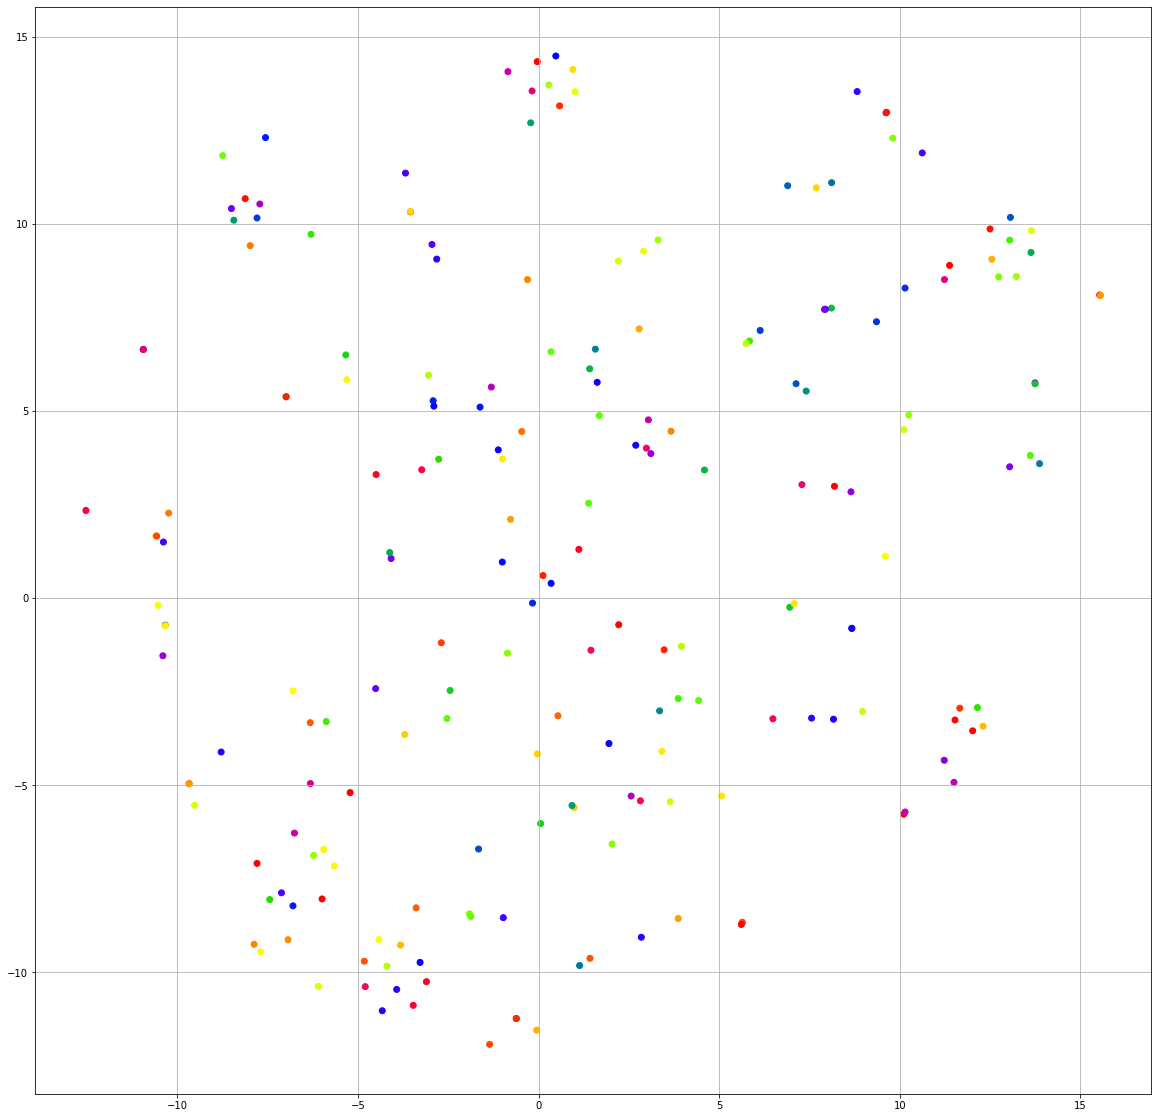

In [ ]:
figure(figsize=(20, 20))
scatter(W_e[:, 0], W_e[:, 1], c=colors, cmap=cm.prism)
#for i, c in enumerate(colors):
#    annotate(str(c), (tsne_embed_features[i, 0], tsne_embed_features[i, 1]))
grid()

In [ ]:
W_e.shape

(206, 2)

In [ ]:
W_e_n = W_e / np.sqrt(np.sum(np.square(W_e), axis=1, keepdims=True))

In [ ]:
W_e_n.shape

(206, 2)

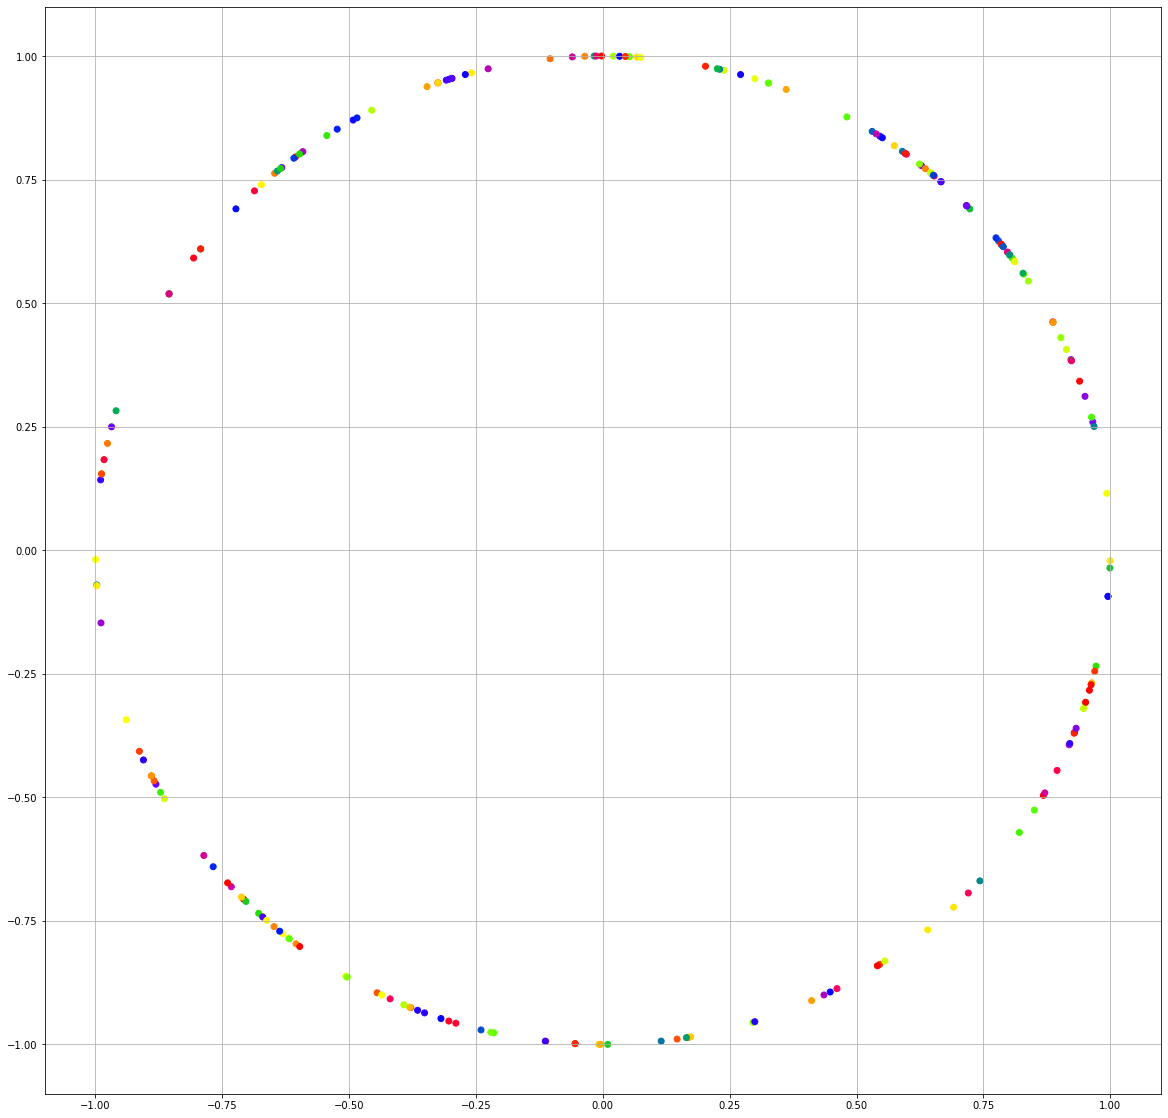

In [ ]:
figure(figsize=(20, 20))
scatter(W_e_n[:, 0], W_e_n[:, 1], c=colors, cmap=cm.prism)
#for i, c in enumerate(colors):
#    annotate(str(c), (tsne_embed_features[i, 0], tsne_embed_features[i, 1]))
grid()

In [ ]:
from sklearn.decomposition import PCA
W_e = PCA(n_components=2).fit_transform(W)

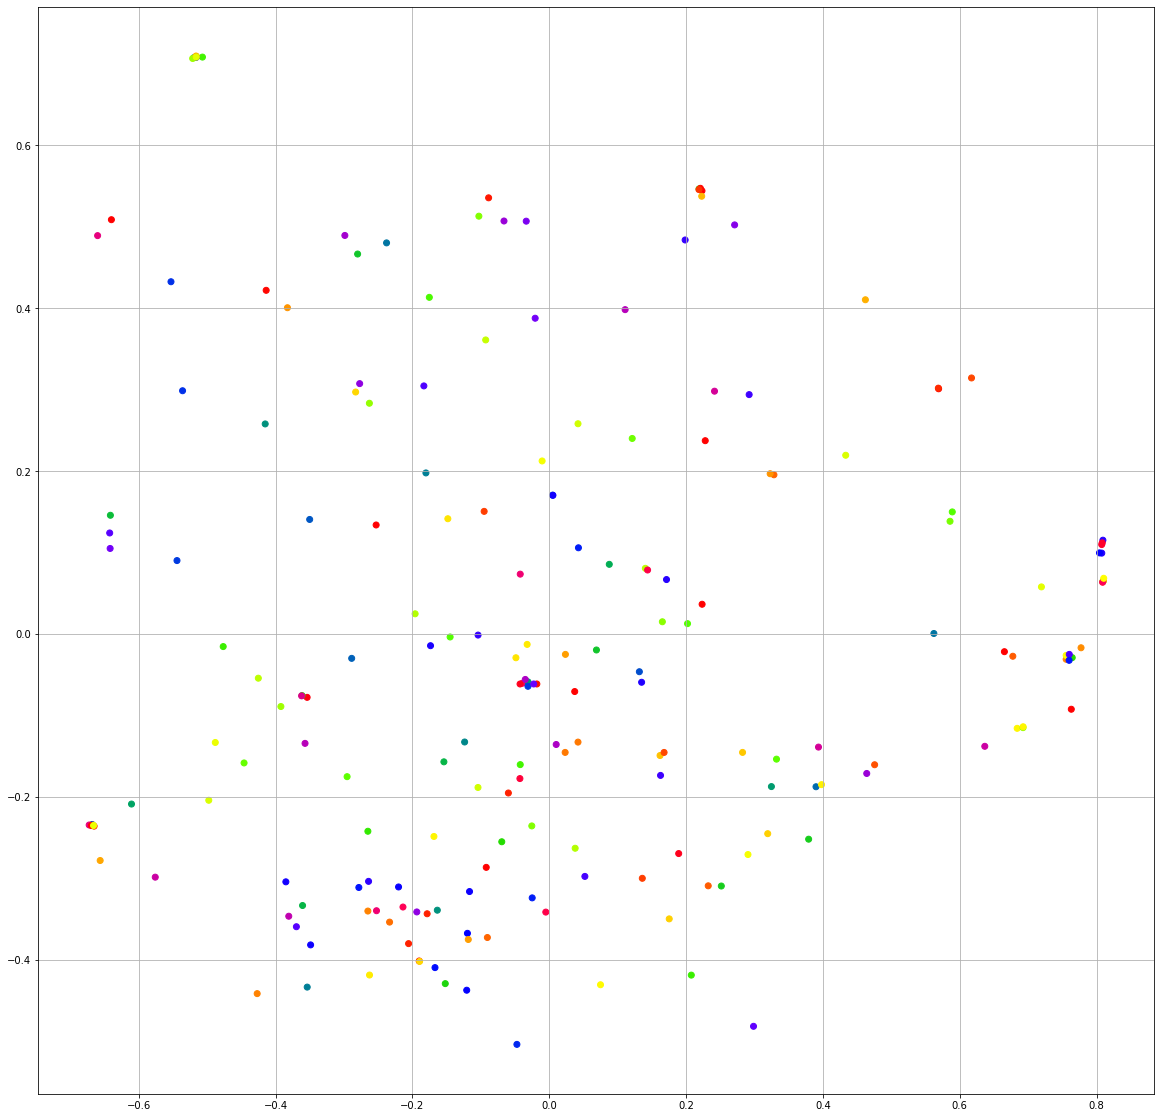

In [ ]:
figure(figsize=(20, 20))
scatter(W_e[:, 0], W_e[:, 1], c=colors, cmap=cm.prism)
#for i, c in enumerate(colors):
#    annotate(str(c), (tsne_embed_features[i, 0], tsne_embed_features[i, 1]))
grid()

In [ ]:
W_e_n = W_e / np.sqrt(np.sum(np.square(W_e), axis=1, keepdims=True))

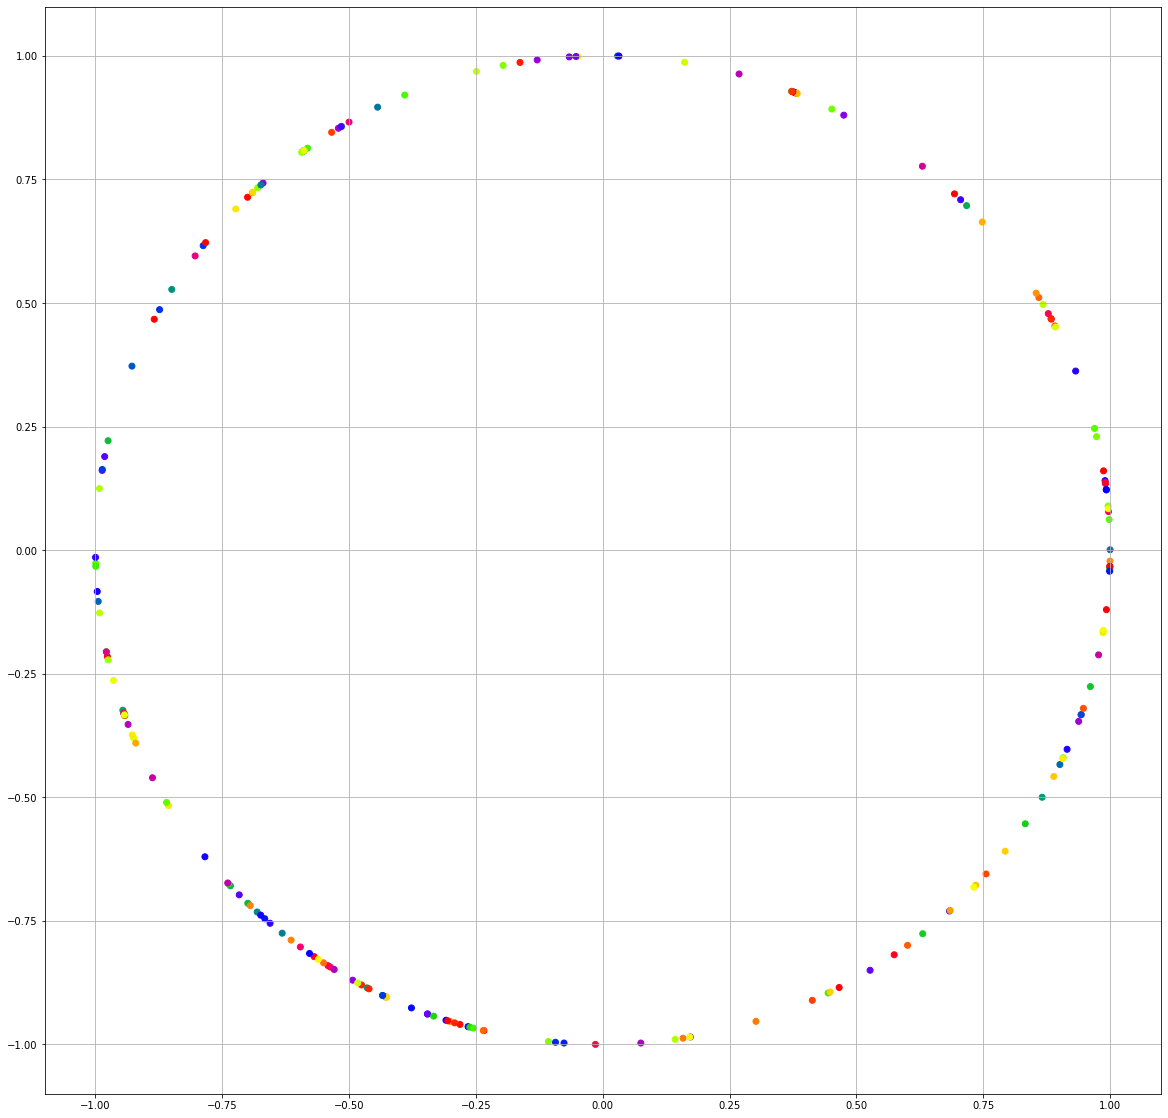

In [ ]:
figure(figsize=(20, 20))
scatter(W_e_n[:, 0], W_e_n[:, 1], c=colors[:], cmap=cm.prism)
#for i, c in enumerate(colors):
#    annotate(str(c), (tsne_embed_features[i, 0], tsne_embed_features[i, 1]))
grid()

In [ ]:
input_df = pd.read_csv(os.path.join(raw_data_path, 'train_features.csv')) #.iloc[:1024]
input_df.cp_type = input_df.cp_type.astype('category')
input_df.cp_type = input_df.cp_type.cat.rename_categories(range(len(input_df.cp_type.cat.categories)))
input_df.cp_time = input_df.cp_time.astype('category')
input_df.cp_time = input_df.cp_time.cat.rename_categories(range(len(input_df.cp_time.cat.categories)))
input_df.cp_dose = input_df.cp_dose.astype('category')
input_df.cp_dose = input_df.cp_dose.cat.rename_categories(range(len(input_df.cp_dose.cat.categories)))

# Remove samples of ctl_vehicle.
valid_indexes = input_df.cp_type == 1
input_df = input_df[valid_indexes]

target_scored_df = pd.read_csv(os.path.join(raw_data_path, 'train_targets_scored.csv')) #.iloc[:1024]
target_scored_df = target_scored_df[valid_indexes]

target_nonscored_df = pd.read_csv(os.path.join(raw_data_path, 'train_targets_nonscored.csv')) #.iloc[:1024]
target_nonscored_df = target_nonscored_df[valid_indexes]

target_df = pd.concat([target_scored_df, target_nonscored_df.iloc[:, 1:]], axis=1)
target_df = target_scored_df
del target_df['sig_id']
target_df.columns = range(len(target_df.columns))


def make_input_features(inputs):
    # Treatment.
    cp_time = inputs['cp_time']
    cp_dose = inputs['cp_dose']

    treatment_type = cp_time * 2 + cp_dose

    # Gene expression.
    gene_exps = [inputs['g-' + str(v)] for v in range(model.nn_arch['d_gene_exp'])]
    gene_exps = tf.stack(gene_exps, axis=0)

    # Cell viability.
    cell_vs = [inputs['c-' + str(v)] for v in range(model.nn_arch['d_cell_type'])]
    cell_vs = tf.stack(cell_vs, axis=0)

    return (tf.expand_dims(treatment_type, axis=-1), gene_exps, cell_vs)

# Training dataset.
tr_dataset = tf.data.Dataset.from_tensor_slices(input_df.to_dict('list'))
tr_dataset = tr_dataset.map(make_input_features)

tr_iter = tr_dataset.as_numpy_iterator()

In [ ]:
moap = model.model.get_layer('moap')
embed_feature_dicts = []

for i, d in tqdm(enumerate(tr_iter)):
    t, g, c = d
    id_ = input_df['sig_id'].iloc[i]
    t = np.expand_dims(t, axis=0)
    g = np.expand_dims(g, axis=0)
    c = np.expand_dims(c, axis=0)

    # First layers.
    t = moap.embed_treatment_type_0(t)
    t = tf.reshape(t, (-1, model.nn_arch['d_input_feature']))
    t = moap.dense_treatment_type_0(t)

    t = moap.layer_normalization_0_1(t)
    g = moap.layer_normalization_0_2(g)
    c = moap.layer_normalization_0_3(c)

    # Gene expression.
    g_e = moap.encoder_gene_exp_1(g)
    x_g = moap.decoder_gene_exp_1(g_e)
    x_g = tf.expand_dims(x_g, axis=-1)
    for i in range(model.nn_arch['num_transformer']):
        x_g = moap.transformer_gene_exps[i]([x_g, x_g]) #?
    x_g = tf.squeeze(x_g, axis=-1)

    # Cell type.
    c_e = moap.encoder_cell_type_2(c)
    x_c = moap.decoder_cell_type_2(c_e)
    x_c = moap.dropout_2(x_c)

    # Skip-connection autoencoder and final layers.
    x = tf.concat([t, g_e, c_e], axis=-1)
    for i in range(model.nn_arch['num_sc_ae']):
        x = moap.sc_aes[i](x)
        x = moap.dropout_3(x)

    # Final layers.
    x = moap.dense_4_1(x)
    x = moap.dense_4_2(x)
    x = moap.dense_4_3(x)

    # Normalize x.
    x = x / tf.sqrt(tf.reduce_sum(tf.square(x), axis=1, keepdims=True))
    
    # Get embed_feature_dict.
    embed_feature_dict = {}
    embed_feature_dict['sig_id'] = id_
    embed_feature_dict['embed_feature'] = x.numpy().ravel()
    series = target_df.iloc[i]
    df = series[series == 1].to_frame()
    embed_feature_dict['MoA_classes'] = list(df.index)
    
    embed_feature_dicts.append(embed_feature_dict)

21948it [06:14, 58.60it/s]


In [ ]:
embed_features = np.array([v['embed_feature'] for v in embed_feature_dicts])
embed_features.shape

(21948, 128)

In [ ]:
tsne_embed_features = TSNE(n_components=2).fit_transform(embed_features)

In [ ]:
classes = [v['MoA_classes'] for v in embed_feature_dicts]
for i in tqdm(range(len(classes))):
    if len(classes[i]) == 0:
        classes[i] = [0]
classes

100%|███████████████████████████████████████████████████████████| 21948/21948 [00:00<00:00, 422088.16it/s]


[[101],
 [0],
 [48, 119, 149],
 [0],
 [54],
 [101],
 [0],
 [63],
 [0],
 [150],
 [173],
 [79, 93],
 [135],
 [77],
 [0],
 [162],
 [136, 163],
 [103],
 [38, 48, 89, 118],
 [77],
 [176],
 [3, 93],
 [159],
 [48],
 [96],
 [71, 161],
 [176],
 [77],
 [103],
 [0],
 [0],
 [159],
 [0],
 [149],
 [0],
 [0],
 [32],
 [0],
 [71],
 [177],
 [0],
 [0],
 [105],
 [0],
 [80],
 [0],
 [0],
 [173],
 [153],
 [0],
 [182],
 [96],
 [80],
 [89, 119, 149],
 [88],
 [72],
 [4],
 [42],
 [3],
 [78, 177],
 [194],
 [0],
 [31],
 [0],
 [0],
 [10],
 [144],
 [0],
 [172],
 [49],
 [109],
 [136, 163],
 [99],
 [71],
 [54],
 [79],
 [0],
 [169],
 [74],
 [67],
 [63],
 [71],
 [33],
 [71, 162],
 [0],
 [72],
 [103],
 [87],
 [0],
 [77],
 [0],
 [0],
 [182],
 [0],
 [96],
 [0],
 [0],
 [80],
 [0],
 [58],
 [129],
 [21],
 [0],
 [68],
 [21],
 [40],
 [10],
 [0],
 [140],
 [0],
 [0],
 [136, 163],
 [99],
 [0],
 [0],
 [83],
 [176],
 [99],
 [0],
 [30],
 [114],
 [199],
 [52],
 [99],
 [61],
 [0],
 [0],
 [0],
 [80],
 [0],
 [156],
 [111],
 [0],
 [0],
 [

In [ ]:
colors = [v[0] for v in classes]

In [ ]:
for i in tqdm(range(len(classes))):
    if classes[i][0] == 136:
        print(classes[i])

100%|███████████████████████████████████████████████████████████| 21948/21948 [00:00<00:00, 141598.72it/s]

[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136]
[136, 163]
[136, 163]
[136]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136]
[136, 163]
[136, 163]
[136, 142]
[136, 163]
[136, 163]
[136]
[136, 163]
[136]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136]
[136]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 142]
[136]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 163]
[136, 

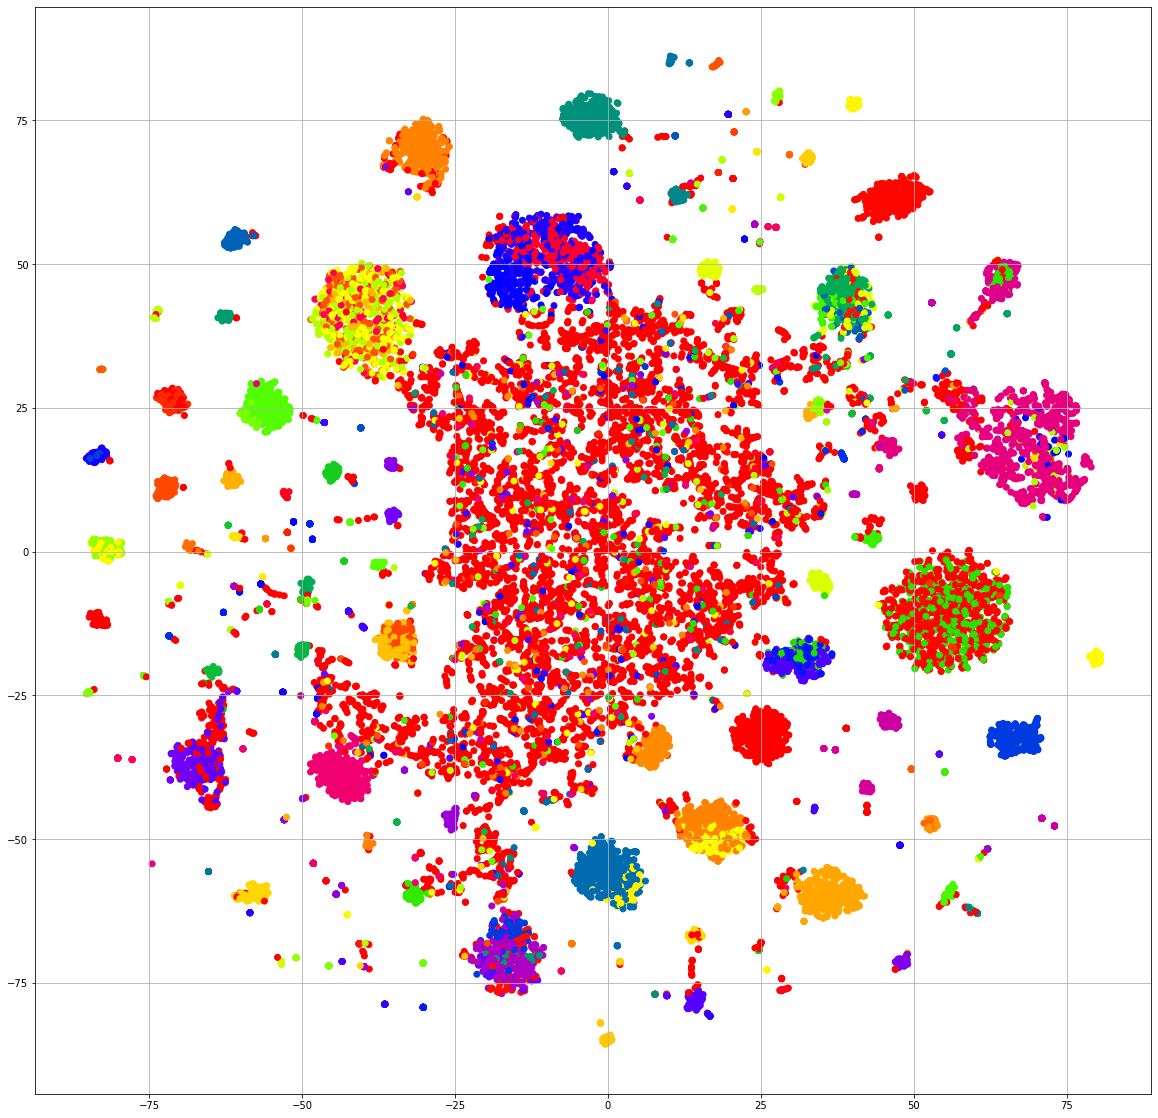

In [ ]:
figure(figsize=(20, 20))
scatter(tsne_embed_features[:, 0], tsne_embed_features[:, 1], c=colors, cmap=cm.prism)
#for i, c in enumerate(colors):
#    annotate(str(c), (tsne_embed_features[i, 0], tsne_embed_features[i, 1]))
grid()

In [ ]:
tsne_embed_features_n = tsne_embed_features / np.sqrt(np.sum(np.square(tsne_embed_features), axis=1, keepdims=True))

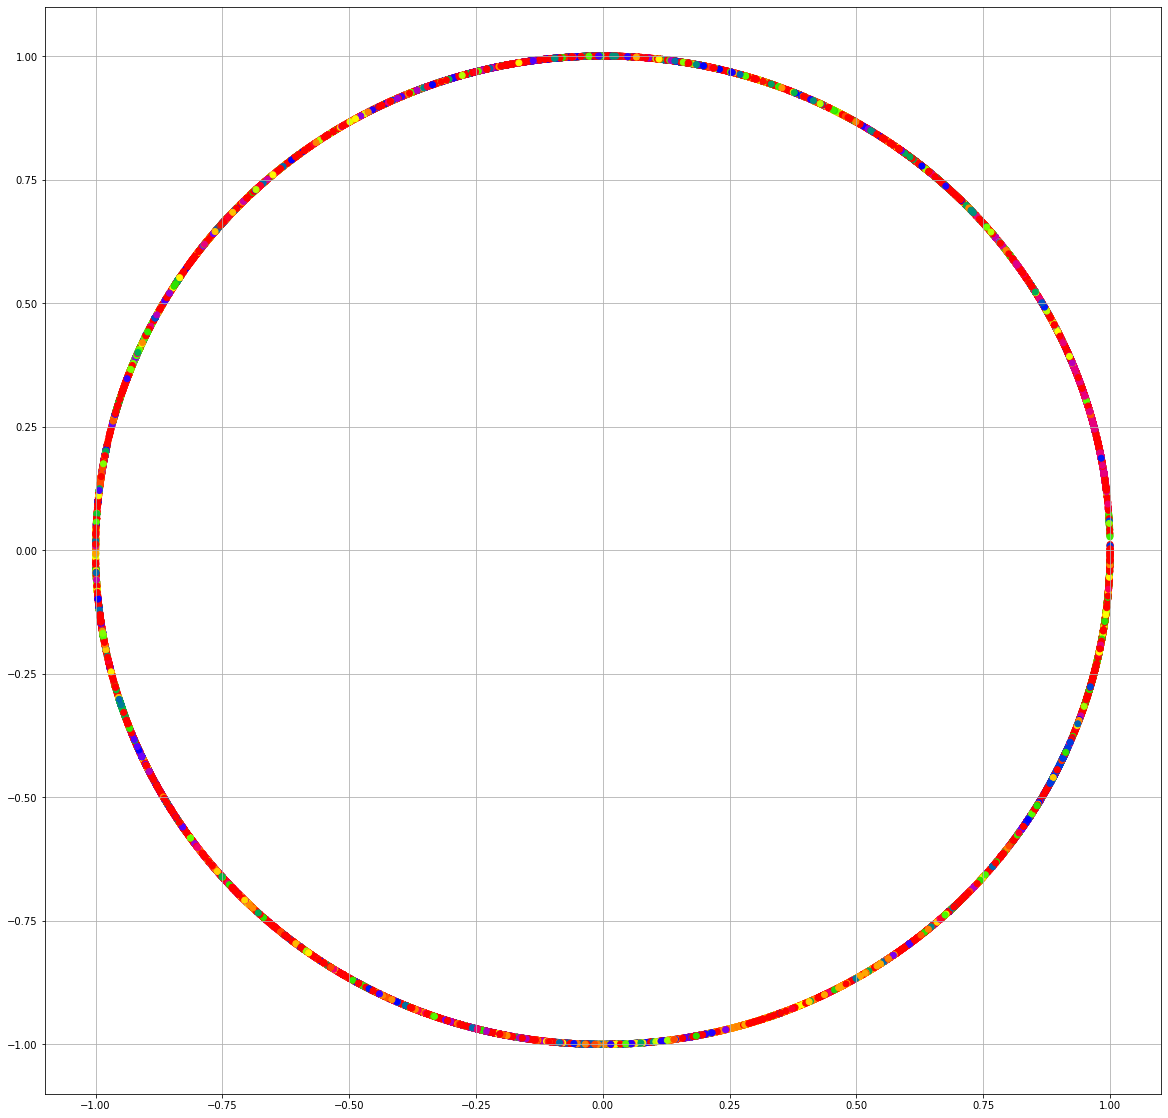

In [ ]:
figure(figsize=(20, 20))
scatter(tsne_embed_features_n[:, 0], tsne_embed_features_n[:, 1], c=colors, cmap=cm.prism)
#for i, c in enumerate(colors):
#    annotate(str(c), (tsne_embed_features[i, 0], tsne_embed_features[i, 1]))
grid()

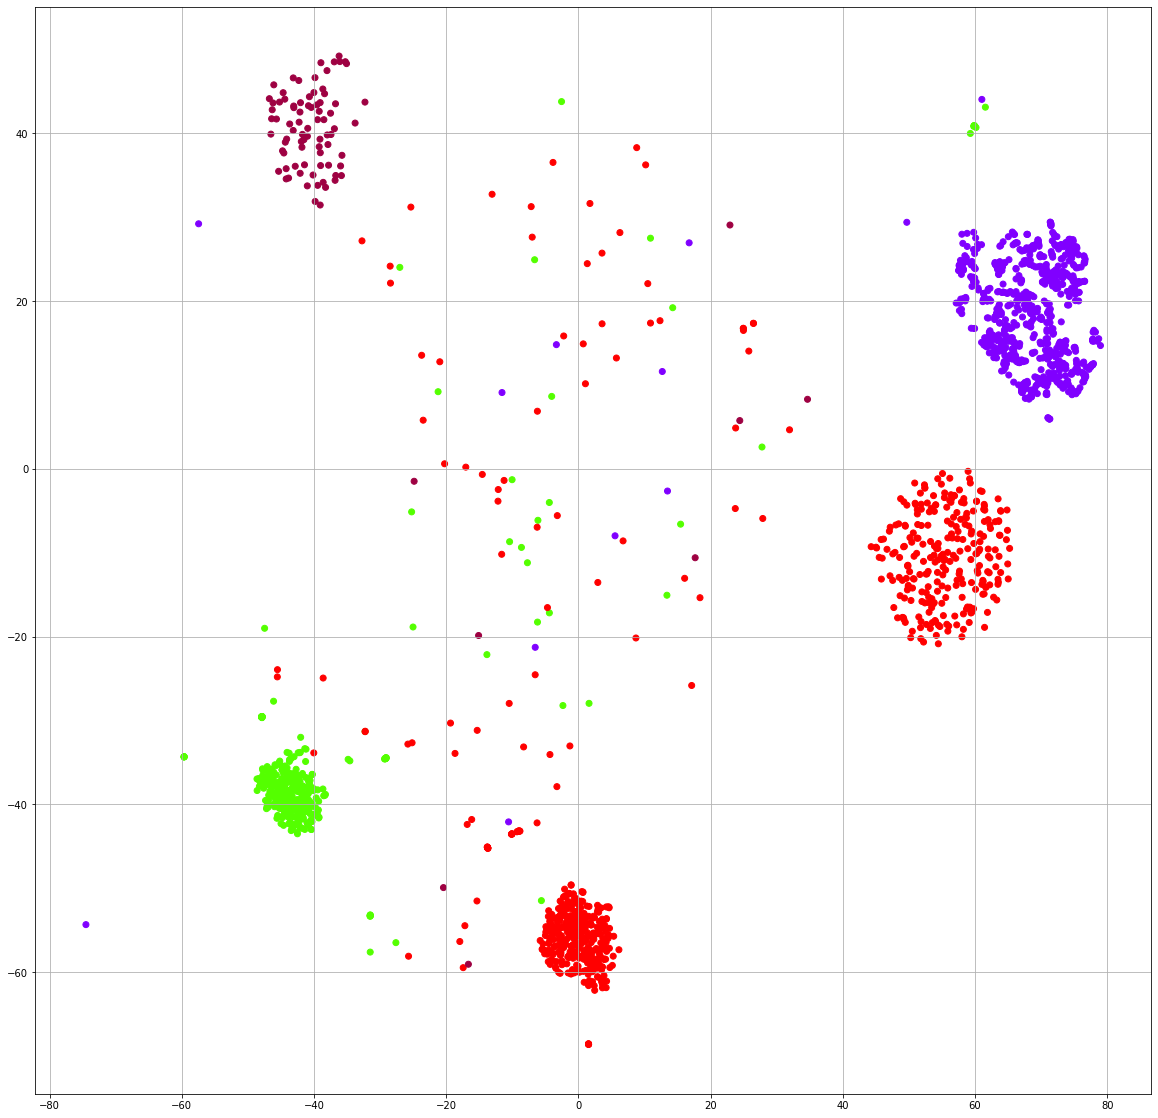

In [ ]:
figure(figsize=(20, 20))
color = 0

idxes = []
for i, v in enumerate(colors):
    if v == 77:
        idxes.append(i)

scatter(tsne_embed_features[idxes, 0], tsne_embed_features[idxes, 1], c=np.repeat(color, len(idxes)), cmap=cm.prism_r)

color += 10

idxes = []
for i, v in enumerate(colors):
    if v == 177:
        idxes.append(i)

scatter(tsne_embed_features[idxes, 0], tsne_embed_features[idxes, 1], c=np.repeat(color, len(idxes)), cmap=cm.prism)

color += 10

idxes = []
for i, v in enumerate(colors):
    if v == 44:
        idxes.append(i)

scatter(tsne_embed_features[idxes, 0], tsne_embed_features[idxes, 1], c=np.repeat(color, len(idxes)), cmap=cm.Spectral)

color += 100

idxes = []
for i, v in enumerate(colors):
    if v == 136:
        idxes.append(i)

scatter(tsne_embed_features[idxes, 0], tsne_embed_features[idxes, 1], c=np.repeat(color, len(idxes)), cmap=cm.rainbow)

color += 10

idxes = []
for i, v in enumerate(colors):
    if v == 71:
        idxes.append(i)

scatter(tsne_embed_features[idxes, 0], tsne_embed_features[idxes, 1], c=np.repeat(color, len(idxes)), cmap=cm.rainbow_r)

color += 10

grid()

100%|██████████████████████████████████████████████████████████| 21948/21948 [00:00<00:00, 1289091.25it/s]


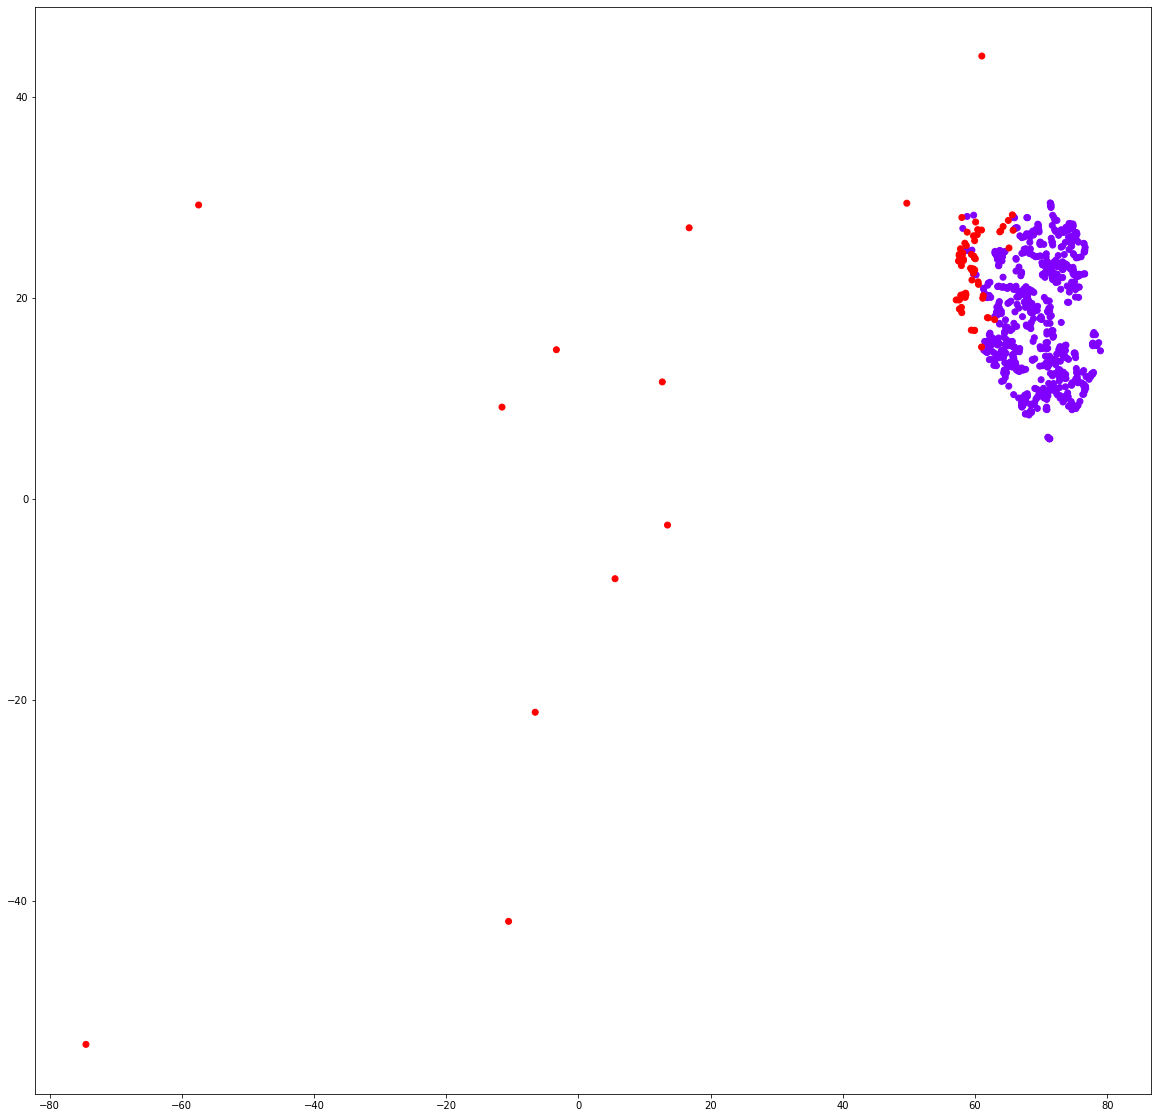

In [ ]:
figure(figsize=(20, 20))
color = 0

idxes_1 = []
idxes_2 = []
for i in tqdm(range(len(classes))):
    if len(classes[i]) == 2 and classes[i][0] == 136:
        idxes_1.append(i)
    elif len(classes[i]) == 1 and classes[i][0] == 136:
        idxes_2.append(i)

scatter(tsne_embed_features[idxes_1, 0], tsne_embed_features[idxes_1, 1], c=np.repeat(color, len(idxes_1)), cmap=cm.rainbow)
scatter(tsne_embed_features[idxes_2, 0], tsne_embed_features[idxes_2, 1], c=np.repeat(color, len(idxes_2)), cmap=cm.rainbow_r)

100%|██████████████████████████████████████████████████████████| 21948/21948 [00:00<00:00, 1291442.22it/s]


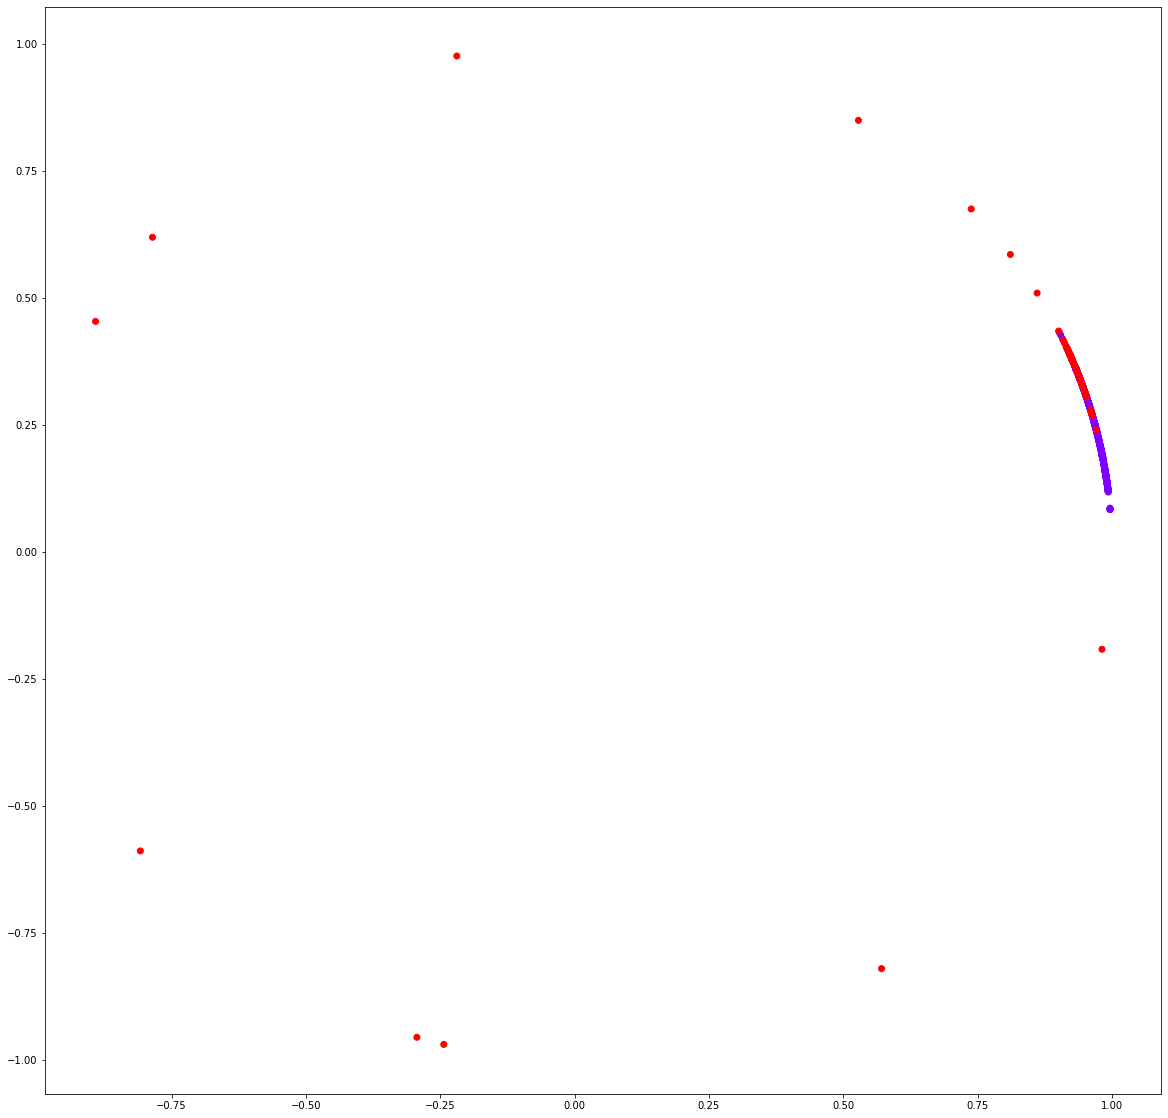

In [ ]:
figure(figsize=(20, 20))
color = 0

idxes_1 = []
idxes_2 = []
for i in tqdm(range(len(classes))):
    if len(classes[i]) == 2 and classes[i][0] == 136:
        idxes_1.append(i)
    elif len(classes[i]) == 1 and classes[i][0] == 136:
        idxes_2.append(i)

scatter(tsne_embed_features_n[idxes_1, 0], tsne_embed_features_n[idxes_1, 1], c=np.repeat(color, len(idxes_1)), cmap=cm.rainbow)
scatter(tsne_embed_features_n[idxes_2, 0], tsne_embed_features_n[idxes_2, 1], c=np.repeat(color, len(idxes_2)), cmap=cm.rainbow_r)

In [ ]:
ts = time.time()
model.evaluate()
te = time.time()

print('Elasped time: {0:f}s'.format(te - ts))

21948it [20:53, 17.50it/s]


Elasped time: 1361.333700s


In [ ]:
gt_df = pd.read_csv('gt.csv')
s_df = pd.read_csv('submission.csv')

In [ ]:
target_scored_df_sum = target_scored_df.sum()

In [ ]:
res = target_scored_df_sum.values
res.shape

(206,)

In [ ]:
res

array([ 17,  18,  24, 190, 301,  73,  54,  96,  12, 270, 360,  66,   7,
        42,  12,  12,  48,  89,  80,  36,  37,  73,   6,  43,  12,  13,
        12,  18,  73,  36,  23,  49,  47,   6,   1,  12,  97,  19,  96,
         6,  60,  80,  36, 192,  89, 115,   7,  31,  38,  67,  24,  68,
        29,   6, 281,  42,  55,  36,  36,  18,  12, 102,  18, 340,  54,
        24,  42,  48,  54,   6,  36, 435, 104,  36,  25,   6,  48, 402,
       121, 424, 336,   6,   1, 158,  48,  36,  18,  25,  50, 279,  18,
        18,  23, 106, 165,  56, 266,  13,  74, 367,  18,  60,  72, 106,
        59, 241,  24,  32,  72, 283,  93,  37,  30,  31,  73,  30,  51,
        42,  92, 273,   6,   6,  62,  12,  61,   6,  31,  72,  74,  25,
        12,  85,  18, 130,  48,  37, 832,   6,  26,  12,  26,   7,  18,
        61,  96,  37,  62,  24,  61, 297,  18, 264,  25, 151,  31,  55,
        98, 115,  30, 119,  18,  36,  84, 726,  48,   6, 103,  19,  56,
       223,  12,  67,   6,  35,  37,  25, 236, 404,  44,  36,  3

In [ ]:
def scaled_sigmoid(x, m1=1.0, m2=0.0):
    return 1.0 / (1.0 + np.exp(-1.0 *(x * m1 + m2)))

In [ ]:
i = -1

0


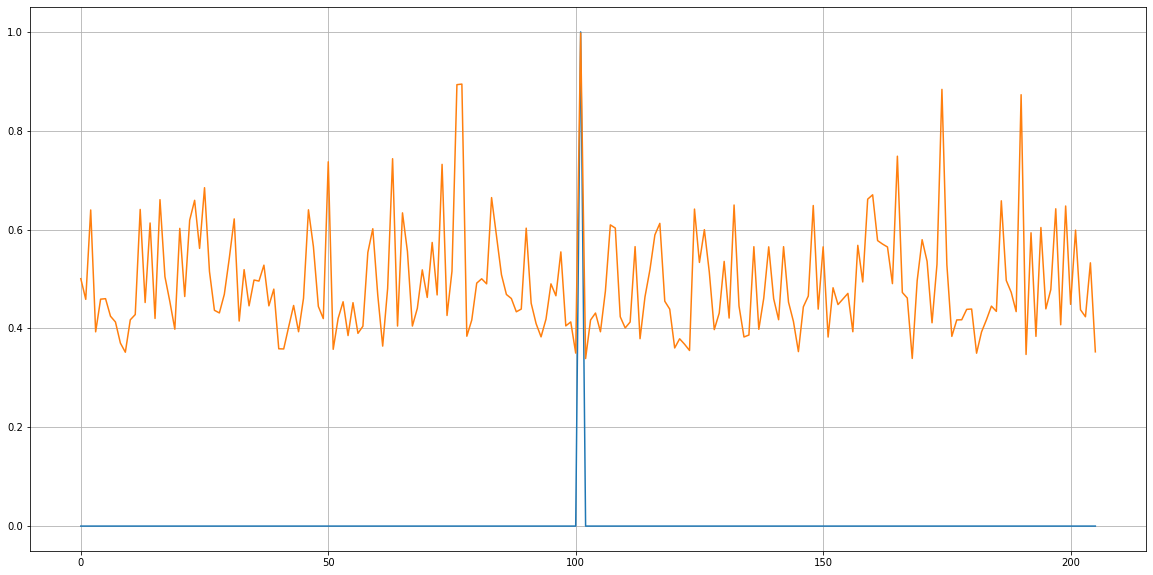

In [ ]:
i = i + 1
fig = figure(figsize=(20, 10))
plot(gt_df.iloc[i, 1:].values)
plot((s_df.iloc[i, 1:].values + 1.0) / 2.0)
#plot(target_scored_df_sum.values / target_scored_df_sum.values.max())
#ylim(0.0, 0.1)
grid()
print(i)
#close()

In [ ]:
p = gt_df.iloc[:, 1:].values
p_h = (s_df.iloc[:, 1:].values + 1.0) / 2.0
p_m = np.squeeze(np.sum(p * p_h, axis=0, keepdims=True) / (np.sum(p, axis=0, keepdims=True)), axis=0)

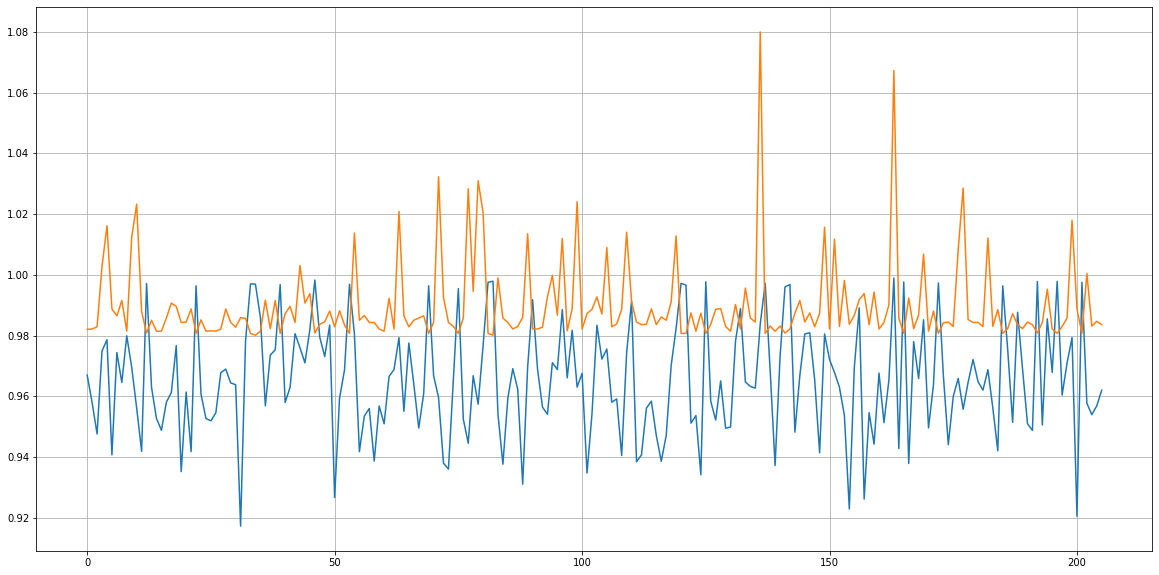

In [ ]:
figure(figsize=(20, 10))
plot(p_m)
plot(target_scored_df_sum.values / target_scored_df_sum.values.max() / 10.0 + 0.98)
grid()

In [ ]:
p_h = (s_df.iloc[:, 1:].values + 1.0) / 2.0
p_h_m = np.mean(p, axis=0)

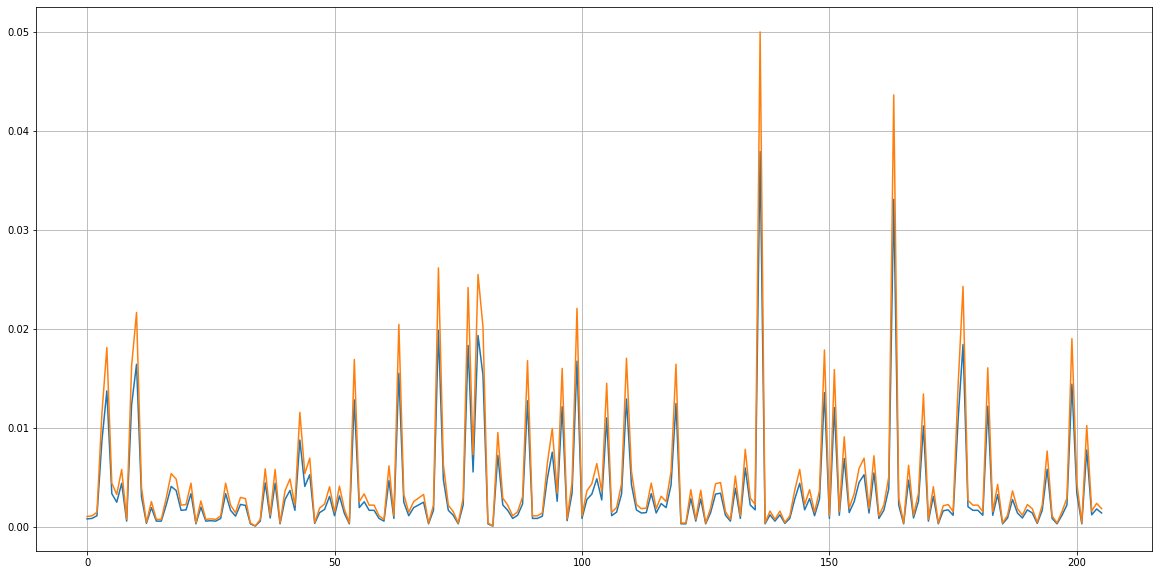

In [ ]:
figure(figsize=(20, 10))
plot(p_h_m)
plot(target_scored_df_sum.values / target_scored_df_sum.values.max() / 20.0)
grid()

In [ ]:
!RMDIR /S /Q results
!MKDIR results

In [ ]:
import gc

In [ ]:
gc.collect()

2989981

In [ ]:
for i in tqdm(range(len(gt_df))):
    if i % 20 != 0:
        continue
    fig = figure(figsize=(20, 10))
    plot(gt_df.iloc[i, 1:].values)
    plot((s_df.iloc[i, 1:].values + 1.0) / 2.0)
    grid()
    savefig(f'./results/sample{i}.jpg')
    close(fig)
    del fig


100%|██████████████████████████████████████████████████████████████| 21948/21948 [02:24<00:00, 152.11it/s]


In [ ]:
a = s_df.iloc[i, 1:].values

In [ ]:
a.shape, type(a)

((206,), numpy.ndarray)

In [ ]:
np.mean(a, axis=-1, keepdims=True)

array([-0.0686108733355565], dtype=object)

In [ ]:
a = a.astype('float32')

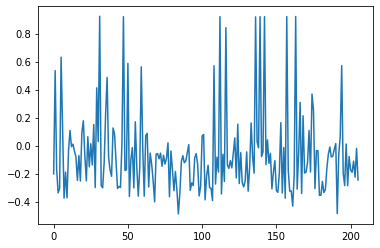

In [ ]:
plot(a)

In [ ]:
a = (a + 1.0) / 2.0

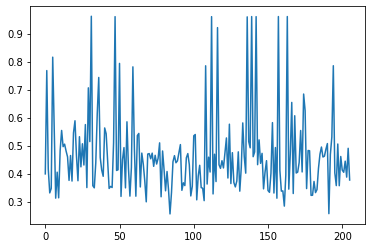

In [ ]:
plot(a)

In [ ]:
a[a <= 0.7] = 0.0

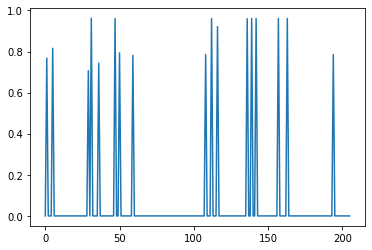

In [ ]:
plot(a)

In [ ]:
class MoAsProbCal(tf.keras.Model):
    def __init__(self, th=0.6):
        super(MoAsProbCal, self).__init__()
        self.th = th
        self.W_m1 = tf.Variable(20.709097, name='m1')
        self.W_m2 = tf.Variable(-22.486975, name='m2')
        self.epsilon = 1e-7

    def call(self, inputs):
        A = inputs
        A = (A + 1.0) / 2.0
        A = tf.where(tf.math.greater(A, self.th), A, 0.0)
        A = self.W_m1 * A + self.W_m2
        P_h = tf.sigmoid(A)
        return P_h

In [ ]:
opt = optimizers.Adam(lr=model.hps['lr']
                                      , beta_1=model.hps['beta_1']
                                      , beta_2=model.hps['beta_2']
                                      , decay=model.hps['decay'])

In [ ]:
def MoA_metric(y_true, y_pred):
    #y_pred = tf.maximum(tf.minimum(p_hat, 1.0 - 1e-15), 1e-15)
    y_true = tf.cast(y_true, dtype=tf.float32)

    log_loss = -1.0 * (y_true * tf.math.log(y_pred + epsilon) + (1.0 - y_true) * tf.math.log(1.0 - y_pred + epsilon))
    log_loss_mean = tf.reduce_mean(log_loss, axis=0) #?
    loss = tf.reduce_mean(log_loss_mean, axis=0)
    return loss

MoA_metric.__name__ = 'MoA_metric'

In [ ]:
pcal = MoAsProbCal(th=0.8)

In [ ]:
disim = s_df.iloc[:, 1:].values
disim = disim.astype('float32')
gt = gt_df.iloc[:, 1:].values
gt = gt.astype('float32')

In [ ]:
p_h = pcal(disim[:])

In [ ]:
sub_df = pd.read_csv('submission.csv')
sub_df

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0     id_0004d9e33                          0.0                     0.0   
1     id_001897cda                          0.0                     0.0   
2     id_002429b5b                          0.0                     0.0   
3     id_00276f245                          0.0                     0.0   
4     id_0027f1083                          0.0                     0.0   
...            ...                          ...                     ...   
3977  id_ff7004b87                          0.0                     0.0   
3978  id_ff925dd0d                          0.0                     0.0   
3979  id_ffb710450                          0.0                     0.0   
3980  id_ffbb869f2                          0.0                     0.0   
3981  id_ffd5800b6                          0.0                     0.0   

      acat_inhibitor  acetylcholine_receptor_agonist  \
0                0.0                             0.0   
1                0.0                             0.0   
2                0.0                             0.0   
3                0.0                             0.0   
4                0.0                             0.0   
...              ...                             ...   
3977             0.0                             0.0   
3978             0.0                             0.0   
3979             0.0                             0.0   
3980             0.0                             0.0   
3981             0.0                             0.0   

      acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                   0.0                             0.0   
1                                   0.0                             0.0   
2                                   0.0                             0.0   
3                                   0.0                             0.0   
4                                   0.0                             0.0   
...                                 ...                             ...   
3977                                0.0                             0.0   
3978                                0.0                             0.0   
3979                                0.0                             0.0   
3980                                0.0                             0.0   
3981                                0.0                             0.0   

      adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                            0.0                            0.0   
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            0.0   
4                            0.0                            0.0   
...                          ...                            ...   
3977                         0.0                            0.0   
3978                         0.0                            0.0   
3979                         0.0                            0.0   
3980                         0.0                            0.0   
3981                         0.0                            0.0   

      adenylyl_cyclase_activator  ...  tropomyosin_receptor_kinase_inhibitor  \
0                            0.0  ...                                    0.0   
1                            0.0  ...                                    0.0   
2                            0.0  ...                                    0.0   
3                            0.0  ...                                    0.0   
4                            0.0  ...                                    0.0   
...                          ...  ...                                    ...   
3977                         0.0  ...                                    0.0   
3978                         0.0  ...                                    0.0   
3979        

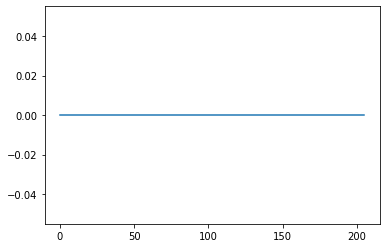

In [ ]:
res = sub_df.iloc[:,1:].values
plot(res[10])

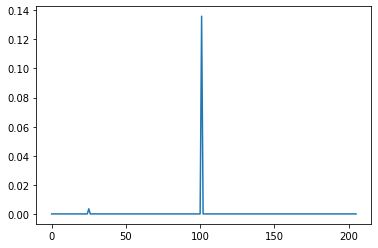

In [ ]:
plot(p_h[0])

In [ ]:
loss = MoA_metric(gt[:], pcal(disim[:]))
print(loss)

tf.Tensor(0.011697099, shape=(), dtype=float32)


In [ ]:
disim = s_df.iloc[:, 1:].values
disim = disim.astype('float32')
gt = gt_df.iloc[:, 1:].values
gt = gt.astype('float32')
p_dataset = tf.data.Dataset.from_tensor_slices((disim, gt)).shuffle(1000).batch(32)

reduce_lr = ReduceLROnPlateau(monitor='loss'
                              , factor=model.hps['reduce_lr_factor']
                              , patience=10
                              , min_lr=1.e-8
                              , verbose=1)

input1 = Input(shape=(206), dtype='float32')
pcal = MoAsProbCal(th=0.8)
output = pcal(input1)
model_1 = Model(inputs=input1, outputs=output)
model_1.compile(optimizer=opt, loss=MoA_metric)

model_1.fit(p_dataset, epochs=1024, callbacks=[reduce_lr])

Epoch 1/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.6545
Epoch 2/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.4491
Epoch 3/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.2724
Epoch 4/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.1605
Epoch 5/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0984
Epoch 6/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0657
Epoch 7/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0483
Epoch 8/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0386
Epoch 9/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0326
Epoch 10/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0284
Epoch 11/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0251
Epoch 12/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0225
E

686/686 [==============================] - 1s 1ms/step - loss: 0.0127
Epoch 94/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0127
Epoch 95/1024
686/686 [==============================] - 1s 2ms/step - loss: 0.0127
Epoch 96/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0126
Epoch 97/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0126
Epoch 98/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0126
Epoch 99/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0126
Epoch 100/1024
675/686 [============================>.] - ETA: 0s - loss: 0.0126
Epoch 00100: ReduceLROnPlateau reducing learning rate to 0.000849346574395895.
686/686 [==============================] - 1s 1ms/step - loss: 0.0126
Epoch 101/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0126
Epoch 102/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0126
Epoch 103/1024
686/686 [==

Epoch 178/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0123
Epoch 179/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0123
Epoch 180/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0123
Epoch 181/1024
686/686 [==============================] - 3s 5ms/step - loss: 0.0123
Epoch 182/1024
686/686 [==============================] - 1s 2ms/step - loss: 0.0123
Epoch 183/1024
686/686 [==============================] - 1s 2ms/step - loss: 0.0123
Epoch 184/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0123
Epoch 185/1024
686/686 [==============================] - 1s 2ms/step - loss: 0.0123
Epoch 186/1024
686/686 [==============================] - 1s 2ms/step - loss: 0.0123
Epoch 187/1024
639/686 [==========================>...] - ETA: 0s - loss: 0.0123
Epoch 00187: ReduceLROnPlateau reducing learning rate to 0.0006382392905652523.
686/686 [==============================] - 1s 1ms/step - loss: 0.0123
Epoc

Epoch 263/1024
686/686 [==============================] - 1s 2ms/step - loss: 0.0121
Epoch 264/1024
686/686 [==============================] - 2s 3ms/step - loss: 0.0121
Epoch 265/1024
686/686 [==============================] - 2s 3ms/step - loss: 0.0121
Epoch 266/1024
686/686 [==============================] - 2s 3ms/step - loss: 0.0121
Epoch 267/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0121
Epoch 268/1024
686/686 [==============================] - 1s 2ms/step - loss: 0.0121
Epoch 269/1024
686/686 [==============================] - 1s 2ms/step - loss: 0.0121
Epoch 270/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0121
Epoch 271/1024
686/686 [==============================] - 1s 2ms/step - loss: 0.0121
Epoch 272/1024
672/686 [============================>.] - ETA: 0s - loss: 0.0121
Epoch 00272: ReduceLROnPlateau reducing learning rate to 0.0004796032793819904.
686/686 [==============================] - 1s 2ms/step - loss: 0.0121
Epoc

686/686 [==============================] - 1s 1ms/step - loss: 0.0120
Epoch 348/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0120
Epoch 349/1024
686/686 [==============================] - 1s 2ms/step - loss: 0.0120
Epoch 350/1024
643/686 [===========================>..] - ETA: 0s - loss: 0.0120
Epoch 00350: ReduceLROnPlateau reducing learning rate to 0.00036039669066667557.
686/686 [==============================] - 1s 1ms/step - loss: 0.0120
Epoch 351/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0120
Epoch 352/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0120
Epoch 353/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0120
Epoch 354/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0120
Epoch 355/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0120
Epoch 356/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0120
Epoch 357/1024
686

686/686 [==============================] - 1s 1ms/step - loss: 0.0119
Epoch 430/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0119
Epoch 431/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0119
Epoch 432/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0119
Epoch 433/1024
648/686 [===========================>..] - ETA: 0s - loss: 0.0119
Epoch 00433: ReduceLROnPlateau reducing learning rate to 0.0002599864359945059.
686/686 [==============================] - 1s 1ms/step - loss: 0.0119
Epoch 434/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0119
Epoch 435/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0119
Epoch 436/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0119
Epoch 437/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0119
Epoch 438/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0119
Epoch 439/1024
686/

686/686 [==============================] - 1s 1ms/step - loss: 0.0118
Epoch 512/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0118
Epoch 513/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0118
Epoch 514/1024
686/686 [==============================] - ETA: 0s - loss: 0.011 - 1s 1ms/step - loss: 0.0118
Epoch 515/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0118
Epoch 516/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0118
Epoch 517/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0118
Epoch 518/1024
661/686 [===========================>..] - ETA: 0s - loss: 0.0118
Epoch 00518: ReduceLROnPlateau reducing learning rate to 0.00018755150958895683.
686/686 [==============================] - 1s 1ms/step - loss: 0.0118
Epoch 519/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0118
Epoch 520/1024
686/686 [==============================] - 1s 1ms/step - loss: 0

686/686 [==============================] - 1s 1ms/step - loss: 0.0118
Epoch 594/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0118
Epoch 595/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0118
Epoch 596/1024
686/686 [==============================] - 1s 2ms/step - loss: 0.0118
Epoch 597/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0118
Epoch 598/1024
675/686 [============================>.] - ETA: 0s - loss: 0.0118
Epoch 00598: ReduceLROnPlateau reducing learning rate to 0.00013529770541936158.
686/686 [==============================] - 1s 1ms/step - loss: 0.0118
Epoch 599/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0118
Epoch 600/1024
686/686 [==============================] - 1s 2ms/step - loss: 0.0118
Epoch 601/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0118
Epoch 602/1024
686/686 [==============================] - 1s 2ms/step - loss: 0.0118
Epoch 603/1024
686

686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 676/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 677/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 678/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 679/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 680/1024
666/686 [============================>.] - ETA: 0s - loss: 0.0118
Epoch 00680: ReduceLROnPlateau reducing learning rate to 9.760235203430056e-05.
686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 681/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 682/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 683/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 684/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 685/1024
686/

686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 758/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 759/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 760/1024
665/686 [============================>.] - ETA: 0s - loss: 0.0117
Epoch 00760: ReduceLROnPlateau reducing learning rate to 7.0409313775599e-05.
686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 761/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 762/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 763/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 764/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 765/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 766/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 767/1024
686/68

686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 840/1024
662/686 [===========================>..] - ETA: 0s - loss: 0.0117
Epoch 00840: ReduceLROnPlateau reducing learning rate to 5.079254508018493e-05.
686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 841/1024
686/686 [==============================] - 1s 2ms/step - loss: 0.0117
Epoch 842/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 843/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 844/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 845/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 846/1024
686/686 [==============================] - 1s 2ms/step - loss: 0.0117
Epoch 847/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 848/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 849/1024
686/

Epoch 921/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 922/1024
686/686 [==============================] - 1s 2ms/step - loss: 0.0117
Epoch 923/1024
686/686 [==============================] - 1s 2ms/step - loss: 0.0117
Epoch 924/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 925/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 926/1024
686/686 [==============================] - 1s 2ms/step - loss: 0.0117
Epoch 927/1024
686/686 [==============================] - 1s 2ms/step - loss: 0.0117
Epoch 928/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 929/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 930/1024
658/686 [===========================>..] - ETA: 0s - loss: 0.0117
Epoch 00930: ReduceLROnPlateau reducing learning rate to 3.517556120641529e-05.
686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoc

686/686 [==============================] - 1s 2ms/step - loss: 0.0117
Epoch 1004/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 1005/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 1006/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 1007/1024
686/686 [==============================] - 1s 2ms/step - loss: 0.0117
Epoch 1008/1024
686/686 [==============================] - 1s 2ms/step - loss: 0.0117
Epoch 1009/1024
686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 1010/1024
678/686 [============================>.] - ETA: 0s - loss: 0.0117
Epoch 01010: ReduceLROnPlateau reducing learning rate to 2.5375286350026725e-05.
686/686 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 1011/1024
686/686 [==============================] - 1s 2ms/step - loss: 0.0117
Epoch 1012/1024
686/686 [==============================] - 1s 2ms/step - loss: 0.0117
Epoch 101

In [ ]:
 pcal.W_m1, pcal.W_m2 

(<tf.Variable 'm1:0' shape=() dtype=float32, numpy=20.709097>,
 <tf.Variable 'm2:0' shape=() dtype=float32, numpy=-22.486975>)

In [ ]:
p_dataset.element_spec

(TensorSpec(shape=(None, 206), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 206), dtype=tf.float32, name=None))

In [ ]:
tf.data.experimental.save(p_dataset, './p_dataset')

In [ ]:
pp_dataset = tf.data.experimental.load('./p_dataset', p_dataset.element_spec)

In [ ]:
206 * 832

171392

In [ ]:
epsilon = 1e-7
sn_t = 3.0
E = np.mean(a, axis=-1, keepdims=True)
E_2 = np.mean(np.square(a), axis=-1, keepdims=True)
S = np.sqrt(E_2 - np.square(E))

S_N = np.abs(a - E) / (S + epsilon)
S_N_p = tf.where(tf.math.greater(S_N, sn_t), S_N, 0.0)

#A = np.clip(np.abs(a - E) / (S + epsilon)
#                       , s_n
#                      , 10000000.0) - s_n
#A = np.abs(a - E) / (S + epsilon) - s_n
#p_hat = A / (np.sum(A, axis=-1, keepdims=True) + epsilon)
#p_hat.shape

In [ ]:
E, E_2, S

(array([0.07177376], dtype=float32),
 array([0.06316577], dtype=float32),
 array([0.24086156], dtype=float32))

In [ ]:
S_N = np.abs(a - E) / (S + epsilon)

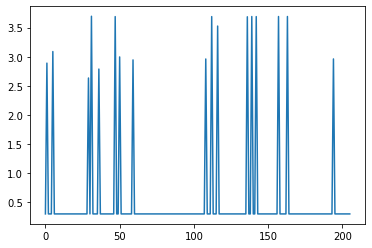

In [ ]:
plot(S_N)

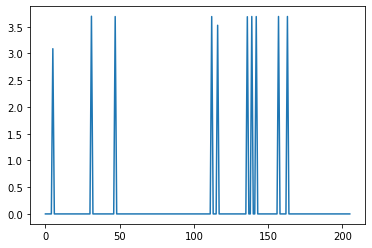

In [ ]:
plot(S_N_p)

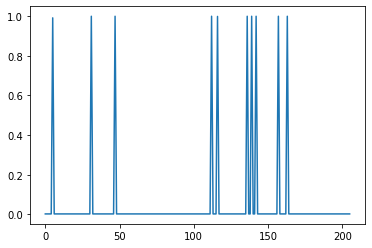

In [ ]:
m1 = 3.41
m2 = -5.86

p_hat = scaled_sigmoid(S_N_P, m1, m2)
plot(p_hat)

In [ ]:
p_hat = np.clip(S_N_P, 0.0, 4.0) / 4.0

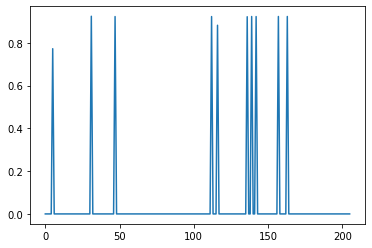

In [ ]:
plot(p_hat)

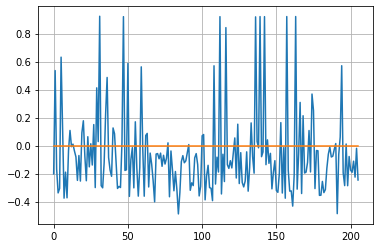

In [ ]:
#i = 3
#figure(figsize=(20, 10))
plot(s_df.iloc[i, 1:].values)
plot(gt_df.iloc[i, 1:].values)
#ylim(0.0, 0.1)
grid()

In [ ]:
def cal_p_h(a, sn_t=3.0):
    a = a.astype('float32')
    a = (a + 1.0) / 2.0
    E = np.mean(a, axis=-1, keepdims=True)
    E_2 = np.mean(np.square(a), axis=-1, keepdims=True)
    S = np.sqrt(E_2 - np.square(E))

    S_N = np.abs(a - E) / (S + epsilon)
    S_N_p = tf.where(tf.math.greater(S_N, sn_t), S_N, 0.0)
    S_N_p = S_N_p.numpy()
    
    return S_N_p

In [ ]:
!RMDIR /S /Q results_sn
!MKDIR results_sn

지정된 파일을 찾을 수 없습니다.


In [ ]:
for i in tqdm(range(len(gt_df))):
    if i % 20 != 0:
        continue
    fig = figure(figsize=(20, 10))
    plot(gt_df.iloc[i, 1:].values)
    plot(cal_p_h(s_df.iloc[i, 1:].values))
    grid()
    savefig(f'./results_sn/sample{i}.jpg')
    close(fig)
    del fig

100%|██████████████████████████████████████████████████████████████| 21948/21948 [03:01<00:00, 121.05it/s]


In [ ]:
class MoAsProbCal(tf.keras.Model):
    def __init__(self, sn_t=1.6):
        super(MoAsProbCal, self).__init__()
        #self.W_t = tf.Variable(3.0)
        self.sn_t = sn_t
        self.W_m1 = tf.Variable(1.8799586, name='m1')
        self.W_m2 = tf.Variable(-8.5435, name='m2')
        self.epsilon = 0.0 #1e-7

    def call(self, inputs):
        A = inputs
        A = (A + 1.0) / 2.0

        E = tf.reduce_mean(A, axis=-1, keepdims=True)
        E_2 = tf.reduce_mean(tf.square(A), axis=-1, keepdims=True)
        S = tf.sqrt(E_2 - tf.square(E))
        
        #S_N = tf.abs(A - E) / (S + epsilon)
        S_N = (A - E) / (S + epsilon)
        S_N = tf.where(tf.math.greater(S_N, sn_t), S_N, 0.0)
        #S_N_p = tf.where(tf.math.greater(S_N, sn_t), 1.0, 0.0)
        A_p = self.W_m1 * S_N + self.W_m2
        
        
        #A_p = tf.clip_by_value(tf.abs(A - E) / (S + self.epsilon)
        #               , clip_value_min=self.sn_t
        #               , clip_value_max=10000000.0) - self.sn_t
        #A_p = self.W_m1 * A_p + self.W_m2
        #A_p = A_p # + self.W_m2
        #P_h = tf.clip_by_value(A_p, clip_value_min=0.0, clip_value_max=4.0) / 4.0
        P_h = tf.sigmoid(A_p)
        #P_h = tf.clip_by_value(A_p / self.sn_t, clip_value_min=0.0, clip_value_max=1.0)
        return P_h

In [ ]:
class MoAsProbCal(tf.keras.Model):
    def __init__(self, sn_t=3.0):
        super(MoAsProbCal, self).__init__()
        #self.W_t = tf.Variable(3.0)
        self.sn_t = sn_t
        self.W_m1 = tf.Variable(1.8799586, name='m1')
        self.W_m2 = tf.Variable(-8.5435, name='m2')
        self.epsilon = 0.0 #1e-7

    def call(self, inputs):
        A = inputs
        A = (A + 1.0) / 2.0

        E = tf.reduce_mean(A, axis=-1, keepdims=True)
        E_2 = tf.reduce_mean(tf.square(A), axis=-1, keepdims=True)
        S = tf.sqrt(E_2 - tf.square(E))
        
        #S_N = tf.abs(A - E) / (S + epsilon)
        S_N = (A - E) / (S + epsilon)
        #S_N_p = tf.where(tf.math.greater(S_N, sn_t), S_N, 0.0)
        #S_N_p = tf.where(tf.math.greater(S_N, sn_t), 1.0, 0.0)
        A_p = self.W_m1 * S_N + self.W_m2
        
        
        #A_p = tf.clip_by_value(tf.abs(A - E) / (S + self.epsilon)
        #               , clip_value_min=self.sn_t
        #               , clip_value_max=10000000.0) - self.sn_t
        #A_p = self.W_m1 * A_p + self.W_m2
        #A_p = A_p # + self.W_m2
        #P_h = tf.clip_by_value(A_p, clip_value_min=0.0, clip_value_max=4.0) / 4.0
        P_h = tf.sigmoid(A_p)
        #P_h = tf.clip_by_value(A_p / self.sn_t, clip_value_min=0.0, clip_value_max=1.0)
        return P_h

In [ ]:
opt = optimizers.Adam(lr=model.hps['lr']
                                      , beta_1=model.hps['beta_1']
                                      , beta_2=model.hps['beta_2']
                                      , decay=model.hps['decay'])

In [ ]:
tf.math.log(1e-15)

<tf.Tensor: shape=(), dtype=float32, numpy=-34.538776>

In [ ]:
epsilon = 1e-7
def MoA_metric(y_true, y_pred):
    y_pred = tf.maximum(tf.minimum(y_pred, 1.0 - 1e-15), 1e-15)
    #y_true = tf.cast(y_true, dtype=tf.float32)

    log_loss = -1.0 * (y_true * tf.math.log(y_pred + epsilon) + (1.0 - y_true) * tf.math.log(1.0 - y_pred + epsilon))
    log_loss_mean = tf.reduce_mean(log_loss, axis=0) #?
    loss = tf.reduce_mean(log_loss_mean, axis=0)
    return loss #log_loss_mean #loss

MoA_metric.__name__ = 'MoA_metric'

In [ ]:
disim = s_df.iloc[:, 1:].values
disim = disim.astype('float32')

In [ ]:
gt = gt_df.iloc[:, 1:].values
gt = gt.astype('float32')

In [ ]:
p_dataset = tf.data.Dataset.from_tensor_slices((disim, gt)).shuffle(1000).batch(32)

In [ ]:
input1 = Input(shape=(206), dtype='float32')
pcal = MoAsProbCal(sn_t=1.6)
output = pcal(input1)
model_2 = Model(inputs=input1, outputs=output)

reduce_lr = ReduceLROnPlateau(monitor='loss'
                              , factor=model.hps['reduce_lr_factor']
                              , patience=10
                              , min_lr=1.e-8
                              , verbose=1)

model_2.compile(optimizer=opt, loss=MoA_metric)

In [ ]:
log_loss_mean = MoA_metric(gt, model_2(disim))
log_loss_mean

<tf.Tensor: shape=(), dtype=float32, numpy=0.013552193>

In [ ]:
loss = MoA_metric(gt, model_2(disim))
loss

<tf.Tensor: shape=(), dtype=float32, numpy=0.010852308>

In [ ]:
loss = MoA_metric(gt, model_2(disim) / 10.0)
loss

<tf.Tensor: shape=(), dtype=float32, numpy=0.024734057>

In [ ]:
loss = MoA_metric(gt, model_2(disim) + 0.0011438734)
loss

<tf.Tensor: shape=(), dtype=float32, numpy=0.015673261>

In [ ]:
loss = MoA_metric(gt, 0.011438734)
loss

<tf.Tensor: shape=(), dtype=float32, numpy=0.02811381>

In [ ]:
loss = MoA_metric(gt, gt / 2.0 - 0.0000011438734)
loss

<tf.Tensor: shape=(), dtype=float32, numpy=0.0025823007>

In [ ]:
loss = MoA_metric(gt, 0.0)
loss

<tf.Tensor: shape=(), dtype=float32, numpy=0.060047813>

In [ ]:
gt.shape

(21948, 206)

In [ ]:
loss = MoA_metric(np.zeros((21948, 206)), 0.0011438734)
loss

<tf.Tensor: shape=(), dtype=float32, numpy=0.0011444091>

In [ ]:
loss = MoA_metric(np.ones((21948, 206)), 0.11438734)
loss

<tf.Tensor: shape=(), dtype=float32, numpy=2.1679885>

In [ ]:
tf.executing_eagerly()

True

In [ ]:
model_2.fit(p_dataset, epochs=128, callbacks=[reduce_lr])

Epoch 1/128
686/686 [==============================] - 1s 2ms/step - loss: 0.0136
Epoch 2/128
686/686 [==============================] - 1s 2ms/step - loss: 0.0135
Epoch 3/128
686/686 [==============================] - 1s 2ms/step - loss: 0.0135
Epoch 4/128
686/686 [==============================] - 1s 2ms/step - loss: 0.0135
Epoch 5/128
686/686 [==============================] - 1s 2ms/step - loss: 0.0135
Epoch 6/128
686/686 [==============================] - 1s 2ms/step - loss: 0.0135
Epoch 7/128
686/686 [==============================] - 2s 2ms/step - loss: 0.0135
Epoch 8/128
686/686 [==============================] - 1s 2ms/step - loss: 0.0135
Epoch 9/128
686/686 [==============================] - 1s 2ms/step - loss: 0.0135
Epoch 10/128
686/686 [==============================] - 1s 2ms/step - loss: 0.0135
Epoch 11/128
658/686 [===========================>..] - ETA: 0s - loss: 0.0136
Epoch 00011: ReduceLROnPlateau reducing learning rate to 0.0007936144183622674.
686/686 [===========

KeyboardInterrupt: 

In [ ]:
 pcal.W_m1, pcal.W_m2 

(<tf.Variable 'm1:0' shape=() dtype=float32, numpy=1.4374621>,
 <tf.Variable 'm2:0' shape=() dtype=float32, numpy=-6.719041>)

In [ ]:
p_h = cal_p_h(disim, sn_t=3.0)

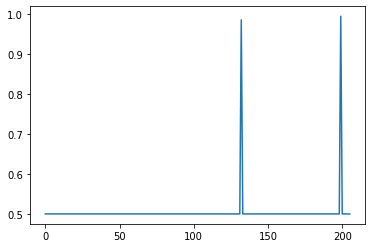

In [ ]:
plot(tf.sigmoid(p_h[3]).numpy())

In [ ]:
p_h_2 = model_2(disim).numpy()

In [ ]:
p_h_2[3]

array([0.00114387, 0.00114387, 0.00114387, 0.00114387, 0.00114387,
       0.00114387, 0.00114387, 0.00114387, 0.00114387, 0.00114387,
       0.00114387, 0.00114387, 0.00114387, 0.00114387, 0.00114387,
       0.00114387, 0.00114387, 0.00114387, 0.00114387, 0.00114387,
       0.00114387, 0.00114387, 0.00114387, 0.00114387, 0.00114387,
       0.00114387, 0.00114387, 0.00114387, 0.00114387, 0.00114387,
       0.00114387, 0.00114387, 0.00114387, 0.00114387, 0.00114387,
       0.00114387, 0.00114387, 0.00114387, 0.00114387, 0.00114387,
       0.00114387, 0.00114387, 0.00114387, 0.00114387, 0.00114387,
       0.00114387, 0.00114387, 0.00114387, 0.00114387, 0.00114387,
       0.00114387, 0.00114387, 0.00114387, 0.00114387, 0.00114387,
       0.00114387, 0.00114387, 0.00114387, 0.00114387, 0.00114387,
       0.00114387, 0.00114387, 0.00114387, 0.00114387, 0.00114387,
       0.00114387, 0.00114387, 0.00114387, 0.00114387, 0.00114387,
       0.00114387, 0.00114387, 0.00114387, 0.00114387, 0.00114

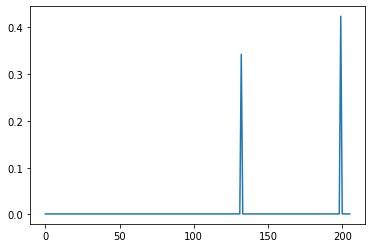

In [ ]:
plot(p_h_2[3])

In [ ]:
MoA_metric(gt, p_h_2)

<tf.Tensor: shape=(), dtype=float32, numpy=0.013434333>

In [ ]:
MoA_metric(gt, p_h_2 - 0.00114387)

<tf.Tensor: shape=(), dtype=float32, numpy=0.022281084>

In [ ]:
def cal_prob_2(logit, sn_t=3.0):
    y_pred = logit
    E = tf.reduce_mean(tf.math.exp(y_pred), axis=-1, keepdims=True)
    E_2 = tf.reduce_mean(tf.square(tf.math.exp(y_pred)), axis=-1, keepdims=True)
    S = tf.sqrt(E_2 - tf.square(E))

    e_A = (tf.exp(y_pred) - E) / (S + epsilon)
    e_A_p = tf.where(tf.math.greater(e_A, sn_t), sn_t, 0.0)
    p_h = e_A_p / (tf.reduce_sum(e_A_p, axis=-1, keepdims=True) + epsilon)
    return e_A.numpy(), p_h.numpy()

In [ ]:
loss = MoA_metric(gt, cal_prob_2(disim, sn_t=2.45)[1])
loss

<tf.Tensor: shape=(), dtype=float32, numpy=0.012189025>

In [ ]:
sn, p_h = cal_prob_2(disim, sn_t=1.6)

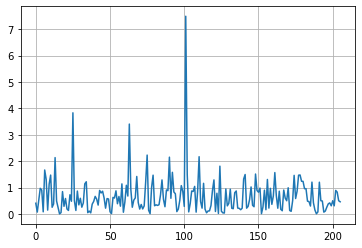

In [ ]:
plot(np.abs(sn[0]))
grid()

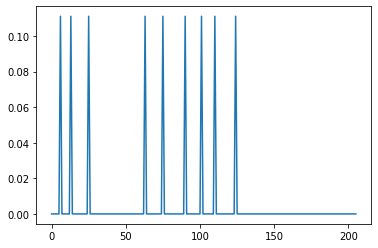

In [ ]:
plot(p_h[0])

In [ ]:
!RMDIR /S /Q results_e_sn
!MKDIR results_e_sn

In [ ]:
gc.collect()

3069537

In [ ]:
for i in tqdm(range(len(gt_df))):
    if i % 20 != 0:
        continue
    fig = figure(figsize=(20, 10))
    plot(gt_df.iloc[i, 1:].values)
    sn, p_h = cal_prob_2(s_df.iloc[i, 1:].values.astype('float32'), sn_t=1.6)
    plot(abs(sn))
    grid()
    savefig(f'./results_e_sn/sample{i}.jpg')
    close(fig)
    del fig

100%|██████████████████████████████████████████████████████████████| 21948/21948 [03:11<00:00, 114.42it/s]


In [ ]:
# Create the test dataset.
input_df = pd.read_csv(os.path.join(raw_data_path, 'test_features.csv'))
input_df.cp_type = input_df.cp_type.astype('category')
input_df.cp_type = input_df.cp_type.cat.rename_categories(range(len(input_df.cp_type.cat.categories)))
input_df.cp_time = input_df.cp_time.astype('category')
input_df.cp_time = input_df.cp_time.cat.rename_categories(range(len(input_df.cp_time.cat.categories)))
input_df.cp_dose = input_df.cp_dose.astype('category')
input_df.cp_dose = input_df.cp_dose.cat.rename_categories(range(len(input_df.cp_dose.cat.categories)))

# Remove samples of ctl_vehicle.
valid_indexes = input_df.cp_type == 1 #?
target_scored_df = pd.read_csv(os.path.join(raw_data_path, 'train_targets_scored.csv'))
MoA_annots = target_scored_df.columns[1:]

def make_input_features(inputs):
    id_ = inputs['sig_id']

    # Treatment.
    cp_time = inputs['cp_time']
    cp_dose = inputs['cp_dose']

    treatment_type = cp_time * 2 + cp_dose

    # Gene expression.
    gene_exps = [inputs['g-' + str(v)] for v in range(model.nn_arch['d_gene_exp'])]
    gene_exps = tf.stack(gene_exps, axis=0)

    # Cell viability.
    cell_vs = [inputs['c-' + str(v)] for v in range(model.nn_arch['d_cell_type'])]
    cell_vs = tf.stack(cell_vs, axis=0)

    return (id_, tf.expand_dims(treatment_type, axis=-1), gene_exps, cell_vs)

test_dataset = tf.data.Dataset.from_tensor_slices(input_df.to_dict('list'))
test_dataset = test_dataset.map(make_input_features)
test_iter = test_dataset.as_numpy_iterator()

In [ ]:
res = input_df[input_df.cp_type == 1]
len(res), len(input_df)

(3624, 3982)

In [ ]:
def cal_prob(logit):
    a = logit
    a = (a + 1.0) / 2.0
    a = tf.where(tf.math.greater(a, model.hps['sn_t']), a, 0.0)
    a = model.hps['m1'] * a + model.hps['m2']
    p_h = tf.sigmoid(a).numpy()
    return p_h

In [ ]:
results = []
for id_, t, g, c in tqdm(test_iter):
    id_ = id_.decode('utf8') #?
    t = np.expand_dims(t, axis=0)
    g = np.expand_dims(g, axis=0)
    c = np.expand_dims(c, axis=0)

    _, _, result = model.model.predict([t, g, c])
    result = np.squeeze(result, axis=0)
    result = cal_prob(result)
    results.append(result)

3982it [03:48, 17.41it/s]


In [ ]:
results = np.asarray(results)
results.shape

(3981, 206)

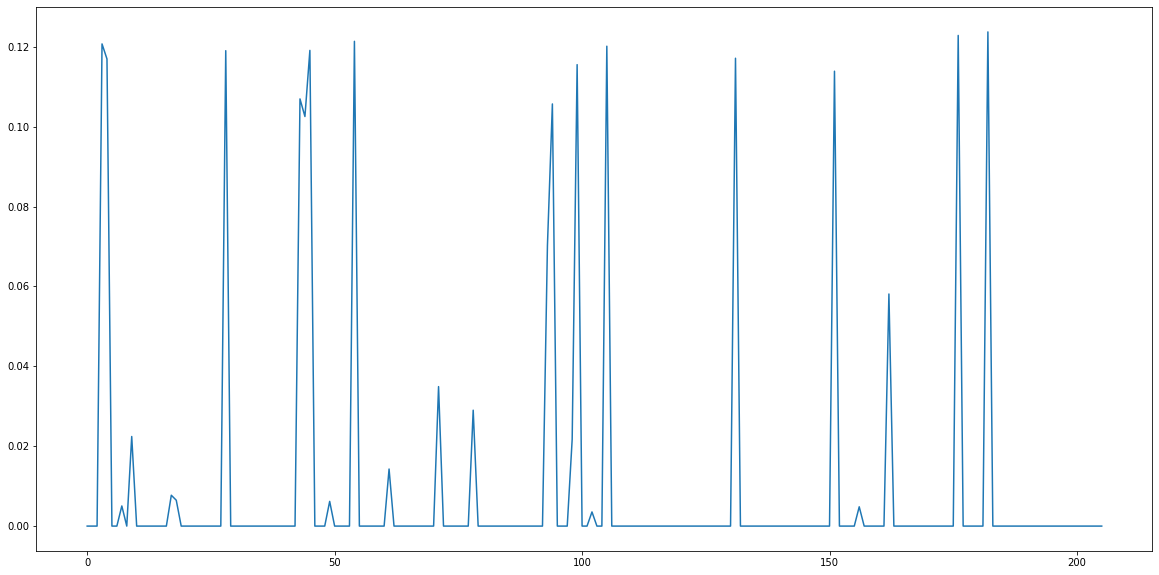

In [ ]:
fig = figure(figsize=(20, 10))
plot(results[0])

In [ ]:
!RMDIR /S /Q test_results
!MKDIR test_results

In [ ]:
gc.collect()

3582545

In [ ]:
for i in tqdm(range(len(results))):
    if i % 3 != 0:
        continue
    fig = figure(figsize=(20, 10))
    plot(results[i])
    grid()
    savefig(f'./test_results/sample{i}.jpg')
    close(fig)
    del fig

100%|█████████████████████████████████████████████████████████████████| 3982/3982 [03:09<00:00, 20.98it/s]


In [ ]:
test_iter = test_dataset.as_numpy_iterator()
results = []
for id_, t, g, c in tqdm(test_iter):
    id_ = id_.decode('utf8') #?
    t = np.expand_dims(t, axis=0)
    g = np.expand_dims(g, axis=0)
    c = np.expand_dims(c, axis=0)

    _, _, result = model.model.predict([t, g, c])
    result = np.squeeze(result, axis=0)
    result = (result + 1.0) / 2.0
    results.append(result)

results = np.asarray(results)

3982it [03:54, 17.01it/s]


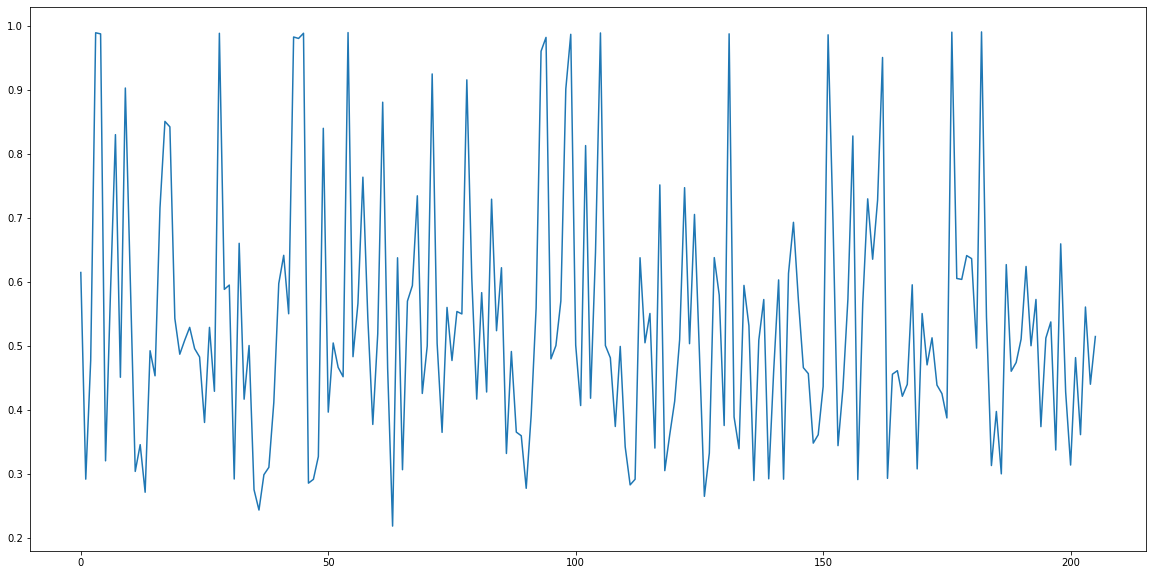

In [ ]:
fig = figure(figsize=(20, 10))
plot(results[0])

In [ ]:
!RMDIR /S /Q test_results
!MKDIR test_results

In [ ]:
gc.collect()

3489057

In [ ]:
for i in tqdm(range(len(results))):
    if i % 3 != 0:
        continue
    fig = figure(figsize=(20, 10))
    plot(results[i])
    grid()
    savefig(f'./test_results/sample{i}.jpg')
    close(fig)
    del fig

100%|█████████████████████████████████████████████████████████████████| 3982/3982 [03:31<00:00, 18.84it/s]


In [ ]:
!RMDIR /S /Q test_results_sn
!MKDIR test_results_sn

지정된 파일을 찾을 수 없습니다.


In [ ]:
gc.collect()

3004483

In [ ]:
for i in tqdm(range(len(results))):
    if i % 3 != 0:
        continue
    fig = figure(figsize=(20, 10))
    plot(cal_p_h(results[i]))
    grid()
    savefig(f'./test_results_sn/sample{i}.jpg')
    close(fig)
    del fig

100%|█████████████████████████████████████████████████████████████████| 3982/3982 [03:38<00:00, 18.24it/s]


In [ ]:
def MoA_metric(y_true, y_pred):
    s_n = 3.0
    E = tf.reduce_mean(tf.math.exp(y_pred), axis=1, keepdims=True)
    E_2 = tf.reduce_mean(tf.square(tf.math.exp(y_pred)), axis=1, keepdims=True)
    S = tf.sqrt(E_2 - tf.square(E))

    e_A = tf.clip_by_value(tf.math.abs(tf.exp(y_pred) - E) / (S + epsilon)
                           , clip_value_min=s_n
                           , clip_value_max=10000000.0) - s_n
    p_hat = e_A / (tf.reduce_sum(e_A, axis=1, keepdims=True) + epsilon)

    y_pred = tf.maximum(tf.minimum(p_hat, 1.0 - 1e-15), 1e-15)
    y_true = tf.cast(y_true, dtype=tf.float32)

    log_loss = -1.0 * (y_true * tf.math.log(y_pred + epsilon) + (1.0 - y_true) * tf.math.log(1.0 - y_pred + epsilon))
    log_loss_mean = tf.reduce_mean(log_loss, axis=0) #?
    loss = tf.reduce_mean(log_loss_mean, axis=0)
    return loss

In [ ]:
loss = MoA_metric(gt[:], disim[:])
loss

<tf.Tensor: shape=(), dtype=float32, numpy=0.01825861>

In [ ]:
model_2.fit(p_dataset, epochs=32)

In [ ]:
pcal.W_m2 

In [ ]:
pcal = MoAsProbCal(sn_t=3.0)

In [ ]:
import pdb

In [ ]:
tf.executing_eagerly()

In [ ]:
def train_step(d, g):
    with tf.GradientTape() as tape:
        p_h = pcal(d, training=True)
        loss = MoA_metric(g, p_h)

    grads = tape.gradient(loss, pcal.trainable_variables)
    opt.apply_gradients(zip(grads, pcal.trainable_variables))
    print(f'loss{loss.numpy()}')    

In [ ]:
for e in range(12):
    print(f'Epoch {e}')
    for (batch, (d, g)) in enumerate(p_dataset):
        train_step(d, g)

In [ ]:
pcal.W_m1, pcal.W_m2 

In [ ]:
i = 4
figure(figsize=(20, 10))
plot(gt_df.iloc[i, 1:].values)
plot(s_df.iloc[i, 1:].values)
ylim(0.0, 0.1)
grid()

In [ ]:
i = 20
figure(figsize=(20, 10))
plot(gt_df.iloc[i, 1:].values)
plot(s_df.iloc[i, 1:].values)
ylim(0.0, 0.1)
grid()

In [ ]:
s_df.iloc[i, 1:].values.std()

In [ ]:
# Train.
model = MoAPredictor(conf)

ts = time.time()
model.train()
te = time.time()

print('Elasped time: {0:f}s'.format(te - ts))

In [ ]:
# Evaluate.
model = MoAPredictor(conf)

ts = time.time()
model.evaluate()
te = time.time()

print('Elasped time: {0:f}s'.format(te - ts))

In [ ]:
gt_df = pd.read_csv('gt.csv')
s_df = pd.read_csv('submission.csv')

In [ ]:
%pylab inline

In [ ]:
i = 1000
figure(figsize=(20, 10))
plot(gt_df.iloc[i, 1:].values)
plot(s_df.iloc[i, 1:].values)
grid()

In [ ]:
i = 3
figure(figsize=(20, 10))
plot(gt_df.iloc[:, i].values)
plot(s_df.iloc[:, i].values)
grid()

In [ ]:
gt_df = pd.read_csv('d:\\PycharmProjects\\MoA\\bodhi\\gt.csv')
s_df = pd.read_csv('d:\\PycharmProjects\\MoA\\bodhi\\submission.csv')

In [ ]:
len(gt_df)

In [ ]:
i = 16
figure(figsize=(20, 10))
plot(gt_df.iloc[i, 1:].values)
plot(s_df.iloc[i, 1:].values)
grid()

In [ ]:
gt_df = pd.read_csv('d:\\PycharmProjects\\MoA\\bodhi\\gt.csv')
s_df = pd.read_csv('d:\\PycharmProjects\\MoA\\bodhi\\submission.csv')

In [ ]:
i = 31
figure(figsize=(20, 10))
plot(gt_df.iloc[i, 1:].values)
plot(s_df.iloc[i, 1:].values)
ylim(0.0, 0.1)
grid()

%%writefile MoA_pred_conf.json
{
	"mode": "test",
	"raw_data_path": "../input/lish-moa",
	"model_loading": true,
	"multi_gpu": false,
	"num_gpus": 4,
	"cv_type": "train_val_split",
	"val_ratio": 0.1,

	"hps": {
		"lr": 0.001,
		"beta_1": 0.999,
		"beta_2": 0.999,
		"decay": 0.0,
		"epochs": 1,
		"batch_size": 16,
		"reduce_lr_factor": 0.99,
		"ls": 0.2,
		"loss_weights": [1.0, 10.0, 100.0]
	},

	"nn_arch": {
		"k_fold": 5,
		"treatment_onehot_d": 7,
        "num_gene_exp": 772,
        "num_cell_type": 100,
        "dense_1_1_d": 512,
		"dense_1_2_d": 256,
		"dense_1_3_d": 128,
		"dense_1_4_d": 64,
		"dense_2_1_d": 64,
		"dense_2_2_d": 32,
		"dense_2_3_d": 16,
		"num_sc_ae": 0,
		"dense_3_1_d": 87,
		"dense_3_2_d": 96,
		"dense_3_3_d": 72,
		"dense_3_4_d": 64,
		"d_hidden": 87,
		"dense_4_1_d": 128,
		"dense_4_2_d": 256,
		"dense_4_3_d": 128,
        "num_moa_annotation": 206,
		"d_embed": 1,
		"num_head": 1,
		"num_transformer": 0,
		"d_out" : 772,
		"dropout_rate": 0.5,
		"similarity_type": "diff_abs"
	}
}

with open("MoA_pred_conf.json", 'r') as f:
    conf = json.load(f)

model = MoAPredictor(conf)

ts = time.time()
model.test()
te = time.time()

print('Elasped time: {0:f}s'.format(te - ts))

### Graph neural nerwork based models

In [ ]:
raw_data_path = '../resource/lish-moa'

In [ ]:
import sys
sys.path.append('d:\\PycharmProjects\\MoA\\analysis\\keras_unsupervised')

In [ ]:
%pylab inline

In [ ]:
import os
import time
import json
import copy

import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import StratifiedKFold

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Conv1D, Dense, Concatenate, Dropout
from tensorflow.keras.layers import LSTM, Bidirectional, BatchNormalization, LayerNormalization
from tensorflow.python.keras.layers import Embedding, Layer
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import TensorBoard, ReduceLROnPlateau, LearningRateScheduler, ModelCheckpoint

from ku.composite_layer import Transformer\
    , SIMILARITY_TYPE_DIFF_ABS\
    , SIMILARITY_TYPE_PLAIN\
    , SIMILARITY_TYPE_SCALED\
    , SIMILARITY_TYPE_GENERAL\
    , SIMILARITY_TYPE_ADDITIVE

from ku.composite_layer import DenseBatchNormalization
from ku.backprop import make_decoder_from_encoder\
    , make_autoencoder_from_encoder\
    , make_autoencoder_with_sym_sc
from ku.gnn_layer import GraphConvolutionNetwork

# os.environ["CUDA_DEVICE_ORDER"] = 'PCI_BUS_ID'
# os.environ["CUDA_VISIBLE_DEVICES"] = '-1'

# Constants.
DEBUG = True

MODE_TRAIN = 0
MODE_VAL = 1

MODEL_TYPE_GAE = 'gae'
MODEL_TYPE_EXTRACTOR = 'extractor'

CV_TYPE_TRAIN_VAL_SPLIT = 'train_val_split'
CV_TYPE_K_FOLD = 'k_fold'

epsilon = 1e-7

A = np.array([[0.0, 1.0, 1.0], [1.0, 0.0, 1.0], [1.0, 1.0, 0.0]])


def MoA_loss(y_true, y_pred):
    loss = tf.reduce_mean(y_pred)
    return loss


def MoA_metric(y_true, y_pred):
    y_pred = tf.maximum(tf.minimum(y_pred, 1.0 - 1e-15), 1e-15)
    y_true = tf.cast(y_true, dtype=tf.float32)

    log_loss = -1.0 * (y_true * tf.math.log(y_pred + epsilon) + (1.0 - y_true) * tf.math.log(1.0 - y_pred + epsilon))
    log_loss_mean = tf.reduce_mean(log_loss, axis=0) #?
    loss = tf.reduce_mean(log_loss_mean, axis=0)
    return loss

MoA_metric.__name__ = 'MoA_metric'

In [ ]:
class CMAPFeatureGAE(Layer):
    def __init__(self, conf, **kwargs):
        super(CMAPFeatureGAE, self).__init__(**kwargs)

        # Initialize.
        self.conf = conf
        self.hps = self.conf['hps']
        self.nn_arch = self.conf['nn_arch']
        gcn_d_outs = self.nn_arch['gcn_d_outs']
        gcn_d_outs_r = copy.copy(gcn_d_outs)
        gcn_d_outs_r.reverse()

        # Design layers.
        # First layers.
        self.embed_treatment_type_0 = Embedding(self.nn_arch['num_treatment_type']
                                           , self.nn_arch['d_input_feature'])
        self.dense_treatment_type_0 = Dense(self.nn_arch['d_input_feature']
                                       , activation='relu')
        #self.batch_normalization_0_1 = BatchNormalization()
        self.dense_gene_exp_0 = Dense(self.nn_arch['d_input_feature']
                                 , activation='relu')
        #self.batch_normalization_0_2 = BatchNormalization()
        self.dense_cell_type_0 = Dense(self.nn_arch['d_input_feature']
                                  , activation='relu')
        #self.batch_normalization_0_3 = BatchNormalization()

        self.layer_normalization_0_1 = LayerNormalization()
        self.layer_normalization_0_2 = LayerNormalization()
        self.layer_normalization_0_3 = LayerNormalization()

        self.concat_0 = Concatenate(axis=1)

        # GCN encoder.
        input_feature_1 = Input(shape=(self.nn_arch['n_node'], self.nn_arch['d_input_feature'])
                                 , dtype='float32', name='input_feature_1')
        input_A_1 = Input(shape=(self.nn_arch['n_node'], self.nn_arch['n_node'])
                        , dtype='float32', name='input_A_1')

        x_1 = input_feature_1
        A_1 = input_A_1
        for i, d_out in enumerate(gcn_d_outs):
            x_1, A_1 = GraphConvolutionNetwork(self.nn_arch['n_node']
                                               , d_out
                                               , output_adjacency=True
                                               , activation=keras.activations.relu)([x_1, A_1])

        output_1 = [x_1, A_1]

        self.gcn_encoder_1 = Model(inputs=[input_feature_1, input_A_1], outputs=output_1)

        # GCN decoder.
        input_feature_2 = Input(shape=(self.nn_arch['n_node'], gcn_d_outs_r[0])
                                 , dtype='float32', name='input_feature_2')
        input_A_2 = Input(shape=(self.nn_arch['n_node'], self.nn_arch['n_node'])
                        , dtype='float32', name='input_A_2')

        gcn_d_outs_r = gcn_d_outs_r[1:] + [self.nn_arch['d_input_feature']]

        x_2 = input_feature_2
        A_2 = input_A_2
        for i, d_out in enumerate(gcn_d_outs_r):
            x_2, A_2 = GraphConvolutionNetwork(self.nn_arch['n_node']
                                               , d_out
                                               , output_adjacency=True
                                               , activation='swish')([x_2, A_2])

        output_2 = [x_2, A_2]

        self.gcn_decoder_1 = Model(inputs=[input_feature_2, input_A_2], outputs=output_2)

    def call(self, inputs):
        t = inputs[0]
        g = inputs[1]
        c = inputs[2]
        A_ = inputs[3]

        # First layer.
        # X.
        t = self.embed_treatment_type_0(t)
        t = tf.reshape(t, (-1, self.nn_arch['d_input_feature']))
        t = self.dense_treatment_type_0(t)
        #t = self.batch_normalization_0_1(t)

        g = self.dense_gene_exp_0(g)
        #g = self.batch_normalization_0_2(g)

        c = self.dense_cell_type_0(c)
        #c = self.batch_normalization_0_3(c)

        t = self.layer_normalization_0_1(t)
        g = self.layer_normalization_0_2(g)
        c = self.layer_normalization_0_3(c)

        t = tf.expand_dims(t, axis=1)
        g = tf.expand_dims(g, axis=1)
        c = tf.expand_dims(c, axis=1)

        X = self.concat_0([t, g, c])

        # GCN encoding layer.
        Z, _ = self.gcn_encoder_1([X, A_])

        # GCN decoding layer for graph structure.
        #A_h = tf.sigmoid(K.batch_dot(Z, tf.transpose(Z, perm=[0, 2, 1])))
        A_h = K.batch_dot(Z, tf.transpose(Z, perm=[0, 2, 1])) #+ 1e-15

        # GCN decoding layer for node feature.
        X_h, _ = self.gcn_decoder_1([Z, A_])

        outputs = [X, X_h, A_h]
        return outputs

    def get_config(self):
        """Get configuration."""
        config = {'conf': self.conf}
        base_config = super(CMAPFeatureGAE, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


class CMAPFeatureExtractor(Layer):
    def __init__(self, conf, A, **kwargs):
        super(CMAPFeatureExtractor, self).__init__(**kwargs)

        # Initialize.
        self.conf = conf
        self.hps = self.conf['hps']
        self.nn_arch = self.conf['nn_arch']

        self.A = A

        # Design layers.
        # CMAPFeatureGAE.
        self.gae_0 = CMAPFeatureGAE(self.conf, self.A)

    def call(self, inputs):
        X_1 = inputs[0]
        X_2 = inputs[1]

        # Get pair latent features.
        Z_1 = self.gae_0.gcn_encoder_1(X_1)
        Z_2 = self.gae_0.gcn_encoder_1(X_2)

        Z_loss = tf.sqrt(tf.square(Z_1 - Z_2)) # Valid distance metric?

        # Get pair A_hs and X_hs. Normalization?
        X_h_1, A_h_1 = self.gae_0(X_1)
        X_h_2, A_h_2 = self.gae_0(X_1)

        X_1_loss = tf.sqrt(tf.square(X_1 - X_h_1))
        X_2_loss = tf.sqrt(tf.square(X_2 - X_h_2))
        X_loss = (X_1_loss + X_2_loss) / 2.0

        A_1_loss = tf.sqrt(tf.square(tf.cast(self.A, dtype=tf.float32) - A_h_1))
        A_2_loss = tf.sqrt(tf.square(tf.cast(self.A, dtype=tf.float32) - A_h_2))
        A_loss = (A_1_loss + A_2_loss) / 2.0

        outputs = [Z_loss, X_loss, A_loss]

        return outputs

    def get_config(self):
        """Get configuration."""
        config = {'conf': self.conf
                  , 'A': self.A}
        base_config = super(CMAPFeatureExtractor, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [ ]:
class MoAPredictorGNN(object):
    """MoA predictor based on graph neural network."""

    # Constants.
    MODEL_PATH = 'MoA_predictor'
    MODEL_GAE_PATH = 'GAE'
    OUTPUT_FILE_NAME = 'submission.csv'
    EVALUATION_FILE_NAME = 'eval.csv'

    def __init__(self, conf):
        """
        Parameters
        ----------
        conf: Dictionary
            Configuration dictionary.
        """
        # Initialize.
        self.conf = conf
        self.raw_data_path = self.conf['raw_data_path']
        self.hps = self.conf['hps']
        self.nn_arch = self.conf['nn_arch']
        self.model_loading = self.conf['model_loading']

        # with tpu_strategy.scope():
        if self.conf['model_type'] == MODEL_TYPE_EXTRACTOR:
            if self.conf['cv_type'] == CV_TYPE_TRAIN_VAL_SPLIT:
                if self.model_loading:
                    self.model = load_model(self.MODEL_PATH + '.h5'
                                                , custom_objects={'MoA_loss': MoA_loss
                                                , 'MoA_metric': MoA_metric
                                                , 'CMAPFeatureExtractor': CMAPFeatureExtractor}
                                            , compile=False)
                    opt = optimizers.Adam(lr=self.hps['lr']
                                          , beta_1=self.hps['beta_1']
                                          , beta_2=self.hps['beta_2']
                                          , decay=self.hps['decay'])
                    self.model.compile(optimizer=opt
                                  , loss=MoA_loss
                                  , loss_weights=self.hps['loss_weights']
                                  , run_eagerly=False)
                else:
                    # Design the MoA prediction model.
                    # Input.
                    input_t_1 = Input(shape=(self.nn_arch['d_treatment_type'],), dtype='float32', name='input_t_1')
                    input_g_1 = Input(shape=(self.nn_arch['d_gene_exp'],), dtype='float32', name='input_g_1')
                    input_c_1 = Input(shape=(self.nn_arch['d_cell_type'],), dtype='float32', name='input_c_1')

                    input_t_2 = Input(shape=(self.nn_arch['d_treatment_type'],), dtype='float32', name='input_t_2')
                    input_g_2 = Input(shape=(self.nn_arch['d_gene_exp'],), dtype='float32', name='input_g_2')
                    input_c_2 = Input(shape=(self.nn_arch['d_cell_type'],), dtype='float32', name='input_c_2')

                    # First layers.
                    embed_treatment_type_0 = Embedding(self.nn_arch['d_treatment_type']
                                                            , self.nn_arch['d_input_feature'])
                    dense_treatment_type_0 = Dense(self.nn_arch['d_input_feature']
                                                        , activation='swish')
                    dense_gene_exp_0 = Dense(self.nn_arch['d_input_feature']
                                                  , activation='swish')
                    dense_cell_type_0 = Dense(self.nn_arch['d_input_feature']
                                                   , activation='swish')

                    layer_normalization_0_1 = LayerNormalization()
                    layer_normalization_0_2 = LayerNormalization()
                    layer_normalization_0_3 = LayerNormalization()

                    concat_0 = Concatenate(axis=1)

                    # X_1.
                    t_1 = embed_treatment_type_0(input_t_1)
                    t_1 = dense_treatment_type_0(t_1)

                    g_1 = dense_gene_exp_0(input_g_1)
                    c_1 = dense_cell_type_0(input_c_1)

                    t_1 = layer_normalization_0_1(t_1)
                    g_1 = layer_normalization_0_2(g_1)
                    c_1 = layer_normalization_0_3(c_1)

                    X_1 = concat_0([t_1, g_1, c_1])

                    # X_2.
                    t_2 = embed_treatment_type_0(input_t_2)
                    t_2 = dense_treatment_type_0(t_2)

                    g_2 = dense_gene_exp_0(input_g_2)
                    c_2 = dense_cell_type_0(input_c_2)

                    t_2 = layer_normalization_0_1(t_2)
                    g_2 = layer_normalization_0_2(g_2)
                    c_2 = layer_normalization_0_3(c_2)

                    X_2 = concat_0([t_2, g_2, c_2])

                    # Feature extractor.
                    outputs = CMAPFeatureExtractor(self.conf, A, name='extractor')([X_1, X_2])

                    opt = optimizers.Adam(lr=self.hps['lr']
                                          , beta_1=self.hps['beta_1']
                                          , beta_2=self.hps['beta_2']
                                          , decay=self.hps['decay'])

                    self.model = Model(inputs=[[input_t_1, input_g_1, input_c_1]
                                        , [input_t_2, input_g_2, input_c_2]]
                                       , outputs=outputs)
                    self.model.compile(optimizer=opt
                                  , loss=MoA_loss
                                  , loss_weights=self.hps['loss_weights']
                                  , run_eagerly=False)
                    self.model.summary()
            elif self.conf['cv_type'] == CV_TYPE_K_FOLD:
                self.k_fold_models = []

                if self.model_loading:
                    opt = optimizers.Adam(lr=self.hps['lr']
                                          , beta_1=self.hps['beta_1']
                                          , beta_2=self.hps['beta_2']
                                          , decay=self.hps['decay'])

                    # load models for K-fold.
                    for i in range(self.nn_arch['k_fold']):
                        self.k_fold_models.append(load_model(self.MODEL_PATH + '_' + str(i) + '.h5'
                                                , custom_objects={'MoA_loss': MoA_loss
                                                , 'MoA_metric': MoA_metric
                                                , 'CMAPFeatureExtractor': CMAPFeatureExtractor}
                                            , compile=False))
                        self.k_fold_models[i].compile(optimizer=opt
                                           , loss=MoA_loss
                                           , loss_weights=self.hps['loss_weights']
                                           , run_eagerly=False)
                else:
                    # Create models for K-fold.
                    for i in range(self.nn_arch['k_fold']):
                        # Design the MoA prediction model.
                        # Input.
                        input_t_1 = Input(shape=(self.nn_arch['d_treatment_type'],), dtype='float32', name='input_t_1')
                        input_g_1 = Input(shape=(self.nn_arch['d_gene_exp'],), dtype='float32', name='input_g_1')
                        input_c_1 = Input(shape=(self.nn_arch['d_cell_type'],), dtype='float32', name='input_c_1')

                        input_t_2 = Input(shape=(self.nn_arch['d_treatment_type'],), dtype='float32', name='input_t_2')
                        input_g_2 = Input(shape=(self.nn_arch['d_gene_exp'],), dtype='float32', name='input_g_2')
                        input_c_2 = Input(shape=(self.nn_arch['d_cell_type'],), dtype='float32', name='input_c_2')

                        # First layers.
                        embed_treatment_type_0 = Embedding(self.nn_arch['d_treatment_type']
                                                           , self.nn_arch['d_input_feature'])
                        dense_treatment_type_0 = Dense(self.nn_arch['d_input_feature']
                                                       , activation='swish')
                        dense_gene_exp_0 = Dense(self.nn_arch['d_input_feature']
                                                 , activation='swish')
                        dense_cell_type_0 = Dense(self.nn_arch['d_input_feature']
                                                  , activation='swish')

                        layer_normalization_0_1 = LayerNormalization()
                        layer_normalization_0_2 = LayerNormalization()
                        layer_normalization_0_3 = LayerNormalization()

                        concat_0 = Concatenate(axis=1)

                        # X_1.
                        t_1 = embed_treatment_type_0(input_t_1)
                        t_1 = dense_treatment_type_0(t_1)

                        g_1 = dense_gene_exp_0(input_g_1)
                        c_1 = dense_cell_type_0(input_c_1)

                        t_1 = layer_normalization_0_1(t_1)
                        g_1 = layer_normalization_0_2(g_1)
                        c_1 = layer_normalization_0_3(c_1)

                        X_1 = concat_0([t_1, g_1, c_1])

                        # X_2.
                        t_2 = embed_treatment_type_0(input_t_2)
                        t_2 = dense_treatment_type_0(t_2)

                        g_2 = dense_gene_exp_0(input_g_2)
                        c_2 = dense_cell_type_0(input_c_2)

                        t_2 = layer_normalization_0_1(t_2)
                        g_2 = layer_normalization_0_2(g_2)
                        c_2 = layer_normalization_0_3(c_2)

                        X_2 = concat_0([t_2, g_2, c_2])

                        # Feature extractor.
                        outputs = CMAPFeatureExtractor(self.conf, A, name='extractor')([X_1, X_2])

                        opt = optimizers.Adam(lr=self.hps['lr']
                                              , beta_1=self.hps['beta_1']
                                              , beta_2=self.hps['beta_2']
                                              , decay=self.hps['decay'])

                        model = Model(inputs=[[input_t_1, input_g_1, input_c_1]
                                        , [input_t_2, input_g_2, input_c_2]]
                                           , outputs=outputs)
                        model.compile(optimizer=opt
                                           , loss=MoA_loss
                                           , loss_weights=self.hps['loss_weights']
                                           , run_eagerly=False)
                        model.summary()

                        self.k_fold_models.append(model)
            else:
                raise ValueError('cv_type is not valid.')
        elif self.conf['model_type'] == MODEL_TYPE_GAE:
            if self.model_loading:
                self.model = load_model(self.MODEL_GAE_PATH + '.h5'
                                            , custom_objects={'MoA_loss': MoA_loss
                                            , 'MoA_metric': MoA_metric
                                            , 'CMAPFeatureGAE': CMAPFeatureGAE
                                            , 'CMAPFeatureExtractor': CMAPFeatureExtractor}
                                        , compile=False)
                opt = optimizers.Adam(lr=self.hps['lr']
                                      , beta_1=self.hps['beta_1']
                                      , beta_2=self.hps['beta_2']
                                      , decay=self.hps['decay'])
                self.model.compile(optimizer=opt
                              , loss=MoA_loss
                              , loss_weights=self.hps['loss_weights']
                              , run_eagerly=True)
            else:
                # Design the MoA prediction model.
                # Input.
                input_t_1 = Input(shape=(self.nn_arch['d_treatment_type'],), dtype='float32', name='input_t_1')
                input_g_1 = Input(shape=(self.nn_arch['d_gene_exp'],), dtype='float32', name='input_g_1')
                input_c_1 = Input(shape=(self.nn_arch['d_cell_type'],), dtype='float32', name='input_c_1')

                input_A_1 = Input(shape=(self.nn_arch['n_node'], self.nn_arch['n_node'])
                                  , dtype='float32', name='input_A_1')


                # Feature extractor.
                gae = CMAPFeatureGAE(self.conf, name='gae')
                X, X_h, A_h = gae([input_t_1, input_g_1, input_c_1, input_A_1])

                # Metric loss.
                X_loss = tf.square(X_h - X)
                A_loss = tf.square(A_h - tf.cast(A, dtype=tf.float32))

                outputs = [X_loss] #, A_loss]

                opt = optimizers.Adam(lr=self.hps['lr']
                                      , beta_1=self.hps['beta_1']
                                      , beta_2=self.hps['beta_2']
                                      , decay=self.hps['decay'])

                self.model = Model(inputs=[input_t_1, input_g_1, input_c_1, input_A_1]
                                   , outputs=outputs)
                self.model.compile(optimizer=opt
                              , loss=MoA_loss
                              , loss_weights=self.hps['loss_weights']
                              , run_eagerly=True)
                self.model.summary()
        else:
            raise ValueError('model_type is not valid.')

        # Create dataset.
        self._create_autoencoder_dataset()

    def _create_autoencoder_dataset(self):
        input_df = pd.read_csv(os.path.join(self.raw_data_path, 'train_features.csv')) #.iloc[:1024]
        input_df.cp_type = input_df.cp_type.astype('category')
        input_df.cp_type = input_df.cp_type.cat.rename_categories(range(len(input_df.cp_type.cat.categories)))
        input_df.cp_time = input_df.cp_time.astype('category')
        input_df.cp_time = input_df.cp_time.cat.rename_categories(range(len(input_df.cp_time.cat.categories)))
        input_df.cp_dose = input_df.cp_dose.astype('category')
        input_df.cp_dose = input_df.cp_dose.cat.rename_categories(range(len(input_df.cp_dose.cat.categories)))

        # Remove samples of ctl_vehicle.
        valid_indexes = input_df.cp_type == 1
        input_df = input_df[valid_indexes]

        target_scored_df = pd.read_csv(os.path.join(self.raw_data_path, 'train_targets_scored.csv')) #.iloc[:1024]
        target_scored_df = target_scored_df[valid_indexes]
        del target_scored_df['sig_id']
        target_scored_df.columns = range(len(target_scored_df.columns))

        def make_input_features(inputs):
            # Treatment.
            cp_time = inputs['cp_time']
            cp_dose = inputs['cp_dose']

            treatment_type = cp_time * 2 + cp_dose

            # Gene expression.
            gene_exps = [inputs['g-' + str(v)] for v in range(self.nn_arch['d_gene_exp'])]
            gene_exps = tf.stack(gene_exps, axis=0)

            # Cell viability.
            cell_vs = [inputs['c-' + str(v)] for v in range(self.nn_arch['d_cell_type'])]
            cell_vs = tf.stack(cell_vs, axis=0)

            # Adjacency matrix.
            A_ = tf.cast(A, dtype='float32')

            return (tf.expand_dims(treatment_type, axis=-1), gene_exps, cell_vs, A_)

        train_val_index = np.arange(len(input_df))
        np.random.shuffle(train_val_index)
        num_val = int(self.conf['val_ratio'] * len(input_df))
        num_tr = len(input_df) - num_val
        train_index = train_val_index[:num_tr]
        val_index = train_val_index[num_tr:]
        self.train_index = train_index
        self.val_index = val_index

        # Training dataset.
        input_dataset = tf.data.Dataset.from_tensor_slices(input_df.iloc[train_index].to_dict('list'))
        input_dataset = input_dataset.map(make_input_features)

        dummy_target_dataset_1 = tf.data.Dataset.range(num_tr)
        dummy_target_dataset_2 = tf.data.Dataset.range(num_tr)

        f_target_dataset = tf.data.Dataset.zip((dummy_target_dataset_1, dummy_target_dataset_2))

        # Inputs and targets.
        tr_dataset = tf.data.Dataset.zip((input_dataset, f_target_dataset))
        tr_dataset = tr_dataset.shuffle(buffer_size=self.hps['batch_size'] * 5
                                        , reshuffle_each_iteration=True).repeat().batch(self.hps['batch_size'])
        self.step = len(input_df.iloc[train_index]) // self.hps['batch_size']

        # Validation dataset.
        input_dataset = tf.data.Dataset.from_tensor_slices(input_df.iloc[val_index].to_dict('list'))
        input_dataset = input_dataset.map(make_input_features)

        dummy_target_dataset_1 = tf.data.Dataset.range(num_val)
        dummy_target_dataset_2 = tf.data.Dataset.range(num_val)

        f_target_dataset = tf.data.Dataset.zip((dummy_target_dataset_1, dummy_target_dataset_2))

        # Inputs and targets.
        val_dataset = tf.data.Dataset.zip((input_dataset, f_target_dataset)).batch(self.hps['batch_size'])

        self.trval_dataset_autoencoder = (tr_dataset, val_dataset)

    def _create_intra_class_pair_dataset(self):
        input_df = pd.read_csv(os.path.join(self.raw_data_path, 'train_features.csv')).iloc[:1024]
        input_df.cp_type = input_df.cp_type.astype('category')
        input_df.cp_type = input_df.cp_type.cat.rename_categories(range(len(input_df.cp_type.cat.categories)))
        input_df.cp_time = input_df.cp_time.astype('category')
        input_df.cp_time = input_df.cp_time.cat.rename_categories(range(len(input_df.cp_time.cat.categories)))
        input_df.cp_dose = input_df.cp_dose.astype('category')
        input_df.cp_dose = input_df.cp_dose.cat.rename_categories(range(len(input_df.cp_dose.cat.categories)))

        # Remove samples of ctl_vehicle.
        input_df = input_df[input_df.cp_type == 1]

        def make_input_features(inputs):
            # Treatment.
            cp_time = inputs['cp_time']
            cp_dose = inputs['cp_dose']

            treatment_type = cp_time * 2 + cp_dose

            # Gene expression.
            gene_exps = [inputs['g-' + str(v)] for v in range(self.nn_arch['num_gene_exp'])]
            gene_exps = tf.stack(gene_exps, axis=0)

            # Cell viability.
            cell_vs = [inputs['c-' + str(v)] for v in range(self.nn_arch['num_cell_type'])]
            cell_vs = tf.stack(cell_vs, axis=0)

            return (treatment_type, gene_exps, cell_vs)

        if self.conf['cv_type'] == CV_TYPE_TRAIN_VAL_SPLIT:
            train_val_index = np.arange(len(input_df))
            np.random.shuffle(train_val_index)
            num_val = int(self.conf['val_ratio'] * len(input_df))
            num_tr = len(input_df) - num_val
            train_index = train_val_index[:num_tr]
            val_index = train_val_index[num_tr:]
            self.train_index = train_index
            self.val_index = val_index

            # Training dataset.
            input_dataset = tf.data.Dataset.from_tensor_slices(input_df.iloc[train_index].to_dict('list'))
            input_dataset = input_dataset.map(make_input_features)
        elif self.conf['cv_type'] == CV_TYPE_K_FOLD:
            stratified_kfold = StratifiedKFold(n_splits=self.nn_arch['k_fold'])
            # group_kfold = GroupKFold(n_splits=self.nn_arch['k_fold'])
            self.k_fold_trval_datasets = []

            for train_index, val_index in stratified_kfold.split(input_df, input_df.cp_type):
                # Training dataset.
                input_dataset = tf.data.Dataset.from_tensor_slices(input_df.iloc[train_index].to_dict('list'))
                input_dataset = input_dataset.map(make_input_features)
        else:
            raise ValueError('cv_type is not valid.')

    def train(self):
        """Train."""
        reduce_lr = ReduceLROnPlateau(monitor='val_loss'
                                      , factor=self.hps['reduce_lr_factor']
                                      , patience=3
                                      , min_lr=1.e-8
                                      , verbose=1)
        tensorboard = TensorBoard(histogram_freq=1
                                  , write_graph=True
                                  , write_images=True
                                  , update_freq='epoch')

        '''
        def schedule_lr(e_i):
            self.hps['lr'] = self.hps['reduce_lr_factor'] * self.hps['lr']
            return self.hps['lr']

        lr_scheduler = LearningRateScheduler(schedule_lr, verbose=1)
        '''

        if self.conf['model_type'] == MODEL_TYPE_EXTRACTOR:
            if self.conf['cv_type'] == CV_TYPE_TRAIN_VAL_SPLIT:
                model_check_point = ModelCheckpoint(self.MODEL_PATH + '.h5'
                                                    , monitor='val_loss'
                                                    , verbose=1
                                                    , save_best_only=True)

                self.model.fit_generator(self.trval_dataset[0]
                                                    , steps_per_epoch=self.step
                                                    , epochs=self.hps['epochs']
                                                    , verbose=1
                                                    , max_queue_size=80
                                                    , workers=4
                                                    , use_multiprocessing=False
                                                    , callbacks=[model_check_point]  # , reduce_lr, tensorboard]
                                                    , validation_data=self.trval_dataset[1]
                                                    , validation_freq=1
                                                    , shuffle=True)
            elif self.conf['cv_type'] == CV_TYPE_K_FOLD:
                for i in range(self.nn_arch['k_fold']):
                    model_check_point = ModelCheckpoint(self.MODEL_PATH + '_' + str(i) + '.h5'
                                                        , monitor='val_loss'
                                                        , verbose=1
                                                        , save_best_only=True)

                    self.k_fold_models[i].fit_generator(self.k_fold_trval_datasets[i][0]
                                                        , steps_per_epoch=self.step
                                                        , epochs=self.hps['epochs']
                                                        , verbose=1
                                                        , max_queue_size=80
                                                        , workers=4
                                                        , use_multiprocessing=False
                                                        , callbacks=[model_check_point]  # , reduce_lr, tensorboard]
                                                        , validation_data=self.k_fold_trval_datasets[i][1]
                                                        , validation_freq=1
                                                        , shuffle=True)
            else:
                raise ValueError('cv_type is not valid.')
        elif self.conf['model_type'] == MODEL_TYPE_GAE:
            model_check_point = ModelCheckpoint(self.MODEL_GAE_PATH + '.h5'
                                                , monitor='val_loss'
                                                , verbose=1
                                                , save_best_only=True)

            self.model.fit_generator(self.trval_dataset_autoencoder[0]
                                                , steps_per_epoch=self.step
                                                , epochs=self.hps['epochs']
                                                , verbose=1
                                                , max_queue_size=80
                                                , workers=4
                                                , use_multiprocessing=False
                                                , callbacks=[model_check_point, reduce_lr] #, tensorboard]
                                                , validation_data=self.trval_dataset_autoencoder[1]
                                                , validation_freq=1
                                                , shuffle=True)
        else:
            raise ValueError('model_type is not valid.')

        #print('Save the model.')
        #self.model.save(self.MODEL_PATH, save_format='h5')
        # self.model.save(self.MODEL_PATH, save_format='tf')

    def evaluate(self):
        """Evaluate."""
        assert self.conf['cv_type'] == CV_TYPE_TRAIN_VAL_SPLIT

        input_df = pd.read_csv(os.path.join(self.raw_data_path, 'train_features.csv')).iloc[:1024]
        input_df.cp_type = input_df.cp_type.astype('category')
        input_df.cp_type = input_df.cp_type.cat.rename_categories(range(len(input_df.cp_type.cat.categories)))
        input_df.cp_time = input_df.cp_time.astype('category')
        input_df.cp_time = input_df.cp_time.cat.rename_categories(range(len(input_df.cp_time.cat.categories)))
        input_df.cp_dose = input_df.cp_dose.astype('category')
        input_df.cp_dose = input_df.cp_dose.cat.rename_categories(range(len(input_df.cp_dose.cat.categories)))

        # Remove samples of ctl_vehicle.
        input_df = input_df[input_df.cp_type == 1]

        target_scored_df = pd.read_csv(os.path.join(self.raw_data_path, 'train_targets_scored.csv')).iloc[:1024]
        target_scored_df = target_scored_df.iloc[self.val_index]
        MoA_annots = target_scored_df.columns[1:]

        def make_input_features(inputs):
            # Treatment.
            cp_time = inputs['cp_time']
            cp_dose = inputs['cp_dose']

            treatment_type = cp_time * 2 + cp_dose

            # Gene expression.
            gene_exps = [inputs['g-' + str(v)] for v in range(self.nn_arch['d_gene_exp'])]
            gene_exps = tf.stack(gene_exps, axis=0)

            # Cell viability.
            cell_vs = [inputs['c-' + str(v)] for v in range(self.nn_arch['d_cell_type'])]
            cell_vs = tf.stack(cell_vs, axis=0)

            # Adjacency matrix.
            A_ = tf.cast(A, dtype='float32')

            return (tf.expand_dims(treatment_type, axis=-1), gene_exps, cell_vs, A_)

        # Validation dataset.
        val_dataset = tf.data.Dataset.from_tensor_slices(input_df.iloc[self.val_index].to_dict('list'))
        val_dataset = val_dataset.map(make_input_features)

        val_iter = val_dataset.as_numpy_iterator()

        # Predict MoAs.
        gae = self.model.get_layer('gae')
        sig_id_list = []
        MoAs = [[] for _ in range(len(MoA_annots))]

        for i, d in tqdm(enumerate(val_iter)):
            t, g, c = d
            id = target_scored_df['sig_id'].iloc[i]
            t = np.expand_dims(t, axis=0)
            g = np.expand_dims(g, axis=0)
            c = np.expand_dims(c, axis=0)
            A_ = A

            if self.conf['cv_type'] == CV_TYPE_TRAIN_VAL_SPLIT:
                # First layer.
                # X.
                t = gae.embed_treatment_type_0(t)
                t = tf.reshape(t, (-1, self.nn_arch['d_input_feature']))
                t = gae.dense_treatment_type_0(t)
                # t = self.batch_normalization_0_1(t)

                g = gae.dense_gene_exp_0(g)
                # g = self.batch_normalization_0_2(g)

                c = gae.dense_cell_type_0(c)
                # c = self.batch_normalization_0_3(c)

                t = gae.layer_normalization_0_1(t)
                g = gae.layer_normalization_0_2(g)
                c = gae.layer_normalization_0_3(c)

                t = tf.expand_dims(t, axis=1)
                g = tf.expand_dims(g, axis=1)
                c = tf.expand_dims(c, axis=1)

                X = gae.concat_0([t, g, c])

                # GCN encoding layer.
                Z, _ = gae.gcn_encoder_1([X, A_])

                for i, MoA in enumerate(result):
                    MoAs[i].append(MoA)
            elif self.conf['cv_type'] == CV_TYPE_K_FOLD:
                # Conduct ensemble prediction.
                result_list = []

                for i in range(self.nn_arch['k_fold']):
                    _, _, result = self.k_fold_models[i].predict([t, g, c])
                    result = np.squeeze(result, axis=0)
                    result_list.append(result)

                result_mean = np.asarray(result_list).mean(axis=0)

                for i, MoA in enumerate(result_mean):
                    MoAs[i].append(MoA)
            else:
                raise ValueError('cv_type is not valid.')

            sig_id_list.append(id)


        # Save the result.
        result_dict = {'sig_id': sig_id_list}
        for i, MoA_annot in enumerate(MoA_annots):
            result_dict[MoA_annot] = MoAs[i]

        submission_df = pd.DataFrame(result_dict)
        submission_df.to_csv(self.OUTPUT_FILE_NAME, index=False)

        target_scored_df.to_csv('gt.csv', index=False)

    def test(self):
        """Test."""

        # Create the test dataset.
        input_df = pd.read_csv(os.path.join(self.raw_data_path, 'test_features.csv'))
        input_df.cp_type = input_df.cp_type.astype('category')
        input_df.cp_type = input_df.cp_type.cat.rename_categories(range(len(input_df.cp_type.cat.categories)))
        input_df.cp_time = input_df.cp_time.astype('category')
        input_df.cp_time = input_df.cp_time.cat.rename_categories(range(len(input_df.cp_time.cat.categories)))
        input_df.cp_dose = input_df.cp_dose.astype('category')
        input_df.cp_dose = input_df.cp_dose.cat.rename_categories(range(len(input_df.cp_dose.cat.categories)))

        target_scored_df = pd.read_csv(os.path.join(self.raw_data_path, 'train_targets_scored.csv'))
        MoA_annots = target_scored_df.columns[1:]

        def make_input_features(inputs):
            # Treatment.
            id = inputs['sig_id']
            cp_type = inputs['cp_type']
            cp_time = inputs['cp_time']
            cp_dose = inputs['cp_dose']

            cp_type_onehot = tf.one_hot(cp_type, 2)
            cp_time_onehot = tf.one_hot(cp_time, 3)
            cp_dose_onehot = tf.one_hot(cp_dose, 2)

            treatment_onehot = tf.concat([cp_type_onehot, cp_time_onehot, cp_dose_onehot], axis=-1)

            # Gene expression.
            gene_exps = [inputs['g-' + str(v)] for v in range(self.nn_arch['num_gene_exp'])]
            gene_exps = tf.stack(gene_exps, axis=0)

            # Cell viability.
            cell_vs = [inputs['c-' + str(v)] for v in range(self.nn_arch['num_cell_type'])]
            cell_vs = tf.stack(cell_vs, axis=0)

            return (id, treatment_onehot, gene_exps, cell_vs)

        test_dataset = tf.data.Dataset.from_tensor_slices(input_df.to_dict('list'))
        test_dataset = test_dataset.map(make_input_features)
        test_iter = test_dataset.as_numpy_iterator()

        # Predict MoAs.
        sig_id_list = []
        MoAs = [[] for _ in range(len(MoA_annots))]

        for id, t, g, c in tqdm(test_iter):
            id = id.decode('utf8') #?
            t = np.expand_dims(t, axis=0)
            g = np.expand_dims(g, axis=0)
            c = np.expand_dims(c, axis=0)

            if self.conf['cv_type'] == CV_TYPE_TRAIN_VAL_SPLIT:
                _, _, result = self.model.layers[-1]([t, g, c]) #self.model.predict([t, g, c])
                result = np.squeeze(result, axis=0)

                for i, MoA in enumerate(result):
                    MoAs[i].append(MoA)
            elif self.conf['cv_type'] == CV_TYPE_K_FOLD:
                # Conduct ensemble prediction.
                result_list = []

                for i in range(self.nn_arch['k_fold']):
                    _, _, result = self.k_fold_models[i].predict([t, g, c])
                    result = np.squeeze(result, axis=0)
                    result_list.append(result)

                result_mean = np.asarray(result_list).mean(axis=0)

                for i, MoA in enumerate(result_mean):
                    MoAs[i].append(MoA)
            else:
                raise ValueError('cv_type is not valid.')

            sig_id_list.append(id)

        # Save the result.
        result_dict = {'sig_id': sig_id_list}
        for i, MoA_annot in enumerate(MoA_annots):
            result_dict[MoA_annot] = MoAs[i]

        submission_df = pd.DataFrame(result_dict)
        submission_df.to_csv(self.OUTPUT_FILE_NAME, index=False)

In [ ]:
%%writefile MoA_pred_gnn_conf.json
{
	"mode": "train",
	"raw_data_path": "D:\\PycharmProjects\\MoA\\resource\\lish-moa",
	"model_loading": false,
	"multi_gpu": false,
	"num_gpus": 4,
	"cv_type": "train_val_split",
	"val_ratio": 0.1,
	"model_type": "gae",

	"hps": {
		"lr": 0.001,
		"beta_1": 0.999,
		"beta_2": 0.999,
		"decay": 0.0,
		"epochs": 12,
		"batch_size": 16,
		"reduce_lr_factor": 0.99,
		"loss_weights": [1.0]
	},

	"nn_arch": {
		"k_fold": 5,
		"d_treatment_type": 1,
		"num_treatment_type": 6,
        "d_gene_exp": 772,
        "d_cell_type": 100,
		"n_node": 3,
		"d_input_feature": 128,
		"gcn_d_outs": [128, 64, 32, 16],
        "d_moa": 608
	}
}

In [ ]:
np.random.seed(1024)
tf.random.set_seed(1024)

# Load configuration.
with open("MoA_pred_gnn_conf.json", 'r') as f:
    conf = json.load(f)

In [ ]:
hps = conf['hps']
nn_arch = conf['nn_arch']

In [ ]:
if conf['mode'] == 'train':
    # Train.
    model = MoAPredictorGNN(conf)

    ts = time.time()
    model.train()
    te = time.time()

    print('Elasped time: {0:f}s'.format(te - ts))
elif conf['mode'] == 'evaluate':
    # Train.
    model = MoAPredictorGNN(conf)

    ts = time.time()
    model.evaluate()
    te = time.time()

    print('Elasped time: {0:f}s'.format(te - ts))
elif conf['mode'] == 'test':
    model = MoAPredictorGNN(conf)

    ts = time.time()
    model.test()
    te = time.time()

    print('Elasped time: {0:f}s'.format(te - ts))
else:
    raise ValueError('Mode is not valid.')

In [ ]:
input_df = pd.read_csv(os.path.join(raw_data_path, 'train_features.csv')) #.iloc[:1024]
input_df.cp_type = input_df.cp_type.astype('category')
input_df.cp_type = input_df.cp_type.cat.rename_categories(range(len(input_df.cp_type.cat.categories)))
input_df.cp_time = input_df.cp_time.astype('category')
input_df.cp_time = input_df.cp_time.cat.rename_categories(range(len(input_df.cp_time.cat.categories)))
input_df.cp_dose = input_df.cp_dose.astype('category')
input_df.cp_dose = input_df.cp_dose.cat.rename_categories(range(len(input_df.cp_dose.cat.categories)))

# Remove samples of ctl_vehicle.
valid_indexes = input_df.cp_type == 1
input_df = input_df[valid_indexes]

target_scored_df = pd.read_csv(os.path.join(raw_data_path, 'train_targets_scored.csv')) #.iloc[:1024]
target_scored_df = target_scored_df[valid_indexes]

target_nonscored_df = pd.read_csv(os.path.join(raw_data_path, 'train_targets_nonscored.csv')) #.iloc[:1024]
target_nonscored_df = target_nonscored_df[valid_indexes]

target_df = pd.concat([target_scored_df, target_nonscored_df.iloc[:, 1:]], axis=1)
target_df = target_df.iloc[model.val_index]
del target_df['sig_id']
target_df.columns = range(len(target_df.columns))


def make_input_features(inputs):
    # Treatment.
    cp_time = inputs['cp_time']
    cp_dose = inputs['cp_dose']

    treatment_type = cp_time * 2 + cp_dose

    # Gene expression.
    gene_exps = [inputs['g-' + str(v)] for v in range(nn_arch['d_gene_exp'])]
    gene_exps = tf.stack(gene_exps, axis=0)

    # Cell viability.
    cell_vs = [inputs['c-' + str(v)] for v in range(nn_arch['d_cell_type'])]
    cell_vs = tf.stack(cell_vs, axis=0)

    # Adjacency matrix.
    A_ = tf.cast(A, dtype='float32')

    return (tf.expand_dims(treatment_type, axis=-1), gene_exps, cell_vs, A_)

# Validation dataset.
val_dataset = tf.data.Dataset.from_tensor_slices(input_df.iloc[model.val_index].to_dict('list'))
val_dataset = val_dataset.map(make_input_features)

val_iter = val_dataset.as_numpy_iterator()

In [ ]:
target_df.columns

In [ ]:
len(model.val_index)

In [ ]:
input_df

In [ ]:
raw_data_path

In [ ]:
gae = model.model.get_layer('gae')

In [ ]:
d = val_iter.next()
t, g, c, A_ = d
id_ = target_scored_df['sig_id'].iloc[0]
t = np.expand_dims(t, axis=0)
g = np.expand_dims(g, axis=0)
c = np.expand_dims(c, axis=0)
A_= np.expand_dims(A_, axis=0)

In [ ]:
t.shape, g.shape, c.shape

In [ ]:
res = gae.embed_treatment_type_0(t)
res.shape

In [ ]:
res = tf.reshape(res, (-1, nn_arch['d_input_feature']))
res.shape

In [ ]:
res = gae.dense_treatment_type_0(res)
res.shape

In [ ]:
res = gae.dense_gene_exp_0(g)
res.shape

In [ ]:
# First layer.
# X.
t = gae.embed_treatment_type_0(t)
t = tf.reshape(t, (-1, nn_arch['d_input_feature']))
t = gae.dense_treatment_type_0(t)
# t = self.batch_normalization_0_1(t)

g = gae.dense_gene_exp_0(g)
# g = self.batch_normalization_0_2(g)

c = gae.dense_cell_type_0(c)
# c = self.batch_normalization_0_3(c)

t = gae.layer_normalization_0_1(t)
g = gae.layer_normalization_0_2(g)
c = gae.layer_normalization_0_3(c)

t = tf.expand_dims(t, axis=1)
g = tf.expand_dims(g, axis=1)
c = tf.expand_dims(c, axis=1)

In [ ]:
t.shape, g.shape, c.shape

In [ ]:
X = gae.concat_0([t, g, c])

# GCN encoding layer.
Z, _ = gae.gcn_encoder_1([X, A_])

In [ ]:
Z.shape

In [ ]:
Z

In [ ]:
res = Z.numpy().ravel()
res

In [ ]:
res.shape

In [ ]:
# Validation dataset.
val_dataset = tf.data.Dataset.from_tensor_slices(input_df.iloc[model.val_index].to_dict('list'))
val_dataset = val_dataset.map(make_input_features)

val_iter = val_dataset.as_numpy_iterator()

In [ ]:
target_df = pd.concat([target_scored_df, target_nonscored_df.iloc[:, 1:]], axis=1)

In [ ]:
del target_df['sig_id']
target_df.columns = range(len(target_df.columns))

In [ ]:
target_scored_df.columns

In [ ]:
res = target_scored_df.iloc[0]
res

In [ ]:
res2 = res[res == 1]
res2

In [ ]:
list(res2.to_frame().index)

In [ ]:
gae = model.model.get_layer('gae')
embed_feature_dicts = []

for i, d in tqdm(enumerate(val_iter)):
    t, g, c, A_ = d
    id_ = input_df['sig_id'].iloc[i]
    t = np.expand_dims(t, axis=0)
    g = np.expand_dims(g, axis=0)
    c = np.expand_dims(c, axis=0)
    A_ = np.expand_dims(A_, axis=0)

    # First layer.
    # X.
    t = gae.embed_treatment_type_0(t)
    t = tf.reshape(t, (-1, nn_arch['d_input_feature']))
    t = gae.dense_treatment_type_0(t)
    # t = self.batch_normalization_0_1(t)

    g = gae.dense_gene_exp_0(g)
    # g = self.batch_normalization_0_2(g)

    c = gae.dense_cell_type_0(c)
    # c = self.batch_normalization_0_3(c)

    t = gae.layer_normalization_0_1(t)
    g = gae.layer_normalization_0_2(g)
    c = gae.layer_normalization_0_3(c)

    t = tf.expand_dims(t, axis=1)
    g = tf.expand_dims(g, axis=1)
    c = tf.expand_dims(c, axis=1)

    X = gae.concat_0([t, g, c])

    # GCN encoding layer.
    Z, _ = gae.gcn_encoder_1([X, A_])
    
    # Get embed_feature_dict.
    embed_feature_dict = {}
    embed_feature_dict['sig_id'] = id_
    embed_feature_dict['embed_feature'] = Z.numpy().ravel()
    series = target_df.iloc[i]
    df = series[series == 1].to_frame()
    embed_feature_dict['MoA_classes'] = list(df.index)
    
    embed_feature_dicts.append(embed_feature_dict)

In [ ]:
embed_features = np.array([v['embed_feature'] for v in embed_feature_dicts])
embed_features.shape

In [ ]:
embed_features

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne_embed_features = TSNE(n_components=2).fit_transform(embed_features)

In [ ]:
tsne_embed_features

In [ ]:
classes = [v['MoA_classes'] for v in embed_feature_dicts]
for i in tqdm(range(len(classes))):
    if len(classes[i]) == 0:
        classes[i] = [0]
classes

In [ ]:
colors = [v[0] for v in classes]

In [ ]:
len(colors)

In [ ]:
figure(figsize=(20, 20))
scatter(tsne_embed_features[:, 0], tsne_embed_features[:, 1], c=colors[:])
#for i, c in enumerate(colors[:]):
#    annotate(str(c), (tsne_embed_features[i, 0], tsne_embed_features[i, 1]))
grid()

In [ ]:
idxes = []
for i, v in enumerate(colors):
    if v == 77:
        idxes.append(i)

In [ ]:
idxes

In [ ]:
figure(figsize=(10, 10))
scatter(tsne_embed_features[idxes, 0], tsne_embed_features[idxes, 1])
grid()

In [ ]:
idxes = []
for i, v in enumerate(colors):
    if v == 177:
        idxes.append(i)

figure(figsize=(10, 10))
scatter(tsne_embed_features[idxes, 0], tsne_embed_features[idxes, 1])
grid()

In [ ]:
idxes = []
for i, v in enumerate(colors):
    if v == 10:
        idxes.append(i)

figure(figsize=(10, 10))
scatter(tsne_embed_features[idxes, 0], tsne_embed_features[idxes, 1])
grid()

In [ ]:
input_df = pd.read_csv(os.path.join(raw_data_path, 'train_features.csv')) #.iloc[:1024]
input_df.cp_type = input_df.cp_type.astype('category')
input_df.cp_type = input_df.cp_type.cat.rename_categories(range(len(input_df.cp_type.cat.categories)))
input_df.cp_time = input_df.cp_time.astype('category')
input_df.cp_time = input_df.cp_time.cat.rename_categories(range(len(input_df.cp_time.cat.categories)))
input_df.cp_dose = input_df.cp_dose.astype('category')
input_df.cp_dose = input_df.cp_dose.cat.rename_categories(range(len(input_df.cp_dose.cat.categories)))

# Remove samples of ctl_vehicle.
valid_indexes = input_df.cp_type == 1
input_df = input_df[valid_indexes]

target_scored_df = pd.read_csv(os.path.join(raw_data_path, 'train_targets_scored.csv')) #.iloc[:1024]
target_scored_df = target_scored_df[valid_indexes]

target_nonscored_df = pd.read_csv(os.path.join(raw_data_path, 'train_targets_nonscored.csv')) #.iloc[:1024]
target_nonscored_df = target_nonscored_df[valid_indexes]

target_df = pd.concat([target_scored_df, target_nonscored_df.iloc[:, 1:]], axis=1)
target_df = target_scored_df
target_df = target_df.iloc[model.train_index]
del target_df['sig_id']
target_df.columns = range(len(target_df.columns))


def make_input_features(inputs):
    # Treatment.
    cp_time = inputs['cp_time']
    cp_dose = inputs['cp_dose']

    treatment_type = cp_time * 2 + cp_dose

    # Gene expression.
    gene_exps = [inputs['g-' + str(v)] for v in range(nn_arch['d_gene_exp'])]
    gene_exps = tf.stack(gene_exps, axis=0)

    # Cell viability.
    cell_vs = [inputs['c-' + str(v)] for v in range(nn_arch['d_cell_type'])]
    cell_vs = tf.stack(cell_vs, axis=0)

    # Adjacency matrix.
    A_ = tf.cast(A, dtype='float32')

    return (tf.expand_dims(treatment_type, axis=-1), gene_exps, cell_vs, A_)

# Training dataset.
tr_dataset = tf.data.Dataset.from_tensor_slices(input_df.iloc[model.train_index].to_dict('list'))
tr_dataset = tr_dataset.map(make_input_features)

tr_iter = tr_dataset.as_numpy_iterator()

In [ ]:
gae = model.model.get_layer('gae')
embed_feature_dicts = []

for i, d in tqdm(enumerate(tr_iter)):
    t, g, c, A_ = d
    id_ = input_df['sig_id'].iloc[i]
    t = np.expand_dims(t, axis=0)
    g = np.expand_dims(g, axis=0)
    c = np.expand_dims(c, axis=0)
    A_ = np.expand_dims(A_, axis=0)

    # First layer.
    # X.
    t = gae.embed_treatment_type_0(t)
    t = tf.reshape(t, (-1, nn_arch['d_input_feature']))
    t = gae.dense_treatment_type_0(t)
    # t = self.batch_normalization_0_1(t)

    g = gae.dense_gene_exp_0(g)
    # g = self.batch_normalization_0_2(g)

    c = gae.dense_cell_type_0(c)
    # c = self.batch_normalization_0_3(c)

    t = gae.layer_normalization_0_1(t)
    g = gae.layer_normalization_0_2(g)
    c = gae.layer_normalization_0_3(c)

    t = tf.expand_dims(t, axis=1)
    g = tf.expand_dims(g, axis=1)
    c = tf.expand_dims(c, axis=1)

    X = gae.concat_0([t, g, c])

    # GCN encoding layer.
    Z, _ = gae.gcn_encoder_1([X, A_])
    
    # Get embed_feature_dict.
    embed_feature_dict = {}
    embed_feature_dict['sig_id'] = id_
    embed_feature_dict['embed_feature'] = Z.numpy().ravel()
    series = target_df.iloc[i]
    df = series[series == 1].to_frame()
    embed_feature_dict['MoA_classes'] = list(df.index)
    
    embed_feature_dicts.append(embed_feature_dict)

In [ ]:
embed_features = np.array([v['embed_feature'] for v in embed_feature_dicts])
embed_features.shape

In [ ]:
tsne_embed_features = TSNE(n_components=2).fit_transform(embed_features)

In [ ]:
classes = [v['MoA_classes'] for v in embed_feature_dicts]
for i in tqdm(range(len(classes))):
    if len(classes[i]) == 0:
        classes[i] = [0]
classes

In [ ]:
for i in tqdm(range(len(classes))):
    if classes[i][0] == 136:
        print(classes[i])

In [ ]:
colors = [v[0] for v in classes]
#colors = np.array(colors, dtype='float32')

In [ ]:
colors = colors #/ colors.max()

In [ ]:
figure(figsize=(20, 20))
scatter(tsne_embed_features[:, 0], tsne_embed_features[:, 1], c=colors, cmap=cm.prism)
#for i, c in enumerate(colors):
#    annotate(str(c), (tsne_embed_features[i, 0], tsne_embed_features[i, 1]))
grid()

In [ ]:
figure(figsize=(20, 20))
color = 0

idxes = []
for i, v in enumerate(colors):
    if v == 77:
        idxes.append(i)

scatter(tsne_embed_features[idxes, 0], tsne_embed_features[idxes, 1], c=np.repeat(color, len(idxes)), cmap=cm.prism_r)

color += 10

idxes = []
for i, v in enumerate(colors):
    if v == 177:
        idxes.append(i)

scatter(tsne_embed_features[idxes, 0], tsne_embed_features[idxes, 1], c=np.repeat(color, len(idxes)), cmap=cm.prism)

color += 10

idxes = []
for i, v in enumerate(colors):
    if v == 44:
        idxes.append(i)

scatter(tsne_embed_features[idxes, 0], tsne_embed_features[idxes, 1], c=np.repeat(color, len(idxes)), cmap=cm.Spectral)

color += 100

idxes = []
for i, v in enumerate(colors):
    if v == 136:
        idxes.append(i)

scatter(tsne_embed_features[idxes, 0], tsne_embed_features[idxes, 1], c=np.repeat(color, len(idxes)), cmap=cm.rainbow)

color += 10

idxes = []
for i, v in enumerate(colors):
    if v == 71:
        idxes.append(i)

scatter(tsne_embed_features[idxes, 0], tsne_embed_features[idxes, 1], c=np.repeat(color, len(idxes)), cmap=cm.rainbow_r)

color += 10

grid()

In [ ]:
figure(figsize=(20, 20))
color = 0

idxes_1 = []
idxes_2 = []
for i in tqdm(range(len(classes))):
    if len(classes[i]) == 2 and classes[i][0] == 136:
        idxes_1.append(i)
    elif len(classes[i]) == 1 and classes[i][0] == 136:
        idxes_2.append(i)

scatter(tsne_embed_features[idxes_1, 0], tsne_embed_features[idxes_1, 1], c=np.repeat(color, len(idxes_1)), cmap=cm.rainbow)
scatter(tsne_embed_features[idxes_2, 0], tsne_embed_features[idxes_2, 1], c=np.repeat(color, len(idxes_2)), cmap=cm.rainbow_r)

In [ ]:
A

In [ ]:
A.shape

In [ ]:
A.mean()

In [ ]:
A_ = A + np.eye(3)

In [ ]:
A_

In [ ]:
A_.shape

In [ ]:
res = np.sqrt(np.square(A_ - np.zeros((3, 3))))

In [ ]:
res

In [ ]:
res.mean()

In [ ]:
A_ = np.expand_dims(A_, axis=0)

In [ ]:
D = tf.pow(K.sum(A_, axis=2), -0.5)
D

In [ ]:
D = tf.linalg.diag(D)
D

In [ ]:
D_ = D

In [ ]:
D_

In [ ]:
res = tf.multiply(D_, A_)

In [ ]:
res.shape

In [ ]:
D.shape, A_.shape

In [ ]:
res

In [ ]:
D_, A_

In [ ]:
K.batch_dot(D_, A_)

In [ ]:
K.batch_dot(K.batch_dot(D_, A_), D_)

In [ ]:
2.0 * np.pi / 300.0